In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

In [2]:
train_dir = "data/chest_xray/train"
test_dir = "data/chest_xray/test"
val_dir = "data/chest_xray/val"
print("Dataset loaded!!")


Dataset loaded!!


In [3]:
print("Train set:")
print("-"*60)
num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")

print("\nTest set:")
print('-'*60)
print(f"PNEUMONIA={len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")

print("\nValidation set")
print('-'*60)
print(f"PNEUMONIA={len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(val_dir, 'NORMAL')))}")

pneumonia = os.listdir("data/chest_xray/train/PNEUMONIA")
pneumonia_dir = "data/chest_xray/train/PNEUMONIA"

Train set:
------------------------------------------------------------
PNEUMONIA=3875
NORMAL=1341

Test set:
------------------------------------------------------------
PNEUMONIA=390
NORMAL=234

Validation set
------------------------------------------------------------
PNEUMONIA=8
NORMAL=8


## X-ray images having Pneumonia

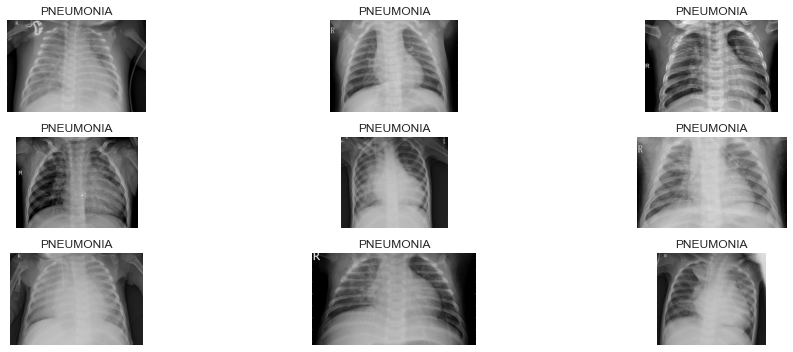

In [4]:
plt.figure(figsize=(15, 5))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.title("PNEUMONIA")
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    

plt.tight_layout()data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAxkAAAFgCAYAAADXUbTfAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/av/WaAAAACXBIWXMAAAsTAAALEwEAmpwYAAEAAElEQVR4nOy9eaxm2XnW+3zz/J2xTp2qrp4dDzcktu+9Bie6YMQsFA/o/okiRglFiCtQgEAUQQgCbEOEuJaiSChIhCAQBEwiZBERBwzh5ho5seM4sWO73d1V1VV15m+ezjfcP45+6zx71VfVbXf3dbpqPdLROecb9l577b3e8XnflVutVislJCQkJCQkJCQkJCS8Qch/uweQkJCQkJCQkJCQkPBoITkZCQkJCQkJCQkJCQlvKJKTkZCQkJCQkJCQkJDwhiI5GQkJCQkJCQkJCQkJbyiSk5GQkJCQkJCQkJCQ8IYiORkJCQkJCQkJCQkJCW8o3hJOxu3bt/Wud71LH/7wh8PPhz70If3sz/6sPvvZz+qd73yn/sf/+B+Z7/zYj/2YPvGJT0iSPvGJT+j9739/5vsf/vCH9Y/+0T8K7//Yj/3Yfef9vu/7Pn32s5+VJP2BP/AH9J73vEfD4TDzmU9+8pN6xzveof/0n/5TeO1XfuVX9P3f//36I3/kj+hDH/qQ/syf+TP63Oc+F97/xCc+oe/5nu/R0dHRA8/3N/7G39BP/dRPZd7/F//iX+gd73iHvvCFL3wz05eQkPAWRJJ7F0hyLyHh8UCSeRd4lGRe8ds9gNeKarWqn/u5nwv/Hxwc6Pu+7/v0l/7SX1KxWNQP/dAP6ed//ue1vb299vt//I//cf2tv/W3XtcYtra29J//83/WRz7ykfDaJz/5Se3u7ob/P/3pT+ujH/2oPv7xj+u9732vJOkLX/iC/spf+Sv60R/9UX3gAx+QJA0GA/3QD/2Qfuqnfkq5XO41nf9f/+t/rQ9+8IP65//8n+s973nP67qWhISE3/lIci/JvYSExwlJ5j1aMu8tkclYh6tXr+rpp5/W3t6ennnmGf2+3/f79MM//MNv6jk/9KEP6ed//ufD/6+88opGo5Gee+658NrHP/5x/ciP/Eh46CTpPe95j374h39YH//4xzPHOjw81D/7Z//sNZ37s5/9rLrdrv7aX/tr+vSnP627d+++AVeUkJDwVkKSe0nuJSQ8Tkgy760t896yTsbnP/953bx5U5PJRJL0Iz/yI3rxxRf1Mz/zM2s//6lPfeq+FNp//+///Zs65wc+8AF9+ctf1uHhoSTp537u5zKe7tnZmV566SW9733vu++73/M936Ovf/3r6na7kqRKpaIf//Ef10/8xE/oN3/zN1/13P/qX/0rffCDH9TVq1f1/ve//4HXmZCQ8Ogiyb0k9xISHickmffWlnlvGbrUZDLRhz/8YUnSYrHQ1taW/uE//IeqVquSpHq9rh//8R/Xn/pTf0q/+3f/7vu+/7AU2oNSWMvlUoVCIfxfKpX0x/7YH9N//I//UX/2z/5ZfepTn9LP/MzP6Bd+4Rcy35vP5/cdazab3Xeud7zjHfrLf/kv6wd/8Af17//9v3/gtR8dHekXf/EX9e/+3b+TJH3kIx/Rj/7oj+ov/sW/qHq9/sDvJSQkvLWR5F6SewkJjxOSzHu0ZN5bxsmIeXqA4hlJ+l2/63fpB37gB/SDP/iD+u7v/u7XfOytrS194xvfuO/1k5MTbW5uZl77yEc+or/9t/+23vOe9+i5557LvL+1taVnn31W//N//k/9oT/0h+4b5/PPP692u515/fu///v1y7/8y/p7f+/vPXB8//bf/ltJ0g/8wA9IulgQg8FAn/zkJ/Un/+SffM3XmZCQ8NZCkntJ7iUkPE5IMu/RknlvWbrUg/Dn/tyf0+7uboZP92r43u/9Xv3Kr/yKXnjhhfDaf/gP/0HNZjPDwZOkd7/73ZpMJvrH//gf60/8iT9x37H+5t/8m/r7f//vZ7oCfP7zn9dHP/pR/dW/+lfXnv8f/IN/oM985jN6+eWX73tvsVjo3/ybf6O/83f+jn7pl35Jv/RLv6T/+l//q/7CX/gL+umf/mmtVqvXfJ0JCQmPJpLcS0hIeJyQZN5bA2+ZTMZrRS6X08c+9jF96EMfyrz+qU99Sr/6q7+aee3atWv6yZ/8ST377LP6u3/37+qv//W/rvl8rtlsphs3buif/tN/qnz+fj/swx/+sP7lv/yX+r2/9/fe994HPvABfexjH9M/+Sf/RPfu3dNqtdL+/r4+9rGP6f3vf//aMW9vb+ujH/2o/vyf//P3vfdf/st/0XK51Ac/+MHM63/6T/9p/fRP/7Q+85nP6Pf//t//atOSkJDwCCPJvYSEhMcJSea9NZBbvVXdo4SEhISEhISEhISE35F45OhSCQkJCQkJCQkJCQnfXiQnIyEhISEhISEhISHhDUVyMhISEhISEhISEhIS3lAkJyMhISEhISEhISEh4Q3FQ7tLXblyReVyWcViUaVSSaVSSeVyWaVSKbyWz+eVy+Xua6+1XC7v+3+5XGo+n6ter6ter+vZZ5/VvXv3dH5+rsViod3dXT3zzDNaLpc6Pj5Wt9vVfD4P58jn8yqVSqpUKiqXy2FslUpFjUZDuVxO5+fnms/noXMAm6WsVistFgvN53Mtl0sVi0UVi0Xl83kVi0W1Wi0VCgWNRiP1+30tl0tVKpX7Plcul1WtVlUul9XpdDSfz8N5V6tV2ICFv+lY8M3MUalU0u7urtrttvL5fLiW0Wik4XCo6XQa/p/P55pOpzo6OtJ4PNZ8PtdkMtFgMNB4PFYul1OhUAjjZ8OZXC6nYrGo1WoV5mbd+JbLZXiP+VwsFjo/P9dsNgs/i8XiNT1wCQlvRfzhP/yHVavVVCwWVa1WValUJEmFQiEjH4rFokajUVh7kjJdS1iL/M7n82o0GqpUKkFG8MP6K5fL2tvb087OTlijfJ+1iWxbrVZBVjMuZNFqtbqvgwqvrdukqlAoaLFYaDabhc2qOB7j8OMuFosgBxhXLpcLP3yf8S0WC02nU83nc3U6HR0cHEhSGDfvcxxkz3w+DzqjUCiEueKczEG1WlWpVMpcB99jbpfLpSaTiV5++eUgT6WLTba4j8vlUvfu3XsjH6eEhN+xuH79usrlcrCjXLezlvP5vNrtttrtdpBdyDOXe9g4rOEnn3xS165dU6VSCbbIYrFQrVZTpVLReDxWv9/XfD5Xs9nUM888o2azqUqlomazqWq1qs3NzWDvrVYrTSYTTadTnZ+fa7lcBhvw/Pxc0uVGe/P5XEdHR5pOp6pUKkGG53I51ev1IEum06ny+bxOT0/DHEgX+3fUarUgT6bTabCFhsOhRqNRGEMul9NgMFC5XA7yvVQqBR0yHA7V6/XU6/XCHNVqNW1vb2tvby/YVNvb2+r1evrGN76hXq+ncrms7e1tTSaTYAsyZsYV6wXk3Wq1CuPjc4xtOp1qOBxqsViEe1ypVNRqtdRsNvXxj3/8W36eHupk8MCgPN1AlS6ckPe+9706OjrSl770JS0WC5VKpfDg+G6IfKdYLIYLLhQKajQaun79uq5evaq3v/3t4eGZTqf6rd/6Lf3ar/1aUNhMFgqDyZAudmhsNBpqNBoZw96VEEqO11FmknR6ehpuymw2U71eDw8UPzhJ0sWulNwoV1jA5ypW4pyHv90hqVar2t3dVb1eVy6X03K51HA4VL/f12QyCYqS39PpNChq5obXWfQYQO6suUHDoojH6GD+OAfPx4MMlISERwkENwg0YFgXCoUgT5BRvMeac6EuKfNePp8PCpf17o7EcrlUs9nUzs5OkFnFYlHn5+chsMEaRvZyHndEWPe8hixDCbmDgGwuFi/Uw3K5DOMkMIHjwfrHaUCJxbJiuVxqNpuFsdbrdW1sbITxttttjcfj8H1e55yFQkHD4VDj8ThzXfP5PCPXkc+xPCsUCiqXy+G4OGTz+Vz37t0L9yefz4cde3Go4mBQQsKjjGKxeJ+jENsJ5XI5GMzYRy4P+a4fY7lc6uDgQKvVSjdu3AiyjGCxByDq9bpWq5UODg5UKpW0sbGhvb09Xb16VavVKjgiGPusUcbhzsBoNFK329XZ2VkIGvgY8/l8kKfIRew3370b+TYYDNTv9zUej1Uul7VYLNTr9TQcDpXL5VStVlWtVlUoFNRsNlWv18P1jcdjzWazYLex2d75+bk6nY7u3LmjJ554Qs8995zm87kODg60tbWld77znZpOpzo9PVW32w3BEg/44FR5gIdgk9vjyL3VahWcN+aDucGezuVyGo/Hr+95etib/vB4RIoL29nZUbfb1fb2tlqtVrgh/l0mEsXqWRA8u3e96116+umn9eKLL+rk5ETvfe97tVqtVCwW9Uf/6B/V//P//D/q9/thMlEw3HwmdjKZ6OzsLGQbiGIx5vhBrFQq4YHodrvqdDrBeI8N53w+r3K5HDIck8kkPGAoXL/hjN+jePGc+nd8PHyPCBpZndFodF92RlJ4YM/PzzWZTDQajTIORrz44984YtJldgWjxJ0Nd4YwInggExIeZZyenqrRaITsrZQNJPAbueSZCnfEXY7m83m1Wi1tbGxkovSOUqmkra0tlcvlEF3qdrsaDoeZ46Hs4yBKDBQ5jgpKN5ZfAIMCJwvHgXMwBxzbXyPCRkDGMwgEiZrNZnAAarWapEslyVwz30QVkeW8RzaZ8/N9l2Xck1qtFoIyq9VKx8fHQd57lscdndTlPeFxggcRWBesF2wAIvPYKthaUta5cGcf+Xh8fKz5fK5nnnlG7XY742jACsEBWSwWGgwG+o7v+A7t7++HYEalUgnjYswe0FitViFogUNQKpXC9SyXy5CJ4Jyz2SwEtCuVSvhuv99XsVhUrVZTvV7XYDDQYDAIBjrjcYekXC5rZ2cnYwMiC5GRBFBqtZrG47GGw6Fms5lu376tfD6vZ555RoPBQKenp1osFhoOhzo6OtJsNlOj0VC5XA7sG7eH48C23wPstlKppNVqFbJDzWYzzCPBGvTDm+pkcONjxUGaWpL+l//lfwmTUK1WgyLhISuXy2FiSWFXq1Xt7e2p3W7rueeeU71e161bt/TLv/zLWiwWajabesc73qEnn3xSW1tb+j2/5/fos5/9bIjQc2xPx/treKVMqhvahUIh0J1wckib+UPq0UdPx0+n00BjwhHAA449ZIdnPZhHHC9PNU4mE+XzeXW7Xd28eVPD4TAoZRwMj3Zyfh4IMhjuVHgWI3ae1jlTrpxR2vwfO5qcKyHhUcZ0OtXh4aGefvrpTNQOQ96zEDFVUrp05FHGrH1PpUOLdLlGut2j7J1OJ7P2oLEi39atczCfz0M2uVAoqF6vByOda2Ddu5EP3UC6zFJjNMTZTK4bqhfOBu8hS0ejUbi2UqmkVquVyUKjS87Pz4MuQQa6InVjA7iTwVx5cGqxWOjs7EyDwSDzPe4hjgpKOSHhcUGxWAwGeGwPxLLB6dYe7JAunQwMWukiaEI24M6dOyoWi9rZ2VGtVgvnYq2Swb1+/bparZZOT08Drd2ZIwRMON9isQhGOzIEBwOZOhgMwtidBuoUyeFwqG63q9lsFlgmm5ub4bztdlvNZjOTScE2Rq7NZjMVi8VAa/fsDU7J+fm5arWams2mTk9PNRgM9Morr2h3dzfj8E0mk+BcVatVnZ+fq9fraT6fh0Cvz587Xly3y0kC2shUtzU5L9Sz1/U8PexNBu9GJEoI4f+5z31O165d0zPPPKPDw0NVq9Ug4Ofzucrlsq5evapisaiNjQ2Vy+VgTH/nd35nEPI3btzQ/v6+7ty5o6985St65plntLOzo9PTU00mkzAhfPdBUXnPGgCiaNR3OH1gMplIUlBy3Bjn+Dodwr1gDP/xeJypx2CxcaP9bx4CV4D+MxgMdHx8rNPT0wwNi2twqhPXhHHiKX/pMhUYRxZiPrU7R3yO8TmfEbgBhYeekPAoYz6fh7VJRA0usnRpnCL33PlANni2gUiWH4NaM+kyml+v14PMlKTRaCTpMiNK9hMl6rxbX6NSlv7DMeOoGp9zOepBBa91cznizgOGhf+Uy+UQyWM8RA85T7PZVK1WC3QCFFwciHEnBgWO8cLryHCv6XOawGQyUa/Xu+/eOTyql5DwuOC9731voAQNBgN1Oh1NJpMMbdLllstA7AUCMMgCDwpjTwwGA929ezfU125vb2tra0vT6VTNZjPUAxSLRQ0Gg/AdaFfYbsgxAi2c1+me/jnkHRnMzc1N1Wq18B3qNrDxsL1yuZxGo1GgQZEFANRm4ORALe31eup0OpKUYfKgDzgGGYXT01Odnp7q61//um7cuBECLFDIBoNBoGbxHnats1KwPWP5hfzc2NgITsZ0OlW/3w9ZXmfnvN5621elS8UpZC6mVCrplVdeUavV0vHxcbjJnqLHS2w2m9rf39fdu3dDMUytVtN8PtcXv/hFNRoN/cE/+AfDw93pdPTiiy/q2rVr+vKXvxyUCMoRZcI5YqPXx7wucg8PjrTTarUKDxkPYpz65/objUYorMbAZwH6oiOtVygUwnhRcs5d5geqE8XbfBZFu+5mE6GTFIyTWPlL69OWDqduxe97dCHmO/uDnZDwKIN1cHZ2pna7HeSGr5V1dCNJGQPZs4oefOBzRLow+nEgcDo8U1mv11WtVjO0IZQEY3YDG7mG4U2E0aNenrmIqZKSMnLOszYeKEGmEWTiB2NjNBqF78xms+AgcfzY6Ic2EUdUuUZJgUft43O94XUn0+k0OBjuePG/Z1EelhVKSHgUUa/XQ60sgdTT01OdnZ1pMpmo0WioVqtlmCmsa2e8IHM8UyApGN8Y43fu3MlQxlnvZBSwbaSLjPJLL72kw8PDIHtqtVoIQnv2lYg/6xdakzfpwc4aj8fa2NjQzs6OZrOZBoOBtra2VCqVQs1EqVTS3t6ems1mOD7ORC6XC812vG5tPB5rNBpptVoFJ4jABRmSRqMRXi8Wi9rd3VW5XNbJyYlefPFFSQpsFbIM1Wo1ZMGxuT3Y7EEmfjPHy+VStVpNrVYrZGHcbvR7R5bo9eChTgbAO/XB4nV5hyne94gYqaFCoaAbN27oiSeeUD6f12Aw0G/8xm/o7OxM3W5Xd+/e1Y0bN3TlyhWdn5/rq1/9qu7evRsUkNMAvJg7zjLECmhdFobx8TCPRqPgKJyfn4d0l1OOmPRqtarpdBrST9JFBA5enKfaF4tFZkFhBJCKjDuxeNbCFySLwYvmoV5AtfCuK14UFCtJjwJKWYXt2RXeW+d4OJISTngc4EK71+tpY2ND1Wo1k/EjixA7G05t8kg8AQ8/h2cPkH3esYRx1Gq1UHgpXTSi8NoH5BzRfs+ouBzneC5HMQz8nN7swYMbTrPybAeOzHQ6VbVaVavVChFQ6uegJLRarUx21lP0/jrzw7lifeCdVZhPqFXuuMDVjhHTvpijJN8SHiecnp4GAxNZcOPGDV29elWDwSBkF1h/lUpFo9EoExSIs45StlYDGjYy6vT0NNQ4EGjJ5XKBFkRg+9atWzo7OwvyDRsUIx75hC00GAxCtJ/MBGsfg321WqnVakm6kBnevRQ5XK/XQ9dPXpcunB7qFty+JDuArczx3OFC1o3H40CXQtbSFINSBM8CQfPf3NzMdCWUFArQgdvI6IXlcqmtra3QCZFxYK8THJKygexvFa+pu5Qb29JFqy0m26NzwCeDyBnctq985SuZdlso5Tt37uipp57S1atXQwvZjY0N5XI5tVot1et1feELX8goOx5yj6xLyhTpkJpzLq9zBlF80+lUg8FAi8UiU4viiozjzmazUKSIs0GEzI/theGegnIF7d6lRxI9s8BDiZLkgYNekM/nQybEsxUxvephzoZHMJ3+5N+Jsx2xU5eQ8KiiWq3qQx/6kG7duqV2u62Tk5P76Idx4MDXVKx0WTcu0J1uhFz0IA6KnEwwXanG43FoaUhmEeXt3f48U8v54ohjnBWGGuo0CJcxyCqPhnm2GL6xpGAMtNvtoDjhArvDxrG9iBswfmS5j8MdI5TlZDLJyFgis7HzwrF53ecmIeFxglOjMORpmrC3t6dGoxHsI9bbzZs3g/2B/PHsbRzcYO07jYpMADZWq9UKx5/NZup2u6EwG/oQ9bQckwAC8hMb07ssIStoJkSAhqAIGY91dSluk9HKvNPp3NcAg+J17zQVU8a8W99yudTm5qYKhYK63W6YS2ij2JLol3q9HjIqZBugjyGjmbs44AXFFofLg0voD7f1PJP0reChToZ7q0xevV7X1tZWKEBBccTRLW6ee1jj8TjsfYE3yA0/OjqSJO3s7Ojg4EC5XE7vfOc7tbm5KUk6OjoKSjm+ofzm5+rVq8FTm81mGg6H4ca7kiUiCO3Aq+hRqihgvFv25ECpEnHzwktPNRUKhZA2w+GKCxr5DBHLmHbg2RTpsh2jpxY5pjsBsXPox/HsyLruUJ6R4Zw+hnhMCQmPMiaTiW7cuKFPf/rT+j/+j/9De3t7unv3bmaNebGwpIxhzjrjs3yP7yAHPDNAkwei8ygRgh10e6K+gI53OB8oINZ3TMuSLjs2oVhieeo1JrVa7b5aNe8YhbKmw91kMglKFKcMxcixyP7Aj3YZ6JQtxoPMcvh7BIlwxkajUcg84/jQxcUpAusMCe5hknEJjxOI+CMP+v1+oCSNx+PA8qCOlYJop407VXNdEBLZRDCEfb+goZfL5XDsWq2WaXNLwwza/ENNggLvNHfkAvVggOAJAQdkHCwW6bKmAVlKbRkBETItZGfpPggNCTlcq9XCGAl8SJedA3d2dkKL3kKhoMFgoJOTE52enmo8Huvs7CzjrEkKFDUPDLFPB4iD1JJC5gm5jNz39ufYqVzvm5rJcBQKBW1tbYViEfdkUZI+aJSR1yN4H2KP0qEcJAXliSLk5ty8eTPToQS4c0Faa39/X/V6PTx4pLM86yFdpvXw7vb29sKDykPHuchU4JVKl+l4vFoWFdeHcUEaEMei1+tpNBpliqdYGF507in+2APGyePh8laRfs/cA0Zo8FBxfo/mkXZcrVahyFS6P2rJa7GnnJDwqCKXu9i0ablc6tatW6FPulOIkFmsKxpnoCTdaXdHQ7rMfiAz3Xh2xY3yYsO4s7OzYNTzu1qthv7sKEuniXIclPuDspRcF0Ehfw/5jpw9OjoKwSScEhTWcDgM0Us28Iq7VXk7So/EAeSPK1wMAOYM2YvxUi6XM9FNFLFHBT0jgnxz2esZloSERx2eCfQgBJQjZEC9Xg+BhFarpclkotPT03AMz14A1pR0GbiEUs+6ZGO4k5OTYPRvb2+Hvcu2t7eDLEOGwiJpt9tBNhK44LMUZlO3ANWp0Wio3W6HrAPjpJOV24h0aIppV/P5XK1WK8gl6FfITjINdLQjy8H75XI5NE7K5/Pa3t4Oztzt27d1enqq8/PzwM7xTbLz+YuNA3GYPAjvLb8ZT7wJId1fuT4vHTg4ONCtW7de1/P0UCejWq1qPp+rUqlod3c3bNoRKwD3WiVlIvUIci9gjosKmXBAVgDPmZoNj2IxmXi67nXxENHP2LMEflPJGLjyZRyMmxvEBn3Qn0jh8VkW03g8DkpTujQmqtWq2u22tra2wgJibMwJHVI4nz8cLJZisRgeNKeceZ9mjscDxYLiOLSKdAfR7x+AWgDi9/levV5/2GOUkPCWB8GF//V//V81HA5169atTK94iiBZpzgYXrvmAQNkjmct4/XldQjSpcJiTZ+fn+vk5ETD4TAEGKbTqbrdrhaLhTY3N7W9vR0UCJE2r69D5rmsjilenB/KFdlYHBQyKfwQBe12u0E+NBqNIBcXi0WIUpLq904unjV1Khpji+ldfBYdQAadc2HsYDB5hpZ54PrJHnFOqBMJCY8L3DBnrRFk8MAy7VmpD9vb29NwOMwESTwQSfDAA5PUQPC3pGD4wvSYzWaB6dJsNsMa3dnZyTgVy+UyE3CN7U9f89hRyG4PQkuX+65Be0Lu0ZhnuVxmOv8RUOY6a7VaoGAVCgV1Oh199atfDTUlHHdnZ0dPPvmk3vGOd+iJJ54Izg66pVKpBAeLFrPMFTrj+Pg47I3miAP4wOlU0kUr3lwuF+Tn1772Nb3wwgu6e/euJpPJm9vC9vz8XBsbG9rf3w/dVPxmeXQNz5fewkywP2ixY0LHkWazqc3NzcCJ8xZf1WpVnU5Hu7u74cZJ0t7enq5cuRIyBKPRKKP84NORBqJzE9flbXFRRFyX0w38xtGZwCcdqpNnAzxqCKj5IIq3s7OjUqkUet4T2fOicc7tNAquh/HSGq3RaAT+nhstHunj4afjitM3AIuEtKBnojzi58+AOyIJCY8iUDi/+qu/qj/4B/+gPve5zwW5gVJ2nu1sNgsZRzpEsba8p7srYHf042ytp+2REScnJ2ED0clkok6nk+kuRd1Co9EIwQvkOIEe+M2MWcpuXucOBmsepwCFSwaFTiqSwnjJiFIz0mw2Q9Bna2sr0xWG2hJ3vKT1rWQ9C+31L4wVWep0rpgG5XOPU+KZDDLKqUV3wuOEZrMZCqY9GxFnOFlfBCNrtZp2dnaCQxAzR3ytuexb16ZaUgim8rlyuay9vT1tb29rd3dXOzs7KhQKwfYbjUY6Pj4Oxjgygr+J+hP8gZlC8Jl9L9iAjyY9ZGbr9XqwIVutVtgkFTq8dwzl3JPJRDdv3tTnP/953blzJ1MTNp/P1ev1dHh4qJs3b+rKlSva3d3VM888o729vSCXNzc3wxycnZ1pOByG4D8yuFarZRr+cN3IYJelk8lE0+k0HB+q62g00r179/Tiiy+GOZXu3/Ptm8VDnYwrV65of38/Ezlj4M6RWy6X6vV6Oj09Vb/fzximzr3zHbhJkTUaDV29elVXr14NButqtQrKZzgc6ubNm2GHRaKF1FzQO5k0uCsUFDptH3Eo+FyxWAxpNjeccXD4DsejyIc0vNMcMNq9Kp8b5DSjw8NDtdvt4FzFXr1nI1iA/O/0p0KhEB42DIV6vR6KmVzhAsaH8+GGAOcgA+Utcfv9fjiGCwop63AkJDyqQH6hdK5fv6579+5l1gMGsssO59ESeMBReBh3GTnLcVCMBEA6nY663W7ozkfEyQ10DH/WMmlxgg5+fk+jAzcwYgqRd8jDEPe+9YyDzneSQnc9WmGORiNdvXo1yMF2u63xeBwcJykrb8j2etYXuiqf9Zo3p5kyLp9frhFnwp0Md1QSXSrhcUIul9OVK1c0Go00HA4z8mxdQATDmaAKQUy3K/x7UMh5z9ebdGGzEAxFLlI7u729rRs3boRdsqFAdTodHR8fazAYhK5OlUolFId79hZ7ieJqanLpgkfBeafT0dnZWeiCBdWz1WppY2ND9Xo9BFVqtVqQici24XCow8ND/cZv/IZOTk6CbevzjE03Ho91+/Zt3bp1S1/60pe0ubmp5557Tm9729v0xBNPhOYZe3t76vV6YZ8QOknRDMTtb0kZ+457Qua53W4HCulwOAw2PI4Ltu+bmsm4fv164KChlNhcCQ/w7OxMJycnYUM6n0RPuzs8fb+5uRm2NCfqdu3aNe3s7Oj8/Fxf//rXQ9eU0WgU6AJsTe+KgPPzwOKx8VBRs0Fqnu9KCseXFAp/ePglhetm4l1xVSqVDEVJ0n37YeAVL5dL9fv9QCGgxqVSqYSFc+/ePR0fH2eihyhDFrcrPqeO0ZOZMXrxqDt43rWG8XIsN4qazWYo5pTWOxnOAUxIeBSxWq30sz/7szo/P9cv/uIvBvqP1yqhYJBRyCSCAr5OPZUfR/xcGSIrqVWTpLOzM927dy/IXWQcBj2ywTdUcmfBZbRTRjGwXV579pLP+zm4fr9OpzzhhDgFCvnc7XYlXcie3d1d5XK5QM09Pj4OxgLXFsuvQqGgyWQSHBLGj2L1TBPXHWei+Y7rkphWlYIoCY8TPve5z4UGP9euXQv2kDMbpEv5RNCEYmFvaesBFWQftofbMN7wgQA2QVA2y/PgNt89Pj7Wyy+/rMPDQ3U6HXU6HfX7/VA8vrW1FTox7ezsaHNzM9TrMl7GhnNEe1jaxyLjGo2GdnZ2wv4ZudzFRn7z+VwnJyeBLcP3BoOBXnjhBb3yyisZg90pqM5M8Y2vz8/P9dJLL4Xg9fXr17W/v6+trS31er2w7xz1vch42DbIZGe0IAsJHCP7CEaRrSeDzbljVs43i4d+O5fLheicR5FI28AH9mgR30NxxQPEY/QNXaion06n2t7eDhf+wgsv6OjoKJP+gQso3W/w8hp0KeojSAeROclMgNU4kCLCi+N4RP0xHtwo4H3+J6KIcU/BIQ8YjgcdGzY2NsLGhDxwe3t7mQ2j4qgbDwDOE0qcBcyDEmcbPE3p98p55LzGOUjXHR0dZSKlzE3KZCQ8DmATKKJ6bDyVy+UyvF1JmUCAG/mFQiHweL1wUMrWHLCm8vmLbkwEIhaLhQ4PD3X37t3QEtzPRTDIi71dYcMfRpZS0Ini83Oztj3C7+85B5n56HQ6GbmZz+czhglULnfK2Lk2l8uF3vB0ZFlXAE9UkTGQ2fb0fkwB9YCLGzPcn3jD09jBSPIt4XFCoXDRFpuNkXd3d/Xkk09qc3NTpVIp046fLIEb68hCp+l4xlTKdrojuBDviVatVoN95DIJm/Do6Eg3b97U0dGROp2Oer1epjkQhdZsnuyd5cgeEMApFou6evWqqtVqoNnv7u5qd3c3yKtKpRLmgOvDsYCyOhgM1O12Q4bllVdeCXROD/Z6PZkb9s4wIWj88ssvB0ejVCrp5OREi8VCzWZTzzzzjF588cVQU4LcjDPVMF5cX3Q6nRDsIvsi6b524q83iPxQJ4O2qxRXz+dzdTodnZ6eBoHMg8LvWCB7ZwLSUfzN+7PZTJ1OR5///OfVarUCBcrTS+sKk2ODmUJEFgBK0t8fj8ehoH21uuzZXiqVtLGxEZwduHteYONGAQrTx+fnpVYj3hvDI3w4QRT19Hq9zILi/M6f9usm9egRBbIqjJux4WzFitizI15g6lHASqWijY2NsMumIynghMcJnsXEuXclgQJCUXgmEQponAllHXvnlmKxqK2trVCrtlgsdHBwECJmngL3Y9HukePQZYpOT8gJz0xQr+XZDpc1jN+Ne6KRODUcl4yvB18IhDQajYwRgfKjxTiyxueWMWP4M8/u7FQqlUAb4Dge7eT70v3dVlDInsXAwXBnJCHhcQHPP0HPfr+vmzdvqtPpaHNzMxjf9Xo9BBicIuV1EMAj626k40zwPjbIzs5OyN7Skpqa3du3b+vOnTu6e/duoAcReHYKv3S554ekkGWADo6Mox6W5jwEqt1+Qs67c4WtyXWQWSXIfHR0pMFgEN4jwORBaZdtnI+a3UqlEvaI63a7+tKXvqTnn39e+/v7Oj091WQyUb1e1+7uru7evavFYhGugaYbbqO6LHdqPOP1rDFjcTbNt4qHOhnulfZ6vZCeRxnE7Rp9MPwfG8Qe6SLDAN+NVogAZcf3GZPfJI4FFcmVHwrHJxCvjQe21+tluNJswsL/HF+63N2RG8bDj/HODSRK586Fe/HOWcZg4IaPRqNMJsgjah4N4NiMwTMYPmeeBVmtLjar8c9iGLiD4cfn3O12W8PhMKTmUpQv4XECaxoZwtogQuQNKzByMb6p4SIAIClDbUKO+Rpst9uhmUOpVNLZ2Zk6nU7o3uItX2l16IV/rvgYFwpOukzP49x4JjXOTLvz5I4VWVmngVJQiFwhMuiNNBiPdEkrxQBoNBr3yR+XSUQ8oWFhEECBYG48GxtTvbifrmTjjIY7cUnGJTxOiOUH63+xWOj09FSdTke3bt1Sq9XS29/+drXb7dDdjjXoNhvyUFKQGQSucVRYy3RTajabWq0u2sju7+/r8PBQt2/f1je+8Y2MHETGkDnAfpIUjGyC5cViMbNhILaTB9PZ32I6nYZjEehBFjAnHnghUO07ffd6PZVKpdDsh8/U6/WwSWm73ZZ0WVPhgXiYMWzDwOamzz77bGigUa/XtbGxobOzs9CAiFIEWuWSPY5poswR94j75HLyTXcySqWSJpOJDg8PVa/X9fTTT+trX/taEPAM0qNgGPXOMfNoFE4E1B4eCDh0XqTjRjo3e39/PyhGUt/j8TgUKHGT+b7/cBzGvVwug2dKFIuUk/cxxisnK/MgrhtAaRFNi7MYns3g+OPxOOysKWUdLMbH6/6w4DB4Fokxcc1OdXDlzLyUSiVtbm6G7BL3KqaFbW9vq9/vh7Saz2VCwqMO5xazthDgvt48OEOkTro03pGNuVxO4/E4s9b5PgpwsVio2+3q6OgoUKScXuCb2EmXqW4vPmw0GqH4O25hS6Ai7tDkY/HIF9fuGRCOW6lU1O12g+xEqbpDRYOKZrOZybgg1+hSgyx3GYOCJmKYy+VCvV6xWAxRSBwG9A5ODq9zLyhYx/DBcXKdQbAnIeFxAWvSaTIuL6TLGtavfe1roYZ2Npup3++HBhNuP/h3MfxbrZaazWao3yB7u7GxEeppkXGHh4d65ZVXwmehtJO5QMYQBPb3JAU5QPOJmK1B4woYO16zgRyjrtfbkdOC2zMc7XY7OCvYkJICPb5cLodNqaG8ko3FucF5wugnQDSZTHR0dJTZjZz3uS+LxSI4fmTHndqLfep2pNvwcSDm9WZyHyo9z87OVCwWde3aNW1tbemFF14IOyrGPFn/TXTKHQ0uZDQahQgfigBFxzHcYEYxl8tlXblyJaRynEtG0TnKgO/zkLhyQSkxeSgYbrbvcOjeHc4F3qpnMjzyh+PiWQSUmVMCfI4AXQ64bq7PO2DxYAEeDnY2j50pj+J5KpOx0s53NBppe3s7tEvzmg6nb+3t7YVWbAij1Ec+4VFH3GXI1yBrDMWGYpAUGjyQRWSPGpSWd1XxTAZROUmBwkl9BbUFnJsmF0T2aCVL7YfLaemSIsX5PUXuTpNncn0DO5SUz0k+nw8tHp1uwZg8yslcsF8RlADkZC530fGl1WoF5Y3jVSgUMorTdQ90MQobY8dNusycoB/8umLnwoNJCQmPC1i7GLnYRKwF2CLSBQX97Ows/E303+lQsS2CTcU6dXlTr9e1Wq1CpqPdbuuVV14JhjUygKC02zQEoSWFzAryCoq+yzcyCshPAtXNZjPIXwq7CeZwbP5325JCcxgqXhbgnVFxPKCa+jYKyEmnLJXLZTWbzRAIIUNBtgQ7nYA2ct5blzu7Bdsb3eHZWmfmcL7X28L7VZ2MZ555Rpubm/riF7+YMXb9QYo9Hk8pSdloGEqDqJYb6hyLyFP8gNKhifQ+xTakiTg3N4zMA4WEKCI3+p0GgAPltIE4S4NzEXOi+SwPsXdr8XQTc+GeJ4uahQ13j05Yt2/fDvtpMDY/No4NHaBQviwC5+TFYOzT6TR0K7h27Vqm9aSfr1qt6tq1a8HRkJT6yCc88phMJpmuKL6myQZKl45GqVRSrVYLdQgYt2Qridi3Wi0NBoNM8IB1S9reu4Vg8He7XfV6vaBI2RirUqmEwIRnapFLjJvABFmXmNbpsjc2vD1rw2c9e4OMxcFxKimKlzE65anRaIQMt6TQ5psIJQ4UTodTSt3h8SCYO0uMJXaY1l2j/5/kW8LjBNYqsozW2bwnXdoSdInzbQKcfu4USWwNggGFwkUr7kKhoKtXr4bzQl0iI0tzCIxmqN7spI28wa6jLoIsw3K5DIEJrwkul8uBLs92Ccjq8XgcGu/0+/1g6LsM8c38PAs6nU5D9yaXi51OJ2RiNjY2gjwulUqh4+jGxoYajUZGzlHbOxwOdXp6qo2NDXW7XV25ciXUMFPQzr2hPsNlGjoorjmLO6Eiu5nHN9XJkKR79+6FnuxE9HmApMv0jBukMX2Ii+RzLvSZkDhq7l4wDsadO3cyk0hRD6ktL/aLMwUUPuIg4E1TXFMul0PVPvCUHA+1b3blyo65wPlxrjLepzs8MQUh5nbzsM/nc125ciXsieFz5PPLXMSOROxk+Pc8Jcr5BoOBXnrpJV27di2M09Nn0sVmPVevXtXdu3czxfAJCY8qkFveyMGjdVKWJkXXOtYPjojLuul0Ggq1yQzyXQxxMq+LxSI0h6CltMtTjADvzISc9FaNLjsYuzsebpTzWpwB5XNek7darYKTMB6PQ6CDQI50acgjy1CCTvecz+dhc1ZoUxgdUG2dbur00lh3MFbXWWStvSDSddO6bEZCwuMEDOaYkuQdkaRsnelsNlO1Wr2Psk0AwoMkBGCwf7DL2HkaKijHGw6HGbrTYrEI1Pp8Ph8yvm6bedbAz+vBcKdBYgs2m82w63a329Xh4WG4TpoE4fDgKCBPuG66p0qXzZPcCcB5Yr80b+TR6/XCBsuFwkX7XjYtxYGh9fdqtdL+/r729/c1nU5DG1/kGXXTzI/bys7iwWYlWI/tiv1J8Ppbxas6Gb1eL+xJgfdHJMsHFAt26bKTB+9hkPLQulLzKJ57wH48V3YcC2XgBgDpMe+khCfr0TZJIZtSq9W0vb0dIoVee8FNoX2tUw/8f3ds6HrCmODzefbHsy+r1SoU9hDlpEBKUlDeKGIHHigLeV3GwqOYPs8etfDruHXrlnZ2drS9va1Go5EpOM3lLjZDXC6XunfvXtrxO+GRR8xhRYkSTY9/CBx4EXJMscrlciFDgvPhnfw4trdfjKmeZCjICJPRQNb4fhw4QdKlzPEghDsDjNHP4yl3FDZypVAoaGNjI9CUkKtkZofDYeBLe5bbdQbyaDabqdfrhfluNptBpnsNXRyIijPfbuR4MMf1Upy1iB2M5GgkPG7wvWScsYGjgd0WAzkgKbP2CP4iu6AL0RGOYIwk3b59W3t7e9rd3Q20pMFgEGpBsfuQMwQOsItGo5FGo1HIAPf7/SDzWq1W2I+HMXmQxOvN2Ffj6OjovuAx+2iw+fH5+Xko7IYJQ/DIW2tzDmiqzEkulwtOF7Y0n5lOp2EXc+jsnGswGOj4+DgU0D///PPqdru6fft2cCYYA/qLLIUHVtx29fvkNLLXg4c6Gd6OS7osaEZgY9wygUTDvV6DwXMDiY67se8pd0/Vx14zD7zvPQGYHBSqZySc4uBOEd6w0w0Ys9PBOJZ7fR6RRBmzEKFVYIjExonTqjy66Bw/0mQ+565A3ZHzOfc5iWlS/j3PojB/3APu2cHBgabTaUjL+cNYKBS0tbWlxWKhe/fuveqDlpDwVoZnKxeLRWbPIKcE4GC47MKoRga6zGQd0qqRaB4Bh7Ozs1CTwbojeIFMpENfrVYLFKitra0QpKAXvNM4fV8Prssj+5IyMpDvQE/yVtmMC5419SZOnSIySXTRix5dZnJ+zwDTBYv5c0eL47tsc2fI5blTWKVs9iN2NJKTkfC4gqi2ByzJSpLdcEeDdeb1BJJCpsEDwoVCIdCe5vO56vV62HtDUmBQ0B726OhIw+Ew7KmGs8GGyt6CWroMbGPMO+WU2pHr16+rXq+r1+tl7K98/mJfInbXrtVqunbtWpA3zWZTu7u7oWCdfdeq1WoIAEGlQk7h5Pj8xY6RdJk9cpkG6wYZT7E42RbGWSgUdO3atdAKvNFo6Ld+67dC1pu5x3HAxvOsrQM7Ekrr62WrPNTJ8PQ4/6PQPCqHAuUGI/T9x/lpnn6Lazw8i+EKyOsk3NNyrnEcnfeCZG4cNxeFR42HGwKcj2v0qCXGuM9JrJT5TC532SYydnrIDHmLMX8QabPr33FHK+bVcf44A+QPVEyXisHc+TzSGm1vby9wIMm2lMtlbW9vJ85ywiMPN2oJVpBpkC67H3lHFl53J19SJsNKpxJomwh0WkU65QgHh2Lp6XSaKZSkn7pnYlEqyBofi0fVXD75WKVsBA4ngnGiVJHF9IWnYBQ5SKaFNo3oEeQj88B5Ua4UljYajUzkz2XhuiBKLJ+hS3Bsl+dxViN2MJKTkfA4gWwijArsE9Y+Msmzs57t9ECLB1jz+XzY+wL7xhklN27c0HJ50WmTYxEcQcawQR1j5Bi0dKWzlbMzCGhIFw7U6empptNp6IDnUf9c7qIgnFb9ZBhyuYvupq1WK8gqmlogA2l6IV3ImCtXrqhWq4UicGxg7GDfTZs5oTGSO3IcE5uLlrbUqZENx5Ytl8va29vT4eFhoOxzj7Dv4myVB1iwP/mJmTPfLB7qZLjRiXE/Ho/XtgfzB4EHzY/DazyAXpznfzuFiqjXE088ERTbdDpVo9EISg2vFrgCd++N8UFdkhQife4E+Y+Pj5sUKyo/B/CopUc9pcu0oxc44rGyGOjm4M6NOwgYCO70xPfLO3rFBoPjQY6HRyHxiLe2tkJqk7GWSiVdvXr1YY9RQsJbHh7p9iyiG7seSZcuawfcCPY1y/G8zWs+nw+taj2DSaaD8yOL3UE4Pz8PlCWCLHwfZyMOQKCMkdsesGG8nl0mYOJOF9cJJfTs7CwEblCk+Xw+KNt2ux2yNyjbOPtDpgSapo8tziCvc+Rix2O5XIaxeHTPgzXrqFIJCY8jKDR25x6542s1ZrJI2Qyo2yYEOwj2YiNtbm7q7W9/eyajixEN5enu3bsaDocZ2YQ9CY2SWjaYKm4nsv5zuVzI0riMwlGg7gtbE5lFETld+7yuweu5CBzlchdF5m9729vCtg8EdJBng8FArVYrjJtri/dpY07dPlwulxqNRjo4ONBicdHC++mnnw61FK1WK9SxeKtx7qHbrT6nvIbT5LXA3yoe6mQ0m00NBoNMhoJBUGnPBNDliaiXc/LcW+UGeDFezPXz3+z8WC6XA0cvTns7p86dAE/zMAaUOcfx4kxJGQ+S7zH5UnaLdac/uMOxznP0mxnXZ8TUMpSuZ0R8UXP9PDxEOnl43clDCbsz4lFLxhQ7QT63kgIv/MaNG6GoiQc6ORkJjzq2t7fV6XQyDr5H3WO5BWKFjBzFuYgDBOzzgxzAoeccrtRWq1VQBHR32d7e1nJ5sTGe86E9kBLLWemyHiPOaACMbrKYbkS4HNvc3AwUARwbd0KWy2XoRkOBJH9Xq9UwPhSt7/jrtIqY8uSZcOYcJev3olqtqt/vr3UkHpTJ2Nvbe51PT0LCWwuLxcU+GJPJJBOs4D0pu7cCNCo+gxMhXQah2QNtOBwG2VapVPTMM89oMBhoNpvp+vXryuVyeuWVV3Tnzh2dnJxoMBgE+45OfLHtI13Ignq9rnq9HhrhQNNk6wFsJK+fc3nIdbsNJ10WkhOUQa5i82I3Eazhumnac3R0FDLf2IPz+TwUueNA0cobuYTzhHNBtgbKLDSqr3/961oul9rb29Pp6Wk4l3ffk5SxdV32eTCGLJYX0r8ePNTJiNPuLoRJS0kK3C0uwn88I0AWgxvLhPtnnPKDl7pcLtXr9TQcDjPbyJNWw7CHC8y4/RxM+mKxyGyyRxtJomZx9MojYNwYnAHGGRvkHqVk3tzbdiqWlG256I4Si9B36u12u5ld0fkcC47PeWSSH3/Q3At3J4b3uXaAw/TKK6/o2rVr2tjYCO+za2VCwqOK4+PjsL6cRsrfMYVUuj+LSBTQu60gm2ifiFxDpnmDCRTAcDgMnaa8EBoOdLVaDXVjTmeIZZVnCJDz0nrHCMUYN6vgNV6v1+uBYoC8x6Gq1+thwz7k1XA4DHUX8LMrlUqoI4nHiQGB3PKxuLPnzo2DLi18z6/xQT8HBwev69lJSHgrwoPL0v27QxNEQK55RtCpmp7tZX8e7MD9/X3lcjn1+31duXJFxWJRX//61/Xbv/3b6vf7weDGKKfujB9JgdrEum61WtrY2AjnppbD63hjhooHh6FDQaFiHx8KurEpYcTM5/NM8yP22pAuO1jt7OyEDC926t7enp599lmVSiWdnp6Ga2o0GqH2jrFyXChrkjLzMhqNdPv27WDTjkajDCvHa2zi4Bj3zmtnnE71evFQJ8NvsNODJIWoHqkVN+rX0Z9c6PvnMKpRbHE08PDwMHjAROK4GTgY/rDTMsxTTzzQKDv3sGu1WthDw/une1EnjoYb504h4AElAslnmBs8TqKL0ARIrXEdPJSk1ujmRcQPT/3OnTuhuwLXxdw48K4d1GjwfixAuO51zhaR1Lt372o+n2tra0ubm5vhoU9IeFThkTx3Hlj7OBlxhjXORjq9x+lTUDdR6k7jocMHqWuUuKRQ3wC9qNvtBpnGpk0ereP4yNMHRfQdHlzy11y+I38oNF8sFqFoMJfLhR7wpVJJg8EgOAuFwuWmrNPpNPCM8/kLnjWFmNCttra2wrXRmpG5BkQZPVPD2FH+fu1+HxNVKiHhAh488CAytpZTP/1/5IvTdNz5x/AvFAqq1+tBHiwWC/32b/+27t27p+FwGJgri8Ui1AdQB0Gnz1zucnNjSSGgS3E2MnM6nWpnZycEbbe3t1UsFtXr9cI5+v1+qBkhKNtsNoOx7zLBZQVyCweAcyC3POjBVhC+7wj2sFOpmFccKaiy2ILugOTzF51Vu92uyuWyNjc3wybV2JjeJpf596yKB6ehZb1RMvBVC7+9pzjK04t/F4uFtre3w3fcWHWHw4u9Y8fDla6nu1GKKCs6CnAz4ki7e2k8JCh+rxXhNcaKkiPKFUfvUOz+sPlnOD6v+TFwokjfeYSvUCiEtrT8MG/1ej1cFw8c32m328F79xSej83nlXvJOTBqnL7B95lzjiVd1rl4RuTw8FCtVkv7+/u6ffv2t/b0JSS8RRArmNh597bcfJ5gh69TV7oAhYRwR6aMRiN1u91Ah/IGDvCDnWbkmdhcLhcULUENH3OcBeC47jisk22S7rsOv27pwiA5PT0NrRVLpZIajUbgMkO/wIAhW+3ZG+ixOFDb29thAy9koJRtZenKGeoC40VuseM6+uBB2Yv4nickPG5YrVahuJogKq97wJa1v46GyXrGlorZFdgu0+k0dNLr9/vB1nNKEufg987OTmiVncvlNBqNdHp6GoIP0LrJgEKRpy6k2WwG+UZRObING4lyAUmhVgRbbGtrK7TypvW4dGn7rlYrtVqtIDsJ/rDPBZncWHYRAOr1ehldQ8B8Mpmo0Wio2WwGKhj3gl3Xb968GYrrvU7ZgyqeNOA9HDIPfL9evGomgwF4PQYK7vz8XFtbWxlvDfjDVCgUQjGzOwH+QPKw+m9/gFHAceuy+EGPiy3xLlGankYC0JKcykU0zq8HagALT8q2zvWb6NFLzsfD7Y4IiyjO7jD/ePSTySTQDdygiakOfmyfYwQFjow7GXzPI6uxQ+JCQ1JI+d26det191FOSPidjnidODUSueEZ2NhgdcPdwa7WZCzm84vdW4+Pj4OCQyGgDBkDO84iN9hTh3qOxWKher0eChcZg2cvnfaEbEAOeObWgxmeyZEu6Z44BxsbG+F4TjEgYEXHFaKRyBiXnZzHi8ZPT0+Vz1/UncznF+0vvRNNPCau05UlO677/XyYg5EcjYTHGbTP9oCz23BQn1izHhEnYs7nnQGCPXlwcKB2ux0CvexzQY0vAVei/2Q1kFnsQ0Ggglb7dLGDdrlarXR2dhY+y1pHbtfrdTUaDdXr9VA8ns/n1ev1Qr1IuVxWvV5Xs9nMFGzDWnE6aa1WC3MmKWNzjcdjHR8fq9VqaTKZhD3RPHCMI4GT4AFqsh40PaLupFqtqtlsqlgsqtFohDbAyGHfZNFrkJ3F40H1/18yGbHwReHQ8YMHLU5N+0MYZys8UoZC9hoE/2HiOL4/zD4pnJMb4LQAL6LhxjvFgYffKUq+WNZdvytlN+q5BuCOj+9wSauycBOsDSZYLpfBy4U+wAOHp+nRUS8U93sSzzUL3ekScdYnToO6A8WxdnZ2VCqV9JWvfCVkXRISHnV49pI1gZMh3d/VyGlFyEI+QzQMBcmGe2xa5+uUTKhnZXH0WeObm5uZwBCpdQ/kAK4B/jFy7UEyGgXHb1dCyGK+j2PhHWQICp2fnwcjAVqCRw8xTjy4wevT6VSdTifUb0gKhdzMl+seV5IYNdT5eQY5pkklByMh4QJw/QlUUBOBXYK8cXspliEevHD2RKFQCHtVkLk8OTlRt9sN7AoCJ6PRSGdnZ0Fe4XTQAWo0GoWdwb3LFLYirfihCZFhxblxJg1OR6VS0dHRUejWN5vNQjB6a2tL7XY7GOVcO7+hcBEc6vf7YY+P8XgcaFq+EXS5XFan09FoNFK/3w90UoJQXBuNg5y9wpzC+tnf39fm5qZefvnlsHcSDoXrJL7nzoXb1W8EXpUuxclpadXr9TIRfi4+Tp/zt6SMkouzFnFUnmjZxsaGdnZ2wgPmRrzXTqCIPHLFcZvNZqB1kQlBUfI5j9yhsN3I9uPyv6fhuX7PQKyjG/Fgk86in7wvRP7m+jyjQaoPZRvTpNwRQ5k6j9xB2s0jlW5oeOTPz8U1tVot7e3t6c6dOxqPx2nH74RHHm58+muSMpmCdXQoEGdvof9ABT09PQ2Zy3hNUZNFMIUMLTIrPieKlsi9B188mBHTuFyWrbsGD9wQbOE1z0iUSqVgLHhq3ulNjUYjzIF02TkPuYbid8fOd/Fl3t1pcx0QOxrSZeaI4nPuY6rJSEhYD9YdgUgCv3E9rnQZKJaUsV+QWx4IZZ0NBoOQrVytLvaXIMhKQJVjICNY8+fn5zo9PQ3joY6rXq+HrAa0oZOTEy2XS+3v70tSKLAmG7BcLkOzCRoIXbt2Tbu7uxqNRlosFmo0Grp+/fp9VCnqgbHDKARHVlKTxt5Gm5ubmba7GxsbwdFiHtEBZJIKhUJwVqiHpWmRyzJsxVarpfe+9736rd/6Ld26dSvcT5wNl+/Icu6p2/ivF6/qZODVjEajwBFz0OnD0+jO/42pBE4jcoqQe76lUklbW1uBGgQ/2dtquaLzvz0KhrcNF5gt4SWFB4siHR4YjHsvjoyj+J55iOeD8fgNZBzMKekszuMLkM/EFCcyRxzHqVg8gAiBdVQ0zgvVLFbopPa43lwuFwrZnYpAR4h+v6/T09O1hkhCwqMG5IMHFoDLO9adN0NwJeD1Zh7tYodvZAC71SJ3WMPz+TwoY6cTFYvFsCkT54SHTCTLjXYcATK41JvFGQ8H1+DZzfj6oFDkcjk1m02dnp5mshyNRiOMmQAFdFrksWek0R/ekc+zIShll9HAg18uW5vN5n1jf5hzQReZhITHEW5I+14NMcsDGSVlayfiOilqBySFtb29vR0yDnQSJThcKpVCLdV0OlW/3w8B7+VyGRgoyDdvsoNDVK/XtbOzE4K77CbO9XkZwN7eniqViobDYQhkuJyiBg5nRLpohOTtvakdZg6gkcbBEjqznpychFozb0NOATfzyjFPTk40n8/V6/VUKBTCmL0GjiD7//a//W86PT0NmRGC5Mhx7iuOxhtZ9C29ipNRLBZDq0R6FcdAuPO3ZyOcJuAGr0eqeN/BFvLz+cUOst1uV5PJJDxEvpU8k0/0DaXJ+CVlaFDccDxWPN54B0SuC4Xnuzy6QeH0Im+n65ExjAcilChob3tGxE/K0saI9MXRAZwEpy+gVDEeGLd3ieA+eF1JDASHe+bc493dXVWrVX3ta18LYyelmZDwqMNlg6QQ2ZOUkQW+ZuOMrss9FA70STrKuQKQsl0/4C3ncrlQD0W2k77rxWJR7XY7yBXParrMdaok8pLXuSb/nMs4zwA49ZLra7Vaki4UsFMc3MHwbPFsNlO/3w/yudVqBRnrReLINAJcD0K5XA7F8J613dzczDhb62hS/n8KpCQ8zoibJBDwRJat4+/Hzj7/u8NRLBZ19epVbWxsaLVa6fj4OAQ6cRDa7XYIgBweHqrX62Va41II7ZlfKFLUdkgK1NFCoRDq1JAH2IV0iep0OoHeLl1mYvw6McgHg0GopUPWOqPFg7iFQkGNRiPUqRDIPj4+VrlcDtRWAkTUm0EhhW3D/LHDd6VS0eHhodrttgqFgq5evaobN26oWCzqa1/7mq5fv66nnnpKx8fH4d44Y8eZQTh2byQe6mR0Oh11Op3AX30QKDT0C4g5bu6AOLhIL84msicpKFQm1AuKoA14BMuNd8bFzQMU29BiTLqMVC6Xy0zbW8aIp4xzhPKFc4eT4jUgku57UDkmWRk4hd7CEg8Z752Hi8IjuIwofY90uhG0jvrg98A5z56RcYeIz9KNYX9/P2xXzzF9x/WEhEcR8HvdWEem0S0Joe2KBcXs30EmoBiRf41GI0S2vL4A+cceGeyPQRYYxY/Mo40hkTc+48V+0qUD4UGU2KD2bG0s1zzL4v8zL3Q/abVaYRfz6XQaaFSeWUHR8zmigtBMkeFc53K5DFmRWH558w/oaA4KSXn91ShSSb4lPM7A+GSdw3qItzbwuk63PZCJ0MaxZ55//nk1Go2MMU3mgpoKajGQF5VKRa1WS7PZTL1eT5PJRIPBINS90lGK8XpNBzULHvDG2cDmw34bj8eZPXVwTKTsnkWeVXa6ptfuog94r9VqaWtrS2dnZ0G2M2/lcjk4O+PxOByfuZUUqKKSgt6A7XNwcKDpdKrBYKD3ve99oWbtxo0b+s3f/M1MxiJmBHFv32iq6EOdjOPj44zXKq3voe6/YzqU//A+Rq9nOYjELZdLHR8fh8Ibp0ih0N3AJbPBjWAhcEwMZndinHNG1BBF6wXtLBAWEA6FZzy4YU6nirm9/I9R4AY/Xjo1L2RpiFIOBoOQQpMUurNcvXpV1Wo1PFTu0MXK3ovveeCp7WCRMR6up9/vZ2o7oEnBHY+jswkJjzI8G+CyzptEeOCBz7vc43V+05edlDiyB8OY2i0iZf43QQ9S255BIFuKQvfucNKlw+S0UOn+zQPj6/fghTst0qXj4sEmlDRdW05PT3Xnzp0MJdOz0V70zXwgk6EusDGWJI3HY21sbIRe+z5+p5NxLulSrlcqlUzwzGV2QkJCFpPJJPD/CQDEayUORrjsQ84QTHjHO96hK1euaD6fa3t7W/fu3QsZjW63q5OTk9DsgmNIl3VXHlDd3NwMmVtvdAEThHEQNIcqz7U4xRSZTmtY/ucHWw9GC6/5dTNedywIYksXmxcTND46Ogp2b7VaDbUaOBW+nwbdpxgvx4YGhW05Ho/14osvKp/P68aNG+p0OqGVOc4W3/V5JFgelwC8XrxqTYZTmdZ5Ov5gebbAqVHx/27w+t98drVaBcXrEXm/4UTwvRUrStBvKGl1ompcD0a985HdkSGt79dN1kVS5r34gfJ5QaFSoMl4mQ9a6vqO4HyPYiIe6kqlona7HQrjt7a2QkcG6FrMqRsezL8vVB6q1WoV+JYco9/vazgchrGwgDc3N3X79u1Q7MU8PIjDnZDwqGAdpcadDJeJnopGJsXc5Hz+ovDZZdhyuVS32830iZcud5Tlc55ddGPeMwtO4fLGFcgEz6wiX3BMYkfDZQlrHRnitRmeVcWRctnNHFCnwbndacFZ8I4n3t2u3++r2WyGHvnsu1Gv19Xr9TJzwDXDQ+b8ZEfoV7/OsUjORkLCJTBAWbPIFVrCuu3nFEo+z3cKhYJarZaeeOKJQEtqtVo6OzvTycmJ7ty5E6igcSE0xyab0Ww2QwDaM5rYUovFIux9Qd0HdFJe73a7oUbEt0XAJsRudCcJRwf7CRvT2/tCjWL/o1wuF2za8XisxWKhjY2NEFQng82Yx+Nxxs7L5XI6OzvTarUK7BcPkOC8wT6Zz+e6c+eOpMvAjzNlnHFDYNmdtzcSD3Uy/MFxIz52MtygXsfNc+UG3Kv1SDsPV71eD+dzR4aUGd4YDgE3HYoUGQw8Tqc5uPPjStVbxVLw4wuKMXjkPzbe3flwGgOfcf4fKUe41pLCQ+kPA8Y/6T5JgQaxtbWlfr+fUdoYIuvun9dXSAoPK47bZDIJHGqPBu7t7Wk4HIad3rn+B9V1JCQ8SvB15ZlCz2SwrpxW4BRJl52tVkulUinUVEwmk9AukVqD5XIZIvne3YU1yS655XI5tHElrb+1tRW6rHibW5dXnlGQsvsiraNgxhlRvkMWGrmF0pMU6ie47t3dXRUKBXU6nZBh5lpxvFx5IxudckBEz+U/rTWZh3V1gH4v1xV/+/sJCQlZeAbAGRzrqIpSdoNk5EGlUtHOzk5oJrSzs6O7d+/qhRde0MnJSTDyMfTb7XYIcnirbAx27CG3M71ea7VaqdFohDXN3hnYfbVaLdTD4VgMBoPghAyHw3Acd3SgdUkKTgPAifEWvzhHlUolNPmQLuXh3bt3w3k8uLxcXrQ2Z46pU2s2m0G+kXFhfpDFJycnyuVyarfbqtfrGXmPI+IBLrLKnq1/I/BQJ8MjdK40X20QHq3jOLzuXU5wMFz5bWxshOp6vFE8vLjIj9e4AXSS8jEQKeNBx1jHu3Wqg2ddHHG9Av97ZsapVb7wnCbh9RU8cOwFUiwWQ3986bKjCZkbb9VLtoFCykqlElJm7hB5xiR2iHj9/Pxc3W43dN2iSwIPLou03W7rxRdfDPPJ/fVjJiQ8yoiNUQxfKVvcLV0q2HXw6BiR/ZOTk7D/kNM/UTxeNFgoFLS7u6tGoxGCEyhSZMvW1lagChB4wUDwIARKijFzDcg1AhdxQMGzGCgod4S8WNRrvHAY4B570ITrBK48PTqKEdHpdJTP5/Xss8+GGhC6x7jcQ9Zz7tVqlaFRuI5LDkZCwnr4Jm5eQxEHYKTsmnJZQ+H1cDhUrVbT4eGhDg4OtFwuQ0DEI+3IB2QLsoaMAAFk2BzxeaTLpkA4NqPRKNR5sSGo7xzOMb3W1uW7b4ewsbERbLR6vR6u1+WYyyOyzK1WS8fHx6GlN/tnnJycZHYyZwwEYNjOgftAVgVKKuciwE6rbjLkzhpy/cT1vhny76FOxsOiXsCpRHxHymZBpGyHgXVGKt7Z/v5+UCy+ORUcQOhQPNAoUToOcHw2TXED26NhpPmgRfHQeGQyphl4xN/niGuLqRSezXDHJB4fD57v+EikwI9XKBSCkcFD4Q8wY46jdrHDg2HgDmO3282kDz3Tc+3aNXW73aDA4+cjZTMSHnV4Zo917hE6/o8zmS7M3VmQLmTB8fGxut1u4DlTXwWNkYylR/sLhUKop0J2tNvtsK7ZrI4gkRv7nn1BnuBorMv2eoDF5bXXMMSylc8iq+BGx7ohn8+HzbeI/FGLhyJ1R86Vv6RgNAyHw8DFrlarYRNT6uxQ1NJlkMijmdybhISEB4PAh8sjp9lggGMr+edxIljX1Fj5Bnes1fF4rFwuF5ge2DbsF0HXKAxzajegjSKfWq1WKKzGgYAJgyxhPwwPMJfLZbXbbS2XSx0dHYUico/y42CQefUsxDo9QPE8coaicZwYHJS7d+/q9PRU29vb2tzcVL1eD5Qy7FTGSHAa3YHs9yAztjJOmst3t+2/bXQpCq+dHrAuk+GGp2ctYiM0TrnzHopvb28veG9s9EZPdOlSSRPV9xQWDwFOh3choROVR+XYlZa+wp6B4MH2bIt7p9xoPG4vBmIRMVankhGZ9Ggn4+N6qHfwoiNJgcoEOK4XCcUPeHzPmEM3DKRL5U00wA2nzc1NVatVvfjiixnuo3839ZFPeNTRbDZDEEDKZmtjR97XF9kA4Ps9QJUqlUqaTqeq1Wohou9yBHmE0Q5t8ezsTNVqVdeuXQuF4Ch5zzI4PBPpGV6uy4MhroTcgMBQ5/gejOEccfCFSF+hUNB4PM7s2p3LXTS58L7v9Xo9ROb8Gqi/cGotbRxzuQv6A/Pq98cDQ8wBLW5jxEqWVrwJCY87vG6LTIZnGVk72ERkSQuFQmgLS90BWViCyNheHN+NYpyK0WikTqcTKEfIHqijOCeMD9nCPmvSRdZ3e3tbzWZTkkKAA6cD+VCtVrW9vR1sYOxO2s16YEdS+ByysVQqhVoLr1cDUMEGg4GazWboGkVNbK/X09nZmVqtVoaqRm0xwWp3WLw+D9twsVio3W7rySef1O3btzN1LvG9ezMCxg91MqT7Fcc68GB5IR/fdb5ybNh6JH9zc1OVSiXsfstuj9LlA8sD6h2RKCZi4yoyEnincQqPY7EXBzUSbFzlk+6pM7xfDGrO761rXRl61A4l69kNfpbLZfDG8Ujz+XyG7oCRAsXCMxHOF2ROiR54mo8xucPotSXL5WVRO3NFzQf7pHDdMW0iIeFRB6nmB1FqYic+zmLwXrVaDfKi3++HKBbyh5aMGM5SNuqVy+XU6/UkKVAlvVnDcrnU1tZW2GtCyu68izJBhhKlizMu/uOvx5RQ5AQyDhnF56Us3RQZSrZ6tVppe3s78JAJzHS7XXW7XZVKJbXbbW1sbIQxkuFBFk8mk1DQiT7xc6+jAXCcdZn5dfc+ISHhsjWr03ViFoc3asC+om7W206zyZ2kzGZ60mXWot/vq9vtBqN7NBplgrl8nq5JkgKNHIfFd872TQQpZJcu7VGcBwIc7KmDrSUpBEv43pUrV7RYLHR4eBj2FiOQwnUAN+Q96ywp1CI3Gg0dHh6GYvLhcJgJMJO5rtfrarfbIWjOMT2gjX2az+fDHmdf/OIXM1kZD2gxxjcSD3Uy3OiMDVRHnHJel/GIiwbjwjz4xRi79Xo91GLEF42z4MYuzgYepKSQpncenfd7RqnjQPheGSjheOK95aJfu9O34swB7/uD6mlE71hQLpfDBoR4pijVWq0WFi3jpI6DeYzrMGJKGs5F7LF6twIiATzwt27dChEMron5Zu4TEh5lxHLAAyax4e3Ou68zZCB1F8g5AitkLFqtVoho0UudNUkgh8JxUuFkOuN9I1zWuSzmWjwTEWeXY0qlX2s8B7zH+aVL6mYcXHEngFqSra0tLZfLsHletVrV+fm5er2eut2uzs7OtLOzo52dncwxK5XKfZQHAiyMIXZygFMo/N4mJCSshzsZHoyVstQg6XJ9Ye/VajXduHFDk8kkdNbD3hsMBiGYcnZ2psFgEGqvut1uYLU4TYt1jYMC7Uq6DHh7MTNsllqtFoI9/j4ZUoqmGSPg+8gQ30wZ+QPFy2Ugc0CgGZntmRXkEMfZ2trSeDwOTpV0uZ/SeDwOgY9qtRqKxzk+x3N5SD3fE088oW63qy9+8YuZucTWfjNsuVetyZC+OeHLd2KazjoaTxx9902YpItOS+7o4DSgRJx7Rjcoz3DguUoKtCaOQ5aEFBUKkYyIc9v4vqT72kgyfvceoTr5fPiDzvcYN/+TgcEg4AGjfS28ZugETrtyr95/u1Hk8IdpuVzeR8Waz+fa2NgIEYR1GQvPxiQkPC6IgyluQGPwu/J12edpc+qwWLv83+l01O12NZlMQpcUr0eAGgDtgOAFCtYjfa7cCMB4IwkifShPFKlfp69zl+te3C1dOi8uO51mSmSTCCKyEhlM0IToX6FQULPZDErw9PRUs9lMm5ub2t7ezvS3pz7Fs9Euv+M6NWS866SEhARpa2tLb3/72yVJBwcHevnllzOywOVeTC9fZ4dgvD755JNqNBpBdrH3z3g8Vq/X071794LNQ8Mfp1IhR52OyXG2traCTHF7JJZrbNjH68gBrg9KF9RY6kaky8ZCXjfnwSU+4/RSp6+SWYnpqXTSchZQvV4PAWbPZBAMZ66pYSFQzZYGFKRLCjpje3tb/X5f73rXu/TlL3854wghL51W+kbhVelSjgcZmtKrFwX6g4fX5dkMb1PI+/DNmIw4Ne/KBI4t0UIUFsf2jAMPAYWBjMsdB48aco3xAoqjmjzkcYTP5y82UDxrQuET7Rh5KN3hIFUG7QBaFb2W45qXB43FX2MxOKCg3bt3L9MfO8a6rEhCwqMIf/5jGpG/513vXJlQ8Li5uRkigqwfnIt+vx8CK8gmT3nzGordW0OS2icgQfc6N/qRDYzRs5E4R15s6deF7EaOuSxd54hwXKes+hxxjV4fMp/PdXp6GsZRLpczbW5p7TgYDLS9va3d3d0wNqfM4mx4EwvGw/himlh8vQkJjyP+9//9f9f73/9+/dZv/Zb+z//z/9T//X//37p9+7akSzqU03Mk3beGaJvN+t/Z2dHu7q5Go1HYw+f8/FxHR0e6c+dOCKoA35iUzptuh2FrFYvF0Ko7n88HWjf2EZlOjtVqtQIjhGMxVpwN37jZ5ThBDGS/O17OIIEa5tQo5shlndtqZG4J/rAZ62w2U6fT0cnJSdgng72BfN83AuSUHMDaITC9sbGhvb09HRwc6Nq1a9rc3NTp6WmYA6+teaPxqpmMWJmu+8w6xAa4G7xO5cE4h2PrDzEX7Wkt7wXsHi3jwPkg5e50KxwXHizSeU5veNADxN9uNPBgevo/vvZ4Tji+XwsRRhYSEUweKKcqzWYzHR0dBaPC+cp37twJBkJM1Yjvmd8L0n7+/ubmpiaTie7duxcMAe6H00TWGRAJCY8y3Hngf5czyCyomb4eyc5CBzg/P9e9e/dCP3bvVOLfIVNL5gGZQctv5CEc30ajcV9XllgeuHzyTIlvMOiRSxQ+n/VAicszgjzIIq8Ncy5wnAWh9S7tbqlViTOtzNvp6anOz8915cqVYGBAhfCGJVy301m55nWbDyYkPM4gq9pqtTLNa0AcVOE7AAOf1wuFgp5++mmVSqWQhbx165a++tWvBpuFtYgsdVniMoXAAbKIjqQUcSM7PSuA/G00Gtra2srYMwSivb03+1w4/dODx9TKEajBZnUZzDHq9XrIhPi2BYyJYzuLBxlFF61Wq6WNjQ31+32dnJxoMBgEOR0Xl1er1cz7HKNQKOiP/tE/GnZt39jYCPfSWTj/vzsZ3wz8IXsQBzauxcjlcmH3VldYw+Ew8PNQLkS54KzxIHn2AQ4fChVjwD1MHn7f8IVsh2cqOOc6qkPMXXa6FOd8WITMHSMvVsLZms1majQaYR7iCCJZDqcbUATEA+3zHFMW4vE4JY252dnZUafTCb3s5/N52MDK5yU5GAmPMzwI4Rlc3vNUe7vdDint+Xyug4MDdTqdoKB8122CChRvewcnOk2x/lwmovSgQLls8lS+Z5KRO6xrlFcsvzi3pIwMdtqAdFm35grfaaU4YN7Qg+PXajXt7u6GDUYlZTpToSPYAb3f74frpk6l1WoFpU3Wm+N7Ubo7cgkJCRdYrVa6efOmcrmcvva1r+nevXv3vR/LBuQK8oP3sRv29/fV7/fVarW0XC5DYbOkQI0i+u70q9XqYp8uOry5XEIO0jTIMxGr1cUeG6PRKMi2ra2tsHs2mU722sAuHA6HoUYXm9MZLfGu5/6621E0wSDrGmc1uG4YJB7E8UYVjA2nZXd3V7VaLRSWb25uBlsZPYR+wb5dLpc6ODjQF7/4Re3v72s0GgW7V7oMisX1xm8UXnMm40HGpKfGgRu3/hq/+Wk2m7p69Wow8judTqYOgYcFxevtv3AiJAWFjGKihzBR+pjG5S1tPTLnaSNuPuf1jfuc6yvpPoWKZ0o0cN2NW+d0QPkiQ1KtVkOWgWNBIXBvlwxQs9lUr9fL8LE9Zcl5PfrIgnNQJMRGLpJC4VWr1cps+sL4ExIeZVBcDDxr4bRNVw6A2olGoxFkwdnZmQ4ODjSbzcJabzabGaOdNYyDgKIilc55MNrJdniqX1KoP4NC5ftXIHeI5nnWOs5kA173sXpWc12GxOdKUsbhYN4IZsxmM41GozA2PjudTu8LFtG84+DgIMhPMrHsl/GwgI+3F36QjkstuhMeJ8znc331q1/VL//yL+v/+r/+Lz311FN66aWXwvtOlfTgKraXBzShMZZKpSA/v/rVr4ZmDrSidTsP+827xeGAeD2C26W1Wk3tdjucf7lcqtPpqFKpaDqdBqMf25KMBNkaxsu5GBP2F3ajd+PjXO5kkf3w/ddc9lBfC7yujHFR98EYKNzmPWzW+Xyus7OzcO1+LzxTDh335s2bYR4455tNlZJexclgZ8bYIF5nVLpTETsYMQcNZXD16tXAt3vxxRcDRQiFd35+HpQGx0EpuaHvr2E0cyO40Uw2/F73tknBSQ/unIQy8ofKI4fes9mLgdZFyZwG5a95dyinSQyHw0y08fz8PLRKw4vlwW82myHl5j8s8DjVGddjwN9DebvRMZ/PQ3bDt6pPSjjhcUFMo3QqpSPOiJLOhw55dHSUUUaeJZAuAxm0tx6Px/d1a2Jd+/rDmSEa5rUbBHPccI8zkk5n8uvgdyyzfC6kbM2b64p4nwqnYTEGgiX5fD605IVXjbzB6WJMBIxyuZwGg0FQtrlcTu12W8fHx/dlcrlvTqd6WKAkBVESHid89rOflXRhEP/kT/7kfe87/dEDK9gwsR0I5Qj7wVkq0JPy+bxarVaotXB56g4N51wul6E4miyHt6hF3lDninFOFz6cGDLFjN334BkOh8HQx46EFsr1N5vNYGNBjfLsqNeskEmWLuzI0WgUCt855mg0ygSSsfmgXhF8KZVKGgwGISjvDhA6JZ/PBybKZDLR8fGxarWadnZ2wrUgi9fV5b5ReKiTQbTsYeBB8kyFv+f8V+cn7+zshALnW7duaTweB48qTrth2DtvLH7oYg+Rz1HrgHFOqy7GHBcyci6UMA+7d5fyok1ed+XrzgvHWjdnHMMzLeu8SleSkgIXkesejUZhx0iuxxd4bMA44nPB8z4+Ps6MjXFjJDGXFKEnJDzKmE6nGeUpZQu8Yy6wR/vhA3sLQrIWvmES1J7JZKJ+v6+joyMNBoOMXIJSBBcX5URLxrg+jPFCgSK4waafTq1yY3udYe0U1DiL4VnedRlwz6RyfDf84WUjt6gJGw6H6na7Oj091Wq1Urvd1vb2dqCeMQainlBNmWOKG2MONOPzlpQPymSQCUpIeBzgdt+6zSpdBsQd3NbZAufn5+p0OmHvM4Im9Xo9OAjIMWwW4PIA+tJyebGPDvt3QUkl4LlYLEKLVxyLnZ2d4IBUq1XVarVQFI3sYasA5Cnj8mwGMqRSqajZbKrdbmc62vnnGDsZFEnq9XrqdDpBVmGLIp+gVxE86fV6GWeD4zSbTbVardDinPNOJpPweYLp0Kbm87mOjo60WCx0cnKSCc7Hwec3Eg91Mh500jizwW8MZXcseM8fQAr8ZrOZhsNhJlvinFngWQWMZh42esOTTuIm4BGzU2LMQWY88Xn4iaNcZCuct+YGutMCnKrA5/wzHrmMecKxcufBGY1GmYXA3xgvRBfck3ZKRLyviHuw7mRUq1VVKpVM21o3PjxqMRgMNJlM1G631z4nCQmPEvzZZ93GBXO+llhjrFcibXBsSeM79fH09FSnp6eZY3t7Vmo6vBsfGU/pMrji+2pQPImMQE7H9E8+63UX0mVwwbM2cfSSz8X0KJdpccctz2R4VlhSiFByXurxptOp+v2+ms2mtre3tbW1FQwCSUHJSpetG+Fd+/g8aueNQxISEh4ObCEi5uved7sKOiPya7lchsYUyCWXL9JlsKJQKGg4HGaCKt6JyrMgpVJJw+EwrHNqSJEDHmBZLpfB1nHaOPK4UCio3W6rVqtpNBqFQAO1DFC66vV6KLT22jiKsBeLhXq9ns7Pz4ON6nLdA0M4L7VaTYvFIrQ3z+fzYaNVD3ZREI/8q9froeU5P9BsCWAtl0udnp6GOhu3u78tToYP4kH/x9Qo6dJYjykD3Dy/+V7d71w8r8D3an4iUdwYNmBB0XntBA8vStgdIncI/Ld7op5pWIc4yu/HcG+cxSTd73gxlrhIkvnBqyZjAc94c3Mz1Ebw8HpPfXcwfPwYK8ANpFzuojiKFJtnREDsmMF9TEh4nODGL3ImDkqwTorFYgh2SMo0nFgsFjo6OtLh4WFw2r0YkM/grGBob29vB3nJ51FCyAivsfCNPClcRFZ4RpjIF4EJX+sxxSnOVsTXL10GiJgHzuHfxSFyGgLyko4sXBfystfraTqd6uzsTFeuXNHOzk6QedTAsOnX2dlZOL/P57ogSkJCwsPBmsU2ctsmtqMIfHY6HW1ubqpcLgc7xffz8ewvReD+u9fraTweB6q9pNCu9eTkRIvFQvv7++E729vbYT+h1WoVqEqMD2eFhhKMle5PyBn+5/qAB443NjY0n8917969DNOGmgmXzwSMmANkkmeFncUzGo1CkMS7T0kKx5AU9g/C2aLz3mQyuW9jaWS8B8jeLAdDeo2F36/2Gf+JX1sXVfd9IAqFgjY3N4Ny4IK9DzPtHeHDkQ3gtVzuYrfGuCMKStJpQx6N4wF3+hJY97c/WDgS/pD45/3HF9+6TI33gfcHlM/jOa9Wq5BypJXZ1tZWiIy2Wq1MYRM/HrmMOeRuSBSLRW1uburs7CxDlfJ7y/1NSHhc4XIOJ2MdlTOO/lPQR5/z6XSqe/fu6fT0NNSjcVxkAEqXgMJisVC9Xg8cY2QMWRJkLBleCv1Qpk4NQv7hfLji94wvY0KWxbQqd6jcaZGUUaS8712lYnoXsr9er2tjY0Pdbjek+iuVStiYyuf63r17GgwGeuKJJwJVyrvNxHqJawSJ7pmQ8NrhjoRz+bHPPLMJVquVNjc3Q9SfNY7cITuCMwG9CkOZAATnQA6RtV2tLtqyVqvVkDVG/uF4EOxlQ1CYNDTEqNVqIUNCkAUZi1xFdpD1JaDDPJB9WCdfsOXW2YxcG8EfHC+cIxgnuVwubHVA9iSXy2k6neorX/mKKpWKnnnmGTWbzUzWm0A8333yySfV7XbDud9Mm+5VMxmv5misiwI9KINB+gvFAuWHLlDSZcU7HhwPC0Y9N4oHh2NwoyXd15WK8XgLR5wdaAvrMhuMl/+58YzT348fLPdOPeoX/838eJcBlCeLh5TiZDIJBfEo6oODA02nU+3t7alarWpraysYC34NThfwcfiYKbLs9Xr33c8445OQ8LghDh7wmtMoPcOB3CL65sGDTqejg4MDDQaD4AjgtKB04dZS+EzEv9VqhQ5w0qXywrCm+5J3qkMhe2YyznC6g+RywmW8c6YxFhizB4FixeVyjb9dDrpCpY13s9kM36H7FsWOzJEXsZ+eniqXy2l/f1+5XC7MBfP0ILzZSjYh4VFD7Ei4HeGBlcVioevXr4eW+MhKD2AMBgOdnZ3p+Pg407raa6FwEEajUZAJk8kkMFmo09jZ2QljoIh6NBoFWUATDElhHNDq2UONHbTJwiDP2DuDgI5naT1ggkzyzGysE8hMjMfjwN4hQ7NcLtXv90M3PbqM+j4cBOi9vm42m6nX6wW53Gg0wh5qOCTok0ajoSeffFLHx8ffXifjQc6Fvx4XFGPQrqvHcEcDY9lrBphY6DxMIA6GG/hE7HlIpGyXKG4wD42U3WKefTJcSXmNhRv/jJHoI+dyI93pTvztmRaPIvqC9NcZI8cjY8KxSqVSKMpyB6Tb7SqXy+nq1athjwvmMXYCcS48EghQ6syX9OBC/oSExwkesecHGTCfz0OGwg1p6bLPObJosVjo+PhYR0dH4TuSgtLCGaBgEW6xc4UbjUbowR6n170eg9fdaWG8GOE4I/59ZKTXriEn3Djw2g0ieRgRnqHwGg2nBHDtHpEkw03nrXK5rNFoFJQ8r1OMGbdk7Ha7KhaLunbtWhhfo9EIUTs+x5ji+pMH3fuEhIRLuJxzO8UZG/l8XltbW3r++eczwdJarabpdKqDgwO9/PLLOjo6Cg4BNpzXkWKwY/MgH4rFolqtVmgEceXKFbXb7UxWoN/vByOc7+BskElh7MhxgjNut7pd6zaa0z7duUK+Om3UAyrILGQaXapwpCqVSug6RX1HPp8PRe7Yg6VSSb1eT4vFItTnsjO4JG1sbGhnZ0cbGxuhhgaZt7+/r62trTed7v5QJyPeGGQd/CbEtRhMqGczSEvx/mw2U7/fDw6GK2t3VJwGxNjizkncbDhsKGKUu/Oi10X2pMsHJC6ucYqUU5l4OGNem89BfB437P1/V/I+d+4dU6/S6/VC+zIKg46OjnTt2jXlcjnt7OwEDuO6Gpn43IVCQa1WK0QS4uzFOtoUiB3NhIRHDc1mM2z8BlzR0iab/5E7GPDUOHU6ndC5LZ/Pq91uZ+iSdAWpVCrhXN52GzlKswyyB9QuSJcGs9eyUTDI973IG3lDJiGmkvKba/ZzMEZXuLHB7k0w+N87sjilE0dlPB6HXvp0omE+m81moFAxbg9sDYdDdTodXblyJUQ7m81mZmPXb6ajSqPReK2PSULCI484yBK3Q3U61Tvf+c7QepWOcd/4xjf067/+67p3715gqwC3rTD2JYU6Xs8ON5tNbW1tBSopxjuUIhgq0OgbjUbYG4O/O51OaNVPl06MdzfkpctsCrYUwZzVahVa8rpTASUMG5pgk7f0XXd8CtK92BvQnQqbGL3g+y0dHR0pn7+oZb53756Oj4+1ubmp5557Tvv7+2G+lsulnn76aX3jG9/49mUy8CZjxJkMNz7jNLt0aaQWi0Vtb2+HB7Lb7YbCHhQrfDlS8NzM8/NzVavV4PnhJLgTwwPvCtA9N+/vzNipdZAuOxX4dfKDUnRqFYo4plrFdIp4PDxkcX2IlHXs4mibRyzJ4tA/H6+92WxqY2NDpVJJW1tbIQrocAfOz9toNHRwcJCZ19jRAP63F7knJDyKoCWiR+fjdQ532BtUtFqtTEb27OwsdLtzeYPcRB4tFosg987OzkJmtl6vS1Lg1lIMjkIcDAah6FlSOBcBEpQncghl7vImluUOr+3CoCCI43PBcVxuoJTjujCnoZLhwEhAeff7fS2Xy1CrQTMPCuj9XhQKhRCAIcPie2Ygr3wsD1Oyg8Hgm3pWEhIeFyBLpPtb9+/u7urpp5/W8fGx9vb2VKlU9N/+23/TZz/7WZ2cnISspXRJN8K+29jYCPtwEUh1pkq9Xlej0Qi0UQLY2I3dbjdQ7WmQUS6XM/Vs2DjYY7BeoNKvVqtAo8Jm8ppat+uczhTLdK+dQ1Zhr+LgkL1GnpIB9zrlfP6i4Q+ZoOFwGFqcM5dkp7FZi8WiRqOR+v2+Op2O3v3ud+t973ufqtWqDg4O9OSTT95Xy/xG46HWISnpmCrA/9KlgRk/aK5giJbhdc5mMx0fH4f+7O4dEpkidY7TgOdJmslTUaTVULq8RwYBrIuwcUNjxRpHLMlYrGv1tU5ZecTPFXh8DjxR6f4Nvvy8LEbSZrQ5azQaIcU2n8/V7XbVarVC27ZarabBYJC5Fz4nXAspRD67LisT/83/8Y7hCQmPKnzNrqNNIexRStVqNcg50t8xlxe5RAe58Xgc+r/PZrPAEWazKumyHkJSUIrj8Tik05GzZHXJaiCrUECSAvd3XbAoBvJMupRPnhWIFSnXRWDI6zc4H9/3oA3jJIiCTDw/P9fp6alms5kqlYq2t7eD08G8QL3q9XpqtVrBcKDd5LqMcqJEJSS8dhCJ9zXrv/P5vK5fvx6CINevX9dnPvMZ/dqv/ZrOzs4CdWq1WoW63Fqtps3NzZDFHY1GQXZ6PW273Q4ZCQ8sIDORHQRDCGBT1+odqqizIBOKPKLL32KxCHuFeHCYOjFq7Qh0e6Mezum1Gch+l+NQS5HpHrQlS+RjI3AO3atWq6nZbKrX6+nw8DBseeDF75PJRGdnZ/r85z+v559/Xu973/t08+ZN7ezsqNFo3MeueSPxmkLQcVrZI1VeU+Bp+Nibq1ar2t7eVi6X0+3bt4Oy9eh/7NnilfnxeXAwiuNxEdnC+yV7wYMaXxeeqT8g7gTwALkSjefA/waupInO8TcPPt9DCfsD7GlHxjSfz0NUDa8cChhRTF+8RP6I3nmWKb6XLDYcBj83vx9El0pIeJzglCKULQEL7zKFIzKfz9VoNEI2BEVIVmE0Guns7EydTkfdbjcTtfPaA9Y21CdeJ9JGO3BJoRAQGiotb4FnVzgOctKbZXAsaX2m1oMrGAJxEww+58rUKVgua/08nJusjqSgMDnH3bt3dXx8HDanYs8e2ttCR5tMJmq1WoFK4GN3WZuQkPDqcBslzmDw+pUrVzQej9VqtcKO0xjNGNetVksbGxtqNBrBzqH+gvozbDpkDHusHRwcZArFyYZgI7KH0O7ubmYXbA+Ie71csVgM9hJF4MitdcEVl8ucdzabhUwJDpZTUr2u2BscsfFos9kMjouU7UhF0AqZiG3KZ9rttsrlshqNhk5OTjQcDkM9B/StRqOhmzdv6nu/93vDtTk1983A6+ou5fSdOEvgr5HFKBQK6vf7oTiPXar9ZvJAeZTMb4x7dVKW71ur1TIV/rlc7j6esisWj0TymXVZCjco4mifZx4elAFwBcw4PKLHdfpixWP1cfu52OURB4OHjDQZc+P1GHG2yQUCEdeYP+2ff7XXEhIeB7gh7crA17R3XvLdWlFsRORxLshEAs+QEGxhrwuMbCJl7CK+XC5DZpOI3XQ6VbPZDFlNjuU1JMgmnCLpUpYhi+MAg1MFyFqgD5y7zG+O4V304sYY0mVLbWi0zKG3omT+vX3jZDLR6empSqWSnnjiiZDNpZ3teDwOxfUeBHOH6WG6LiEh4X4g92LqNxkHaJw3b97UanXRZha7DEqUZ0CkS9o6xjFyiODM8fFxkJ2SQlaDul2YH8g/SaHBRb1eD2wQ6EgY4Pl8PmQSyI5CuyLIK10282i1WqHWC/nuzY3IOBAAgpXD/CyXy9AtC8oT2RsPbjMHHI/vQs/14A61ee12W61WK8hM6dLm7Pf7Ojo6CuUQvofcm4Fvmkwfc1/54bU4gk9qamNjQ4vFIuzB4B6aG8EobmoToCBwo0lDMXGeQvLXXGnhBfqmJBTJeJYijr75Q+Jjc4UaR+5wVDw6Fs8Nhsa6Dk/+HT7rHrR/drm8aHVWLpdDBI/5RFF7wWhMhXBDol6vh0KjdRmPh1GmEhIeJ7i8QJ5I2ULwODvAa9VqVScnJ7p161bYUC6WD8g6HAAKCHEqoE7RoY9MKHVVRAOhj3panzaG3gqbDDTr2rOuyHeum9djGeB8aYd3yUJhcm2eScHwIMMLz5osMLLYxwalAjmMA/XCCy/o2rVrunbtWugWQ0cqZD6I/05ORkLCq4N164wMt4/4YV8b9rsolUp6+umnQ6DFm1P4cdngbjAYqNvthhor1jHH9FbdUCY5D5kQXsMwn0wm2t3dVa1Wy4yXa5AUuta12+1QMzyZTILzg53lNbIEd51SOx6Pg5zn8zgMUKlgnNRqtSDvcEj82C7noUsBgk3L5UXdMDV7rVYryNvT09OQbXnllVe0WCx0enoq6c3dK+ib2vE7FsCeBsJJQGH4g9Zut8OFktKv1Woh84DD4VF9Umbu/TEG/+HB8w4t8Y2i+t6dGi8ARHF5gREKFmMhvgnuebvB7nUbrozXORp812sy+B8nJKZscXwUeqlUCp1m9vb2wqJxnrQ7gyhrHxeOIG0e4+geeJBzkZyOhMcJsQwimuctbFEyHs0vl8t6+eWXdefOnaD0pEu5g0FO7ZkX5LmxX6vV1Gg0wjE92oecoB21U5ToQOLyybtM+eZ13jKc83uQAjm2XC4DDYvvrtMZXOu6rIh/DmAkrFarQKXw3dDpf0/mwyOqhUJBt2/fVi6XC5FT6XL3cM/qJqciIeGbR0xv9OAncnE0GoX2qMvlUrVaTTdu3AiOv7fhZm3m83l1u13dvXs3dJ/CziLAwt8c1zMH1CJgE8KOcUZHLpcLbf8lZTKcFFZjf5JNIUjtsha5TkMiHCnmYD6fhw0FCZT4nHmWGDsTOY0NjFOFXsFpoxVws9kMgSUytzhIZJFWq5WuX78u6aKByWAw0L1794Lse7UOsq8Xr6stUBwhX+d0FAqFoPDgKzebzdAXGKUwm83C7oS+B4Tvk0EGgBsW11BgYDNh3GhSZkx6o9EIFfiu8Ejlx5tcudPEQ+aOkbdjjL15j3jGis0zCbHjQfrOjRmyNXST4brz+XzgPO7u7oaoHi3VGDdGQywQuI9e6P9qWYzkWCQ8Tmi325lNKgmIxOves40ECuDtkuJHFhCB9+gUzgVRKQIyOBzIQWRI3LMdmpQHXhaLRWjoAHWI86MgnXbp9CeX57GTgZzh84vF4r4W5C4D3QmJqWWxzMGwgP6FboHzDF1U0n1KnOs5OjrSlStXwoZUGDOuswDXEGezufcJCQmXWGcHuK0iScfHx5pMJoFaxFqm455nDVjTd+/e1enpqY6Pj9Xr9UJXUWQEdajIWa+XIEtAcyCMbzIYyEPGfXZ2FsZfrVZD3RxjcxoSNhm2l9dgkGFFBnttsTNc/DcBcs7DZz3jSy3acnm5MTPBLPaV6/V6KpVKarfb4XqhmXowaLFYaGNjQ9JFTeDR0ZGazWbICn3b6FLb29s6OTnJPDju8cQFgrHwxsNEyS4Wi5D25ybh7eGBSpcKEwXMufB2PbpPX+OY1+dZFTAcDjOcYDfm3QjnN9fjDo8Xpvv+GO6MrKM8AfeC/QGMF617zZyDNJ07ZBgLk8lEg8FApVJJu7u7yuUu+kLTGcF5fX6NnD+mm30zYJfNhIRHFXEr73UOhr9GowmoP0dHR6HFtHQRUcrn82HDOTIJZAbIaJBC9xa23vEEIz2fz4eoH9/3Ha+Hw2FQWBsbG4FzTGFlTBfgNwrWKa1OceKanTbBd5D5fJaIGdE6In9OH0CudTqdTJaEoArUL5fvdNHCweFelctldTod9Xq90NgCSoUXs8dO1Kvd+4SExx2+/t1+8Uzl2dmZCoVCxj7AhqGujE6iL730kk5OToKcw+Cu1Wpqt9tr5R2OQbVaVa1WC9F93mdvIqhGyB72oUBGSReNInBgoJA69dXpmnEdB44H88L5oUN5Ix6nTXnmgnoQAkF8ztk5bmvieCyXSw0GAx0fH4eN97a2tkLGAx0ERXZ7e1uj0Uinp6dhjB6weTPwUCcDvhZwZ0PKOhnO2435/x5FQslKynQ/8TSSZxRwMji+t/ByT82VhLcxc+XpXGCibrzvRr5/x50MfoBHFJ0O5d9z+pgvwDhq59fHQvKiep9PNwpYSHy31+uFoioilZwPekXsDPq8OB6kdOPX4+ckIeFRw2g0Wvu6OxjIB9pHLxaL0NOcvvAU5yHjvCCQaBwBFZQQNMZ6vR72i/DMBdlaMiFxdiCfv2gBzs64dHPxbntx7Zl0GezxjAQ/nAMFDl/ZAxk+TndImC++z/XTz539k6TL4FK1Wg0tK+Fno5SdzoDcJEMznU51dHSkp556KlO34TzsV8vOPujeJyQ8rojtnbhhDMbzE088EQxx1qs3ubl9+7aOjo4yTTGWy6VarVYoSMYAly738yoWi2q329rd3Q0UJ4xyAhdkAmiD6y1lCXgjs3FGnL3Ce8gJshZxO3CX/wTKkS9kP5zNgnPF993RcMYMMtzlL3PP3wRryGzcvXtXN27c0MbGRnA0YrYK77HXBs7Km4WHOhmxdxMLYd8jw+lR0iWHmJtFRT8bRZG54MYS8XNOsJ+HB5VUEsolzj5gyDN+ooqcx7ue8MBxbZ5y4wHw9+L//W9XVHEmgzkCvijj73phJM6Sv87f0AJIu1UqFZ2fn2s6ner4+Dikzoj8+f1gPIyJhf2wB+21OhwJCY8DYtnoSna5vCjkm0wmarfbOjs7C4WK0mU0D9nU6XQy65P0Ps4Da5MIW6FQyBRNoxjZDXtrayt0F9nY2FCz2Qz8ZG/lvY5H7dE76VK2x9E0ZCm7cw8GgyCnXZmipAmeoCxxrnBKcFTotMWcFgoFjcfj0AbYs8zSJU+7WCxqOBwqn89rZ2cnUAEIZHGu1WoVZOM6+mpCQsKrw1ke/I9d44Y0sowoPvbL2dmZbt68qV6vl8laLBYXG+mxlql1qNVqwZZhjxwysZ6RiFkerHVYMJubm1osFmq326rX6yGAQ4CWugwCEV7TgezyGjRkJgXlzAW/d3Z2VK1WM91AJWUKwPksWW0cIwK/HpiGuYIuYa6xZQeDQdgfCEcNR8IDU7u7u6Ft7pu9z9k3VZPhygdHIDZc+R0bsdwY0voIfVd0PJhOE3JlRWTQlaW3XXQFx4OHUyIpc06uBSXlaf/Ye/TvcO0gzkrwXacZSNnWuX7NfAbFLV3uN8LN94gg73G99IL2reen06m63a62trYCxcL55HE2xffo8M/Ef8dKOHawEhIeJyAPYuecbCxd8eDokgr3AEa1Wg0OCcoYo7pQKIRe59KlHHXZR/CmUqkE54KaN47tBeSse4+K4bD4uPxaPEDCd9zR4DuM0+UY/3NO6Ex8j/O6AYIcR+65EqXmBB4y2R4CRMyT71EyHA41HA4DHaLVamVk/MOoUgkJCevhAV3+Rxbs7+8rn8+r3++r3W4HquJ0OtXLL7+sr3zlK4FJwhrs9XqBCprPX+xuvbOzE+weaJ+53AUVvN1uh4AL54fCjpxAPkwmkyAjaQcOzR7bidoPssX5/EUROswRMiteH+csEJ8PZ6647ct5kVdkW5CZ3macIA6ys1AohL2WPLjO8ZmHyWSifr+vQqGg69evh+CMt6vN5/Pa39/Xiy+++KZmMaTX2F0qpklJl+1dMea9a4e/xzbuhcJFz2IunugVNyuuw4DvhuIjWuVGbRyJQ9k4VcodEm4CXGXPBEjKnMtpX25Mxz8PSmN5JwN/+LzNmTskDiJ4zK1/H2VLRJO5o5A97g8tXTy4D6KWMf9xh4F1mZrYoUgORsLjjnjNoDxY99PpNBjQHhwgQIAC7HQ6Yc26YuE1esFvbGwECqTLsUajoVarFfjJpOq9OQeKzzvNSdkNnyQFqpJfl38nNiycEsX1eRaDc3IuL75EfjabzaAvjo6ONBqNQs94zkk0kAYV3W43RAY3NzdDASnXTDE7SrfRaISsL/okvp6EhIRXhxvZrHFsj62tLV29ejXYFASVz8/P9aUvfUlHR0chAENgAVlQrVZ19epVtVot1ev1TMcm5A+ZWWorkD/dbjdkPNmYjgzn2dmZBoNByFDQQAJ66Wg0Ui6XC3R+mC/8JisDCwa6ldd2IfecNuoBauxRZ+94EAcnDYeADlH8jS0NpbRSqYTAFMfkXOzDNBgM9Nxzz2ljYyNc+2JxsVdGsVjU1taWXn755Tf1WfmmMxkgpka5IuPvcrmsnZ2d4FDQNgxviv7DHinD20OpMYFQeuDXuVOBoiPNzvm9wl5SeChItdGrGc/Xsw88oH4cz0L4cZ2X58a5P0CM19OK7iR5vYY7LrFRz8PpyppFiiMFNYNjoHz93vj5+N6DHMpElUpIuB++XvzHaU9EqYg2ucFNurrT6QTuLJkMl0P1el3Xrl3T7u5uZp+HSqUSOuWxxr3mymu63KngPadtIpdY+3EtxbogixsH7qQQMfPW3K6A+Q6ZZQBVYWNjI9Bph8Oher1eaA7S7/czrYLhM4/HYzUajWCAcH2MxTMjfv3Mh/9OSEh4dXj2EPum1Wrp+eefDzKDqP94PNb/+//+v7pz504mqEodGRuGYkhXKpVgl0kXgdJ6vR6CEdB+Tk5O1O121ev1dHBwoHw+H7K35XJZm5ubYa+I1WoVqKkEGpbLZXA2cDJwXnq9XshCI0PIQjizhvFg03mQicwtduZ8PtfGxka4bmxjgsXYtDhcuVwudOiSFPaIazabIbCP7pAuN0ckMz4YDDQcDvXkk09qd3c3M87hcKi9vT1tbGyEVsNvBr6pmox1kfrYoJcuDfDt7e1MCgq4cczfMQ3Ao2woKOeOeaqd/6EduaHuRdRkVCi85MZKCry72DHwbMG67ALf904qHtF8UAbEz+X0gFeD3wO4h7VaLRQjuffrFC0ifn7P+N/vw4POmSgFCQkPhzvvHtnztYhCgjtLcR5r1tu/lkolXb9+XU8++WRo5ECAxp0K5KbLTqdVOl0K2cG5PP2fz+czxYY+3thp4X2ywTHdKs4mI5+IspHl8QANn6dBCO+xEy5tuk9PT3VycqJOpxO6aJ2fn4doZS6X040bNzIOkmebl8tlkPc+dr/ehISEByOmj2McX7t2LWzsWywWQ23Ur/3ar+nOnTv3GdHURnhmhPqJ0WgUgizekhvjv9vtajweh8DqaDQKzR6KxaL6/X7YrBjnoFAohGA0wWzOXavVgkPSbDZDkMeD3Mg1MgtcH8Fz6oxxupBxGPdOnx8MBuHzBL1hpHi7XeQgthqyXpL29vaCM3J6eqpSqRTGg81MS+B3vvOdeuc73xm67WEj37hxQ7du3XrTnpWHOhkYv9L6jfjWGZ0oFbxI2jfymvN58Qy9DoO/fZMlSYG7xt8+Dm9z65vtcWO8ba2kzE3nxnHzpPvbGsI1jrMK3sIWnrFHBDkfRn0c8eSYGBTuaMTz7RkUsjuA3R1ZrJ4J4W8MBLx3p4Mx9w/CqzkXyflIeNQR75OxDp6d9EAKkSVe73Q6oR871ChvvVooFLS/v6+3ve1tunLlimq1WpBr3v4b54ConTsH/juWCe70uGziNZepbpx7cMSdDcaDA4ET4bQwit2RO5JCtPJBPwRtoIItFgtduXJF4/FYnU5Hh4eHOjg40NnZWabl4+HhYaACQE9gw0OuxYNir4ZWq/WaPpeQ8LjAbRzsqHq9rqeffjqs/83NTW1ubuoXfuEX9PLLL4f1TL3FxsZGhgruNtFoNAp7mmEbHR0dqdPphC5Pp6enIYA8HA4zspe/MeZxXnA+jo+Ptbe3FzpOuTyt1+uBdkpNSLFYDBlmnBYoW8gY79JEYBoqFpnZUqmkw8NDLRaLsFfcYrEIgSYcEYrU3ZbFSYIixmu1Wk37+/uhZXdMu6U+8Ld/+7dVq9X03HPPSVLIAO/v76tWq4U2wW80HupksHHT2i+aMe9dnuIsxng81mg0UrPZzDgHq9UqE5XzCD83yyOD/kCjHBiDcwMZh0eo4uJ0V6rrCtfj/1F6Xk/h0X1X0E5BiDMT/nmfC6d1ubHvlCiPPMYZI0khktdut1UqlUIBkRd1cnw3FJi/dQaUL36PaMYglZeQ8Khi3frwterrHyOeTaGcHnXnzp1QZ4Ci8ELvjY0Nve1tb9OTTz6Z2VOIzIXv6+OGvmdEMfZZ384l9qiYB2KIfGEwxGvf5VZMjfUMr3T/brYeGMHIiLtEYYDwN3PJmPk81IrNzU3t7e3pySef1PHxsW7duqWDg4PwHfYl2d7eVqPRCNdSqVTCHiUeXPGgUhxw8Sx8QkJCNvjA31tbW6HJzPn5uXZ3d3X37l299NJL4TP1ej20nHUZIV22p5UUnIuzszOdnJxIumglTYZEUgjc+D4YyJfBYBC6NZF12NzcDOu+2WwGmhIORrVa1ZUrV4LcJkOMbIaeRJCC83EeH5M7GGRbsBOdnSMps7k09vZgMAi0KA/YEJinlsQZM7y+u7sbMihkYHCEfvM3f1P7+/u6ceNGGFuxWNTm5qaOj4/flGfloU4GEXJ/oMIXoz0ynIaDp1ooFMLAnW6EU+LcZSYefpkbs65sUIKklkit+YPqRr87DDE32a/N6y6cvsT44uyEg9fdwYjfj41z/xxj9ra9jBkjgXkl+klGAi8VDt75+bmuX78eOiLENIaYKsV73qUrvq51joW/5kXmCQmPG2K54BRMmmKcnp7q5s2bIWJF0TcZ0FarpWeffVbPPPNMKFqkZSMZWjfsPTgT032QlS6Pne8r6T5HwSOSkjKyL6ahcs3utLiDwvGRaShgr09B5jBmnCCXvyh/5iguGMf5Yl+ga9eu6fbt2+r1eoEycO/ePe3v7+v69euZwBbX4NkMd64SEhIejtgu2tvbC1lbspe+gfHm5qa2t7eD7IptG2g/y+VS9+7dU7/f18nJSSjmxvYhgOJjIJvLfkA0xCBbIl0yXdhzxzc9bTQaoTgaxg1jYUdsZ4FIl5RQGDCwbSh057sezI6DUdiNnm2FGdPr9YLsY++ljY2N+wI7ZGpqtVrItuRyueAsOb1/Op3qN37jN/Rd3/VdKhaLunfvns7Pz7Wzs6MXXnjhTaGKflOF35kvRkV90qUhT1rKHwguFG6db97kKXZJ9ylTTw2tVquQysLJiJWVOy6xkxFH/3gvpjMBp1hxjtiLd4qTU8yAR/Ock+fHYbw4QfFxMEji1r98jgdxMBhoMpmE/tHeucuVs48Ng2QdXPHGdLGkkBMeZ8TRfuCGOWvr6OgoQ6mULiNYTz75pJ555hlduXIlFD5SZ0WWFhnnWUjO5YEDxuXd51jjMV0TWUCGVLqUhfG6j7OsXLc7GHFgB+prvGEo1Cayqsgjb6UdyxaXoZ5t8WwsvOp79+7p3r17oUXm8fGx3va2t4Vj0h4SRyeev4SEhNcGDOtSqaSNjY0g065cuRJqKt71rnfp6OgoOB04+xROS5etW4+OjnR2dqbxeBycinw+nzG2kRPIlXq9rp2dnVDE3Gg0QgtbCsWRky5bCcS6g8L1OIuF6yRY404Gdi6fOz8/13A41Gp1uWkoARQP6npjI+Snt+JerVbB1qN1b7fb1dnZmba2tkLhN1lwnwtaAe/s7KhUKun27dsZyj+2t3e5oq33t9XJcOPbPVEX0hjIFHvHxikpJ2hHeL2+sYinkXjN36O1GdQBj/K5AibS5oresy1kLrxbk1+nOyEow7jjioPzuwPAuL3WwuePG+/X545LrPzcYCCVxwPjRgHFRO5w+UMW0wQQEu5oPei+x89EUs4JjzvWGcROUzo5OQkpdfbNKBQKarVa2tzc1FNPPaXd3V01m80QPMFAx8HwNY58ciqTK0XPLHtxM+/H8tEDL1J2I9XYqSHog4xy2QJcvjj1KQ7keBDI6VN8juO7XuA4XvNCvYcXwkOZmk6nYdMtoqie+V5Hl0pISHh1sIaRB7Aq6Hg3Go20XC71Hd/xHdrb29PJyUkIpLLZKGux0+no9PRU3W43E/Tk93g8ztiG7Hmxt7enK1euhM5y1DmQQajX65IuZTIygi580qUjQXAW2eMNiJCJ/j/fJYBDINgDxG77OWXUMyU4FrFThfPi71HkDi2KbC92tDtTbOx348aNkO0ol8t65plnMrKftt7rAuRvBF61u9Q6ipArH/53JcjDgIJcrS6KkvFaUUxw1Tzy5lkBP4b3hPfuUOsyE+HiLNviChlFQxSPvuvu3Pi15PP5TNG5G9fOafbzuqKUdJ+yx9Hw+XNHxh0NnDkiAJJCX+f4mjA+6LTAA+yGQFyHQh/mb8WTfTM834SEtxI8I+mdlHK5iwJG+MFbW1shit9qtVSr1fTkk0/q6tWrQT7GbWhdsQH+X5dlXJetdZnqn3dnI1a4XIs7Bl7X4eeKj70u+OBOURzA8fnzjIV/z6+bv/lBttXr9SAvvWVkrVbTZDJRr9dTu93OZIZSdjYh4ZuHZzFZr6y5druts7OzQE3yvX46nY5KpZK2t7e1WCx0enqqO3fu6OjoKNCLoCsBovzValU7Ozva39/X9va2Wq1WoJa2Wi01Go0ge5EV7BkUMznIAgwGg3Au6j289o2AtDNPvI0t56Hdtu/QjZwno+EBIoJNnrVgXnEYuG7vzLdardTv98O+I7TsrtfroQsfLXfJFO3v7+v8/FxHR0dhLo6Pj4Osi2t932h8S/tkuJLwG4fwRhn5/gy0C1sul4HSw7GkS8+QokkyFOxpQSSQCJ/XL3DzKNDxMbqx744QjguvxYqY1zmPK774hrgz5Q5CnNaPDQL/7RkUX2A83O6IsUigT3F+b1+JJ/ygczI/cVbjtT4HSRknPM5Y9/yzxpvNZojsHR4ehtS9JG1sbEiSms2m9vb2tL+/n+kP7w01XMbEAZ3YYEeGxAGfeGxSdk8Mfnt3KqJvnn1AdjuH2sflUUav4XBFHF+LyyD/rl+nU6f8OHEGgmuGh7y3t6fV6mLjPpR8p9NRo9HQcrkMLRxjXZaQkPDa4WsSw5gMBo5Ev98PDYAIFm9vb+uVV17RrVu3dHp6mumq5KwL6FHXr1/X008/HTK+HIcmN9RYxLYessvH6Y2CXBZiT2GbrlarUOPA99wGhP3hWQfkIDKJYBIZCrpQ0UbX5Spz4IXipVJJg8EgOBzIR5wSCrd9c0LsZ3QR+mJvb09HR0c6PT0NrYNpzrSulviNwrdUk4Fi8P9d0LvyajQamch+t9vVYDCQlC22lpR5QPBKaWMWd1bxFBRjiJWrp34YLw4KxTqkkPj8ugiclFVmns6LucjrnIm4MNJTgXEkjfnwv2NFi8PBgqSPMwuKRQRlKn4d58mjfl7I/6AMVnIuEh5XVKvVoHweBNa1d/5gF1qCLvv7+1qtLjiwTzzxROAGu2xzubDOWeC3d+WLP8vfTjmK6aREsJz6ync984ssiilNXC9yKJaRHv3zMfl1Stl2mMg6z7bGcxyPb53M5bPj8VgnJycaDoeB4wzd4EEOWQwiiQkJCZdwFgcOfa1WU6fT0c7Ojtrttg4PD3V2dhbkDC1f7969q5dffjnsa4Os4m8i+Lu7u3r66ad1/fr1kIXEZqONrLMxvJicADe2Hs6LtwpHzji9HJsKto2ksP+EdBngwKhHFhEUZ26q1Wo4twff2dvMr5vMBtfEJnpxMw6CyoVCIThEXlvBHC+XF10LobDRcANHgz2GsA29KcgbjYc6GbVaLXhcPoBYAbhXSPRKUiioIbU0mUwyLXHd4wIUc9dqtXATKYB0rjGKbF1HJsDDz/jjYulYIcdZhNjYdn4dNwUPNlamPhafHxQ2n1vncLix7//HtR3L5TJQpMbjccaYcGfIve44eofn7BzFh2GdowENLiHhUcWDuKouX6TLrCYFziiAfP6i41673ZYk7ezsqNVqBU4tyvBh2Qdfs76W/fP+N7LGf1CwLjfZpBSF6BkLN8QZB2NAztOlxTOnXp/msnedAxHLWX5jBMRRtjjQE7/n9wvON8rdec/cqwc5dODN4CknJLyV4cFkMBwOgy3QarXU6/XU7/eDwQ/t6KWXXtJ0Og3BZukyE4rM2tvb07PPPqtr166p3W6r0WgE2ybOdiLLcAKoecvn86GTlNuPvgcbMpfWuWQ4a7VayIJynefn55k917guMgyMnQ38cJTizLPLZWxIjsvO5rVaTc1mM9Qte+E7MhTbs9/vq9vthvFubGyEPUB2dnZ0fn6uwWAQNv27evVq2LfDMyxvlpx7qJPxoMidp/OhCa2L9JO6Ju3EJKHAKJJxb4+6C4r5fBfbWAm4gS5llcGDFC7j8TT+usidvx7TBOLCbo7pETle83E/iArwoGicj8uPyzx6JLFYLIbeyOuUpxsVnoUiBejjc6XPz8Mifa8W4U1IeKuD9PRrARxblM1yuVSj0dDOzk7YL4iNSl2OOmK5EGcy18mM+L0420tQxjMTcbCFc3hAw+maLtuKxaJms1k4H9ewjlYaOwQemHGZ63O4XF52YXGD5kEBIoDDxOebzaYmk0koKvXPuSx8EHzj04SEhPvr0HK5nLrdrp566ilduXJF0+lU0+k0FGzz/s2bN+9r7ONtqre3t/XMM89od3c37G3htVaSgmPgduRsNgsODbJJuqAT9Xq9YEtCvV9nO0JXRdYR4KYdrdegsBM5zkihUFCj0dBsNtNsNgv1GTgScQc95g46Fp+t1+vB3m232yEoNJlMAu2MbAZ6hna3p6enmkwmGgwGWi6X2t/fV6VSUb1e12q1CpsC0pmKLHs+n1e32/32ZDLWRZekbCRtnQOQy+UyRd609Ipb0brxz00i5UU9h1f4o3RArLh8HHEWIDbcvYWhf8f/9vHGijOO9HlkzR8in7fYCHDuMu/7edb9jmlUTp/Cu+XzRPA8QhBnMtzLfi1Yl2V5sx7OhIS3CpADzrH1nbV3d3dDZzxJGbmzTg44Jck/5+/5+/GadkMcWeZ7TSDDqeWKAwwx5cmDKR6V89a6roj5LHLJO+Px2ylSnkX2ueAYvAZ9wGWrO1Q+LsZDAWacccZYibPpCQkJrw7WIBmB09PT0Ar28PAw0LhzuYvuUV//+teDU4GxzobBzWZT165d01NPPaV6va5CoaB2ux0Kt92+cjuNFq4EXqEhSZfBcKhFZDMx5KljAMgCOtbNZjNtbW3p/Pxc0+k0ZBFg2UCHQtYjwzguNRbIq/Pzc/V6vcxecPV6PbO5HkXcjBmKJ07PZDLRycmJJpNJqL9gw0I2Ge33+5pOp6Hwe3d3N3SawiG7fv26ZrOZjo+PVa/X1el03rTn5DXVZKyjBPj/rvDwxhD8eFX0E3berXuW1WpVjUYjU9zsmQSPVrln+CDl4E5PbAS7YxB3i1pnPMcZCp8DSZkC75gO5cd0Jyk2IF4tVRXTsbzlmBsXdJJyo4IF5tdGFBVqh3ShdKGzrXMu+T92fBISHmfEcpFiRZRWrVbTzs5OUEreFQ/DOe6UJ2WzGXE3v9jp4PwuT2IakgcxMMDdwYiV4jonxtc/x4BT7J3x4qwx5/fj8T4OSiyLOQff42+XlescDf8s8q1cLoeNrDiu14XEQbIUOElIeG1wCvn5+bn6/X4wuhuNho6OjvT1r39d0sXaYv8a5M+1a9e0t7cX9n9AFkJhWhcU5VxkUl2uQf+UssEU1jvBHw/EEMxutVpBRkkKQaGYQupBGRwK37aB4MtwOMzUTRC45odWu+xKToOjQqGgfr8v6TKTyh4fpVJJJycnobZjNpvp9u3bGgwGGo/HgWL6yiuvhGtgDxCcpeVyqd3dXZ2enurs7Eynp6dvyrMhvYZMxjqsoy6BcrkcNkBhe3kvrOb7pJuq1WpI39A5yqNbcbbCz7nu73Vj8tfcC/ZIvyvnOLPxoOO5gnMFvM6pedA88h2nnXnm5EHHYFHgRbviLhaLGQ8/XlDSZcE693K1umyP+2rXGs9lQkLCpTKE85vL5bSxsRE6jMRZCL4D4tc9S+kya11G0jO8brDHjobXOCA/4DCDdTUTPkb+R/nFNRPrrs3pV3G3Fz7rGYq49izWBZ6ViANDfq1OMc3lcvft6YEjkgInCQnfHGLWRbPZDEbsbDbTlStXVK1W9d/+23/LtKalBmF7e1v7+/va3NwMu26ztQAZVuly7UI9zeVyISpPNoSovjf0AS4j44AQQdVarRYCtOxnhCxBzsXBaI6B3cpYmQPqv3yOPHDjwWecjdXqolkSbbcZjzfxocbEO1pRi3H37t2w8et4PNbBwYG+9KUv6bu+67tUr9fDuQiE7e7u6ld/9VffVFvuW+4u5X+7ImQCuEjn6fKwQIuq1Wqhc5QX+TnPL3YK4vPHysFvXjxpHIMHmCi/tL740GlhXEPsSMTRPVfIsfKLHTNvSbYu8xI7BTENwuedBce54DkCzwaRyXDjhc4QPvY4e7NuPhMSHmfEUff4/yeeeOK+TUP5nn82plK6Q8HnSf37ugWusKRLhRorOX8PeRx3MGE8/r04cOIKn6xAvAHrOsOdKGTsPPl34muJHaEHOTF+Ds/EFAoF1ev1oFzXXU/sAKZMRkLCqwP7J5/P69q1a2Fz4M3NTV29elVf+tKXNBgMgnxYLi82yHviiSe0s7MTCp2J4CMnoTJi20AdQt6QBcEm8q0NoErGlErPQEhZhspkMlG9Xg+1w9h/nvWQLoM0Xt+GrKEGxR0UxkIwA3mM7PS93JBzvV4vU68nKQSA+RzOVKFQ0BNPPKFisah2u62trS3du3dPd+7cCQyWV155RYvFQt/93d8dur1KF3UetFsn8PNmtLL9lp0MJs3T33iU0mWhJIqEm0RUz1M/fMYjbOsU7oOchvh/T3e5kuRv76QCPzD+nCso4FkP5yBLWa9+nZPgyitWut7alvPFdAf3wh3u7Mzn8wwNyr3dGM6TzufzYbfLmI4Qz91reT0h4VFHvLZRtE4DWi6XQdaBdXQgr89YZ0Bz3JgeFR+H35wDRQ2v18fgdWMum3BMYrpTTK3k/F4v4QGXOFOxLlgBPcvnkB8UfdwiHNnu1/mguXNnhsDLcDgMslvSfXOakJDw2hBTPDc3N0MWt1arablc6vDwMNCjpAvqzpNPPqmtra3QQYmOotBJWddkA5BfGOXII2/cwPckZT7H+vbspssOf8+ZHf57nUPgdhq2K9ceBz+wNZFxLnuQ0wRRcHiGw2HGgaNLnjehQFZWKhVdvXpVGxsb2tzcVKvVUqvV0t27d0Ng5datW8rlcnr3u98tSaFlbi6X09bWVmgz/KY8J9/Kl2IjnsnnRnvWwm9Uu90OHmu1Wg1tU/mOR7bc0Yj/jpWsv/4gR8QVFZ93T9gzGP6QsHNi7Bn7wxsXVa67WXEWIr6GONPA572Qch0nOQa9lv364nlxh4rFOh6PdeXKlYwCjjMZnsVZ57wlJDyqaLVagSML4jXl9MXFYpHZXwEZ5L/dcYiPA/wzcaAiDmYgR+NsrNMO1hn7To+KAxkc08/H79g5QrH7MWK5F8M/706GO01O/YodDfSGy3J+4mwsCl3KdoyKdUw81lartXbsCQmPK3DeWTs4ChRfj0ajTCOa2WymdrutJ554ItDk2YDU6xAw1GO5E9t/Huj17/L5dVnPuNaX1zn+eDwOQSFkcD5/0SWVz3jbWzIV0oXRTkE3GY51co/rwKFw54kxnp+fZ+hRBH3K5XKm3sQDMBSrX79+PWzu2m63dXJyosPDQw2HQx0eHurk5EQ3btwIu4ZL0rVr1/TSSy99e5yMer2u4XC49j1Xhi6cKciRstE4+g9T7I3ijI3/dQI/PpdHDddFstZRffguN4i0ecwrjCeac8Wvx0VA/tDH544pCH4ejxj6g7kuKhpnM9YZBh55RPlyzHW8bR5wtrj3Av0HORkx0j4ZCY863MGInYvYMWBzSw+arDPW/RjrjFw/RnzedXBjOs4COHysMcXAu5kgzzxa6Md0ZetF21zrw7IDOGPuFK27Fg9a8T1kG+dECbPBXnwcl2O+eZc7bz7/MWLnMiEh4TLIICl0dWo0GkFO0JKWAm7a0pK1oIsSazIunvYgaLw+vdWsB42xZ3AUYsYGQQbpgi7EOLFFaSlbq9W0Wq1CC17G48FwD2qw2ac7Ld7dSlLYR2i1WgXZx+ddziPbvFCcY0uXTStcRuPsQJsCzMvx8bH6/b6+9rWv6Tu/8zuD3JzNZtrd3Q010ew18oY+Jw97k434Yrh3GRu+vv05hjITjdfK5FBH8GpZCzfI/cFyBc65QWwQu7JxLxX4dcRFh76/B8eKvVQfz7poIp950HzGDsM6JybmBbrD5d6+Z5E8UhrPJdfMg/ogo8A97nXZjAc9JwkJjyp8zXokn/VHoTf/uyLgO/5bymY3H9QaXFpPPVq3Rv31ddQiD4y48R5nIjw6yHGoM/EoG+l3nA7p/uyrZ3qQky5vY5nqdWXucKCweZ/v0TKTz3tkNJ4HN2DWGTIJCQnr4ZmBfD4f9rLgPYqnm82m3v72t4e9KqDzQJXHwUAGuZ3jTIw4a+rOhu8k7nINZo2zOtzGXC6XmQ1E+R7F2/x2ChfyJ87eeCCDecDuI7MxmUzCnmJOhYqD7bG8BNihZDnK5XKQoXQo5J64HUlnKzp/sSnfaDQKc95sNtXtdtcGwV4vviW61DpF5Z4oNy7uBe8OBjfKb3z8d+wMeGRvXYo9HmMMf7gAD4IraDcOUGyxIowdGH/vQQ4L73vEMT5ObEjEjobveeEK3B0NV95xJsY9YJ9vNxbG4/HaOV03zoSExxlxcMTpSazXyWSSaV0bBxViSo+vV/8dZ0TXBQU80OHf97Q8Mgi54QXgHkXzCBuvewDJqUmMW7qkkhKVxKGgPszlqe+p4eP0cTttFKfCG1345yRl5p9zoG+4Fm82Et/DJNsSEh6O2I6gaNuLtAko3LhxQ8fHxyqVStrc3MxstuzURnf83flHDrmNiNOATYht6Tacy0n+pltTPp8P30F+lUql0BkVO4gAKvKF+jqOQzaXoLl0ueGen0u6YPOwy/Z8Pg+ODMdfrVaZGmWXZwRPmC+6Q7lNjLPD5+v1uq5fv675fK6zs7PQ0YvxlMtlTSYT5XIXdRkHBwe/c5yMhxmfrqCky3SN77KI8okjgXw+/p+H7UHRudeCWBm91onkgXjQuWInwRcL418XrVsXnXyQ4xIbFZ5S9GO4o+E8Zt6Lx+/RAAyBuI3tOiPI30sKOeFxQyy34h+K9AqFgkajUUjTr5M5sZxzhbhurcVyg+9iRMeUKXdMHiRzoBDE8itWOD4ub4GNQ+GOjfOJ5/N5yF5wjli5epDH//bMhWeq11EroHoRVfUaOcaCEwh91x0PdzgSEhIejDgwjNM/Ho9Di1roi6PRSE8++aQkBecil7voxuSGNAZ2zFhxNga2pAcGnCnyIBvN5ao7FU438iA4Reiz2SzTkpaxsRs5GVy+PxqNggOxXF7sf0EAF93A+Glbi9Mwm80ylCqcKxr6eIDIbW0aLhUKBU2n03BtvH/9+nWdnZ1pPB7rqaeeCnUfxWJRjUZDk8lEV69e1Te+8Y03RfZ9S04GWBf5iSPw7nVK2Y3rXJmto0y598oxOYcbuK82MQ8yhlGU64zvWPkRuVt3rW7cx3PgXvXDaEfrnI110T3mkwde0loHxqN//l0fu2eUSOc1Gg0dHx8/NJMRz21CwuMGl1UefSNKLl0GXbwd4zpFuM7BcKxz8NeNh9+s3XW1YF5TsVwuQ+vqdcY+aX6O4RTOeP8d72CF3HHKlDsMLluYI+QR51qtVkHx8jnPsnC9MTUVTjWd8sjScu0YLijtOKubnIyEhFcHawvK03w+V6/XC0YuNRfD4VCbm5tqt9vBEZEUggar1SpkFWNZ6nYV0Xki+v4e6xWH4fz8PNRSIMdyuVxoOIRcg1IVy0l/b3NzU4PBIGRhcUAorkZ+sWUDdCgyDU5n8kBHHCRhbMg29jnz/UIYF04C4DjcC2+GQUDlueeeU6vV0u7u7n0bGBYKF7urQzl7o9vYvq5Mxrq6BB4S59I5Vzn2gB/kaLjg59jrIurx+eMx+nv+48d6WFcoj8pxzT6edcZ7PKZ153yQIlvn8HBcTx/6+eJIpitgPx73Q7q/cAonY2dnR7dv3870k3+Yc5SQ8LgililxxOz8/DwTdXstUTZek7K1X69mBDtt0h0JD0TEheAomslkEpQLCsqdCpdZHizyJhcuDygo5PzIHBS1OwUxFZVj8x7GCAaNOyLu9NCsAscJJ4LPeuYEOeq7nUu6T+ckJCTcD4x+N2SLxWKg5LD/2fn5uZrNZtg7jXXqWVA/RkyT4rd3VXKbhbEQPMC5cNsFGce5vTaODqfSZROLWq0Wsg3n5+dqt9uq1Woh4OF1xcgUNgYcjUaZ1ttkITzg4mNwqhbXWqlUQlB+PB5naKWlUinUYfgxOS4ZJG9dTkaj1Wrp+vXrun37trrdbrg/zBVtb2kC9IY+L6sUik5ISEhISEhISEhIeAORdiBKSEhISEhISEhISHhDkZyMhISEhISEhISEhIQ3FMnJSEhISEhISEhISEh4Q5GcjISEhISEhISEhISENxTJyUhISEhISEhISEhIeEORnIyEhISEhISEhISEhDcUyclISEhISEhISEhISHhDkZyMhISEhISEhISEhIQ3FMnJSEhISEhISEhISEh4Q5GcjISEhISEhISEhISENxTJyUhISEhISEhISEhIeEPxlnAybt++rXe961368Ic/HH4+9KEP6Wd/9mf12c9+Vu985zv1P/7H/8h858d+7Mf0iU98QpL0iU98Qu9///sz3//whz+sf/SP/lF4/8d+7MfuO+/3fd/36bOf/awk6Q/8gT+g97znPRoOh5nPfPKTn9Q73vEO/af/9J/Ca7/yK7+i7//+79cf+SN/RB/60If0Z/7Mn9HnPve58P4nPvEJfc/3fI+Ojo4eeL6/8Tf+hn7qp34q8/6/+Bf/Qu94xzv0hS984ZuZvoSEhLcgkty7QJJ7CQmPB5LMu8CjJPOK3+4BvFZUq1X93M/9XPj/4OBA3/d936e/9Jf+korFon7oh35IP//zP6/t7e213//jf/yP62/9rb/1usawtbWl//yf/7M+8pGPhNc++clPand3N/z/6U9/Wh/96Ef18Y9/XO9973slSV/4whf0V/7KX9GP/uiP6gMf+IAkaTAY6Id+6If0Uz/1U8rlcq/p/P/6X/9rffCDH9Q//+f/XO95z3te17UkJCT8zkeSe0nuJSQ8Tkgy79GSeW+JTMY6XL16VU8//bT29vb0zDPP6Pf9vt+nH/7hH35Tz/mhD31IP//zPx/+f+WVVzQajfTcc8+F1z7+8Y/rR37kR8JDJ0nvec979MM//MP6+Mc/njnW4eGh/tk/+2ev6dyf/exn1e129df+2l/Tpz/9ad29e/cNuKKEhIS3EpLcS3IvIeFxQpJ5b22Z95Z1Mj7/+c/r5s2bmkwmkqQf+ZEf0Ysvvqif+ZmfWfv5T33qU/el0P77f//v39Q5P/CBD+jLX/6yDg8PJUk/93M/l/F0z87O9NJLL+l973vffd/9nu/5Hn39619Xt9uVJFUqFf34j/+4fuInfkK/+Zu/+arn/lf/6l/pgx/8oK5evar3v//9D7zOhISERxdJ7iW5l5DwOCHJvLe2zHvL0KUmk4k+/OEPS5IWi4W2trb0D//hP1S1WpUk1et1/fiP/7j+1J/6U/rdv/t33/f9h6XQHpTCWi6XKhQK4f9SqaQ/9sf+mP7jf/yP+rN/9s/qU5/6lH7mZ35Gv/ALv5D53nw+v+9Ys9nsvnO94x3v0F/+y39ZP/iDP6h//+///QOv/ejoSL/4i7+of/fv/p0k6SMf+Yh+9Ed/VH/xL/5F1ev1B34vISHhrY0k95LcS0h4nJBk3qMl894yTkbM0wMUz0jS7/pdv0s/8AM/oB/8wR/Ud3/3d7/mY29tbekb3/jGfa+fnJxoc3Mz89pHPvIR/e2//bf1nve8R88991zm/a2tLT377LP6n//zf+oP/aE/dN84n3/+ebXb7czr3//9369f/uVf1t/7e3/vgeP7t//230qSfuAHfkDSxYIYDAb65Cc/qT/5J//ka77OhISEtxaS3EtyLyHhcUKSeY+WzHvL0qUehD/35/6cdnd3M3y6V8P3fu/36ld+5Vf0wgsvhNf+w3/4D2o2mxkOniS9+93v1mQy0T/+x/9Yf+JP/In7jvU3/+bf1N//+38/0xXg85//vD760Y/qr/7Vv7r2/P/gH/wDfeYzn9HLL79833uLxUL/5t/8G/2dv/N39Eu/9Ev6pV/6Jf3X//pf9Rf+wl/QT//0T2u1Wr3m60xISHg0keReQkLC44Qk894aeMtkMl4rcrmcPvaxj+lDH/pQ5vVPfepT+tVf/dXMa9euXdNP/uRP6tlnn9Xf/bt/V3/9r/91zedzzWYz3bhxQ//0n/5T5fP3+2Ef/vCH9S//5b/U7/29v/e+9z7wgQ/oYx/7mP7JP/knunfvnlarlfb39/Wxj31M73//+9eOeXt7Wx/96Ef15//8n7/vvf/yX/6LlsulPvjBD2Ze/9N/+k/rp3/6p/WZz3xGv//3//5Xm5aEhIRHGEnuJSQkPE5IMu+tgdzqreoeJSQkJCQkJCQkJCT8jsQjR5dKSEhISEhISEhISPj2IjkZCQkJCQkJCQkJCQlvKJKTkZCQkJCQkJCQkJDwhiI5GQkJCQkJCQkJCQkJbyhed3epXC6nQqGgRqOhZrOparWqUqmkYrEYNiNhk5PVaqXlcqnz83MtFgvN53MNh0MNh0MVi0UVi0UVCgXl83mtVivlcjm1Wi0VixfDHI/HmkwmqtVqyufzqtVqmXNWKhXl83nl83mVy+XwvXw+r1KppHK5rGq1qlqtpmq1Gt6XFM7P9/P5vIrFomazmSaTic7Pz7VcLsM112o11Wo1FQqF8L3VaqX5fK75fK7FYqHpdKrRaKSzszMdHR1pNpspn89ruVyGTgZ8frlcajabaTabhXOtViudn59rNBqFa+/1ehqPx6/3tmXu3/b2tmq1mlarlQqFgr7jO75DjUZDo9FI9+7d0+npqV555ZU37JwJCY8y3vWud6lYLKrRaITe6r/n9/we3bp1S7/xG78RZMB8PlexWNTOzk6Qh5PJRKPRSKPRKMiG8/Nz5XI5NZtNtdtt5fN5zWazIEeQP8ViUdVqVVtbW3ryySeDPOJ8koJ8zefzOj8/D/Lm/Pw8fLZYLOr8/DzI606no/F4rPl8rkKhoMlkEmR2tVpVvV5Xo9HQcrlUuVxWPp8PeqFcLqtSqWi5XAZZOBgMtFgswjiQ9cjt2WymXq+ner0e9Egul9NyudRyuQxyeTabhc2wVquVFouFzs/PNR6P1e12NZ/PVS6Xw/vvfve71e/39dWvfjWcn12EExIeF/zET/yEBoOBcrmcSqWSCoVC+Fkul1osFpIu1sxsNtN4PNZoNJJ0sUkdvYJi+265XKparaparWqxWGi1WqlSqajRaKheryuXywVZg2xi7SPDWOtuwzE25Bg2F2MoFApBPvi4eI9jcD0uO1erVbD9HKVSKcwFv1erVUaeYZ8tFgvlcrkgg6bTaZBFXKt0sfN3pVJRqVQK5+b6pUtbcDAYhGNwXu4H18jftVpNlUpF0+k0yHDGhMw9PT0N3/Hvcn7mtFarZZ4Hrgl9MxwONRqNNJlMMrqJa1i3t4n0BjkZGO48FDgZPDR8jpvgE8sNrlaryufzmYc9l8uFhxMlyzn8oS8Wi+HmViqVzEPpxvz5+bmm06mm06nq9XrmeHwG8PBxU3kwGEu1WlW5XNZyudR0Os3cuPl8rtFopE6no6Ojo/sWtKSwYJgXXyw+Z5yfMXFN/jqLSFLmofbvsXABx8Dp293dDUKg0+loc3NTjUZD+/v79y3AhISEB6NYLKrZbGpzczPInV6vp0KhEHatRbDX6/Wwpln7tVpNm5ubGWdDUgiU1Go1TadT9Xq9oPRXq5VqtZp2d3e1tbWlWq0WnAKMBs7pyorx+vFzuVxwPiaTiYrFYlCO/X5f5+fnwZnguJVKRTs7OyoUCppOp8F4Hw6HOjo60mKxULFYDAEeHASXZe5kEATiHCh9ZBmBJgwGZClgHMvlUvV6PThGTzzxhF566aWwK29CwuOGXq8XHHACAQA7wY3ZQqEQ7Cq3lTxYCpBV2CTICYID2Gp8F7vHbcVSqaRqtXqfHce5kAHYk7zO97GTkKduLPt1Sgo2l18XdqgHY5A9OBwcF7sLhwC5xv84G4vFQpPJJAS6sZO5B77jOAHf2WyWkdXcG+R9pVJRrVbLBJD4TXte5DfzwjwQ1Ha7lN/rAjuxw+avcewH4XVbj1xopVLJTBxboOOt+kXGWY5KpRIeRh4EFEy5XNZqtcpMQLPZ1LVr1yRJg8FA5+fnYfJROjykPGCuXEejUbgB9Xpd7XY7M17fXn48HmcUEgtnsVio3++HBYMTlMvlNBgMdHp6qn6/r9lsllmczAPRSVeO3HCfMxZmqVTS+fl5+DufzwdHh5u+Wq3CeH3R+sLwOeE7OElkZjASyuWySqWSms3m631MEhIeG9TrdW1tbYVMwXK51K//+q+HtesG/mw2C0GWZrMZshmz2UwbGxva3NwMisoj97VaTY1GQ9VqVf1+X/P5XPv7+9rZ2QnyIZ/Ph4gYSl5SCIRUq9UgCzx74cqRLC6OhztKZD1qtVqQLegDZOBwOAxKejabqd/vq1wua2dnR6PRSNPpNKML0AOcg/N4FBMDxY0j5LrLWZRtsVjU9va2tra2tLGxEeS334eEhMcFyBzkETIgDkZimzjLBJsF+8SNTM/QttvtTMDZj0fgg+O5Q1CpVIJc8gyLOxar1UqTySTYNMvl8r4gsGdE+O1/A//fHRGfi1KpJEnhfB4cQZZy3QTRcSoIdOC0cM3YychLZO58Pg+2LhkDshTYbJ4ldgcKOS5dOGoEdhg7n6tUKuE15Dz3knvttmksJ5lLxjmbzcIx1+F1OxkYuq5wms1m8LBms1nGq/OHoVgsaj6fBweFiBsXksvlNJlMQsahVqupXq8HTxCqz2Kx0N27dzWZTMIExN6yTw7j4OHhe5VKRd1uV9PpNDg3fgPwmv1B90hat9sNnu9gMAgGAQ8Tx2JcGP94wP7AevRRUkg77u/vhzlyGpVnOdxB8UXjr7sDQoan3W6Hz3a7Xe3u7oaHPiEh4bXhO7/zO9Xv9zUcDoMyZf2h1D2tPZ1OJV0GOBD0yAKcEIzj4XCoZrOper0e1nS73dbu7m6QPwh/DzhwPI9KOgVpuVwGpwJZQoZ5NpuFrC8OD0psPp+r0+mEABBZjFKppK2tLU2n0xBwkS5kzng8VrvdDooYBQod1qkKLnuly6x4LpcLc+LZbJQ5RgEKf3NzUxsbGxnjJiHhcQM63Z0C6ZLdEBvd62jvkoIsA8gRjGiM0NiJIWoeOysEp2PaFHYYBjdBWDeqGT/fdbaMn59zeTYCeOAVGcL3CW5wHj6PTJUuDXnmmABKpVLJUMLizAx2IedyiieZD2hr2ImebWCekeWMcTgcBrYN4+M3stzpYNxDd4r4nwAX10WWvd/vazwev7mZDDzcer2uzc3NkJXAs0F5zWazoEzxbuGscdH5fD7D0wODwSBzznq9rueff157e3taLBba2dnRtWvX9NWvflWDwSA8aE7NihUL0Tlu/nK51NnZWYjewev1BwC0Wq3gKXIunBKiZzgtpPUZBw5N7BG7R+ocvXw+r2vXrmljYyNEAvFqeQDH47GGw2F4zR+i2HvngfMMSrFYDIuXhYURUa1W185BQkLCenzv936vvvjFL2owGOj4+DhDDfIsA8a7105ABV0ulyEzKl0q+GazqSeeeCIYB+fn59rb2wuRQ89kcj5kITLQKQIoIbLA0iV3OJ/Ph2AJ8hpeLrJNulBalUpFvV5PR0dHwYihJgV5H9eTjUYjbW9vazKZhBoKxklgI846IEedOoWyJCLI9ZfL5aBzMFReeOGFYGAkJDyOODg40ObmZqhtwlZx28CNcnceCIq6kcx6ZN3yvWq1mqHo8P2Yng49qtlsZqg7koJxTSDUA7VOga/X66rX65maXs7h2QiCzBzD7SI3tqfTaciiSJcOl9OXmCd3WrB13dj3jAB2HseMyweYT78nXEO5XNZkMslQWN22JBMiKThlBKxweNyJchqb39d1FC0CNd1uVycnJxoOh0GvuXOzDm8IXWpnZ0ftdjs8IG7g4rHy+/z8PFOb4Ma/R/BAbBxT7/DlL39Z5XJZ3/md3xke8O/6ru/S5z//eY3H47Vcv+XysjDReWsoeh6qarWqyWQSPsPnPKro6TTGzvjcyHfum/Mf3et2Pp7PR6VS0Xd/93er3W6r2+2q2+1KulgAx8fH6na7YV7K5XK44VtbWxkv3s8Xz61TpsbjsVqtVhiDRxUTEhJeG37xF38xoxw8Tc4P8gEaknQZCfN6jGKxGAqga7Watre3g+OATKLOYTgchkiTZyqopwDIwEqlonq9HuQbETKUn/Oqp9OphsOhlstlMFBQVqVSKcPzRimdnp5qPB5rb28vBGbOzs40Ho81nU5VrVZ1fHysRqOhRqMR6KduxEARRYkiLz3rja5ZLpfa2NhQt9sNwRzop1zvlStXdPPmTR0cHCRHI+GxBAHE27dvB3YIa9+p4s7Hd6M9przzv8sYt42c5shxne5DkwwCstKlbeKRdv72LCbvjcfjQB2P5YXDsxd+PP/tdHLpkvlBRjq2oWI57oFdjudz5Y4I8swp7YzNa1OgnLbbbTUajWCbMZ+5XC4Enz2r4PPEMZCpcaaGcyL/Gdd8Ptd4PFav1wv0L6ffvloQ+nU7GVeuXAkRNzxQL6Z2I3e1WqnX693HL3OFGzsanjpz3t9qtdIrr7yit73tbaGwr9VqqV6vZygCnvbhJmP0u0cLHYBOVc6/kxQcI2gKHDMuHkdZw3VDwcVUCXcqUNKck2M/++yzeuqppzQcDnX16lU1Gg198Ytf1De+8Y0Q7eSBYh5brVZGKOCtsxhwKMIDYAtyMBiETJR0EWnkIU9ISHhtODg4yNAEXKB7EALnwSP1i8Ui1IkNh0P1ej31er2gXJrNporFoiaTiSqVira2tlQul0NHEjIZHuDwoAdrG/ophgFKw4sOkZPQozACnMKZy+WCg9FoNIKsRhENBgMtl0s98cQTajQaKhQKwfkgGHR+fq7NzU21Wi31+/2QdUB2EezhtzsYzKl0GRnc3NxUp9O5r+jx5OREjUYj/O/GQkLC44J2ux0aSsAkWa1WwfbBiMehwEHwYu+YZuQGqzsK0Hk8i4Fc5DvescnpkWQpkGG87xkIzsP/TrGMG9YgHxgTdhmyms/EQV+CGHHmVNJ984KMcqcMJ2EwGAQ7MA78uF3LGAhot1otNZvNTLC6UqmE5hzMqweJ0AHShRNQqVRC8Ga5vGhW5NfFtUyn0zA3Xjw+GAzCMWu1WiZT8mp43U4GN8OjXniUfsM8tQY/1x0T6FXcVJSNf5fzsChKpZIODw9Dmo2b0ev1glHNcXlA4JNhlHubNGpJiPCR1eDBpl2jLyQWENdeqVQyBY3QDLgZ8QPLNbfbbZ2dnYXvVatVPf/88+EBbrfb+vVf/3W9+OKLWq1WwRhwOliz2cx4vcy3O3C8FoNIaK/X0+bmZigAH41GoVYjISHh1YGC9uCIR99IM/f7/eA8IA9x6inqLpfL6vf7yufzOjk5Ub/fV61W0/7+fpB7lUol0DuPjo5CbQNUSpo3bGxsZOSeRxYJzFDEjbKiZq7dbmeKBDEKTk5ONJvNVK/Xg9znmGQizs/PdXBwoKeeeioY+ScnJ5lalH6/r+3tbUkXHak82EL0LQ40gXX0g62tLXW7XY1Go2DsnJ2d6cUXXwzyPyHhcQQBTdbqcDjMUGdi9oMHM3nN1yGBYUmZ3/ztRjw1Xtg12HueTaADqNe8kslApjrtPaZQerA2dnj8c5Iy9hPXQ2DYHQ/pflYI8pDvIJ+cIUONGzINOxG70TMdscFOsx9JIVuN48X9czqoOwwEiz3jQGth10sxXYt55pjYgC5/fQuKmFq3Dm9Ib1JSZRjscUU7nl0+n8/0UD4/P1er1QqFiLxeLBYDZQBQHI73zXnPz8/V7/dDkfKVK1c0Go2C8xJ3mEL5eZsxSUHxojx9LNwErlHK1jZIFw8g3uJ8Pg9dVdx7l5TpnRynGNvttk5PT1UqlfTss8+GvSoWi4UODg50dHSUMQ58blqtlqTLTIqPjbnFkOFh5/zudRO1hPbQ6XTuq4lJSEh4MFzxeWQQuOPR7/dDMTK0UkkhKnblypUgB+hVTmco6jC63a56vV5Io+OUQP8klX9+fh6KCMlCeF2cpBDtIsDiEUo3Cmh17bUeXBNyxYND0kVmdGNjQ81mM7T1JfJIVy32FZlMJsH5Qck5zRasU3AUgG9tbSmfz6vf74d7wY/XoCQkPE7odrv6w3/4D6tYLOrevXu6cuWKvvKVr2TWrhcWs77iYDE2VVwbUCqVApXHAyzIk9VqlQlIkNXERsGIXq1WYd8g5FMulwsUL+kyi8l3143dnQOOgSPB6+6EcK3rgheeiSHgTc0In0Vm0fwD+xf55YXrZAN8bJzfbU6CQMwD4+NzTv1CRnMPfGze8dCdEgdy1zNJHJtjxY5KnF12vCGF3zE/z72eeEDOEWPyvDgaPrHzjvP5vDY3N4OnSarP+XOj0Sg4Mu9617t0cHCQeZDcG8YDdceHBeBpOSnbcQFv23vT89nZbKZutxsyNcyB94let9meO2Wr1UpXr15VrVZTq9UKxdij0ShT2O1wB4OuMGRf3LmQlFmYzjfkOr3DDPNGZiQhIeG1A1kXG8HIEmSXpFAL5QY7DS1QJsiNVqsVAjNssuSc4Xa7HRwIL4R0Z8EVQ3xO5BJZDZQi8pMAzfHxcXB8yFjgIBGV83oxSUHulctlbWxsBGVL3Zuk0P6Szy8Wi+BkIP+QWR7g8cisdGF0DIdDtVotVatVdTodSVk597C2iwkJjyowNIfDoV544QU9++yz2tvb0/HxcZA3bnBLysgQB7Qfz3R4a1WCrDgi0IeIwtPwgU00sXkI1iIffFxejO3rnvorxhHXw0lZ+efX5o5IHBSSlLE1sfuYS7dHkcVev+Dy3mvfPLBeqVSCg+DB+nz+sjkIDhSy2LNB3C+n+TtFPq41cefP9ZP/zTm8uDvOIHvW40F4Q+hS3sWIk3oGAHiqiowGxrc7EXx/Y2MjRKG81qLRaIS2WZ1OR9vb2yH6jkJ74okn1O/3M7ULnA8lyA30KnlJIbPiN8QLkGJuoC8qFgUeNzfg8PAw43XzM5vNAk0L6sRisQidrYjw0R7X+8e3Wq0QBfWsD4aFGwHwvyVllLrzHZ0iAf8u8ZYTEr45YKS78kL4xzRJ1hpZCIQ1rcDZYLTZbIbiSBRNr9eTdCFXm81m6C+PPOFcjAWDgEAC8q7dbgc5h0xDyRUKl61w+fzx8XHm+04fAK4Inf5EzVi5XNbu7m6oISHtT3CGOfPda71trmep16Xs6ajS7/fVbDZ19erVMGbkf6o1S3gc4UFf1hX2FOuJH9aKR/BZZ87skLKGplOOYiOftXl6ehqaNPA+dWVuyHsQAScA2cJ3sf1chmHLeMDV7bZYbvj1xWwQp0J5XQMyxdu7egbEjX2y1bBeCMqQDeIzfN5bBHuQh7Fg2/k4PRjujh/3jyB5TD/lc/49rsGzGF4/yG+/V+vwup0MHyATFnvDTlXiAcEA5/OTyUQ7OzuZwXpVvNOR+N5yudRwOFSxWNTu7m4mBVcoFLSxsaFaraZut6tOp6PhcKhut6vZbKZWqxW4cTzY1Wo1RAG9MMjP6cUz/jB5FxR40kT4KHAsFosaDoc6OzsLRj1Owubmpra3t5XL5TQcDlUqlTJ8Pi/KxumiBsPTaowLp8aL2Rk3Dxkb2kiXNTVe01EsFjMbgCUkJLw6MKg94rbOCEbhlUqlYEAjK6fTqU5OTiRdyNYrV66ESB01X8hZImk4IhwfeUREsNFoqFi8aJHb6XTUbrdD3QfF5HyPIAxyje51ZBUkZZR5HBXzAm3eH4/HOjw8VLVaDQ7TlStX1Ol0gozhmFxDrABdkaMT6E5FRJRzx5nZjY0NnZ//f+z9eYyl23rfhX/3UHueauzu02e4Q4ydCOELkpEDIgYEKInia/NPpCgKY6QoslASBQhYUQhBgG0IEbKEgqIgERKBIOAkSiymDIYQy5AokzLIvveeoU93V9e456H2rr1/f9Tvs/b3XfVWn+57us895/R6pFJV7eF917ve9T7D9/k+z1rq7Owsw1VOkuRNEp5RmjEcHx/r2bNnmU6S3vDGsxo8yziuLug9/9+LiB10IWshKQNmoovQh9K2KQW+T0xl4tiz2UytVisD5Hgg5U61Axl+Xc5OiXWb6zf0CtkKScHXQ/dICjVuTpXynb6d3sX5AO79nA5gex20d93yuWH8Dtzj33nAFWdsEA9e4uxHnLV4XhZDekU1GXm0KAbKDwofWpPThZgINmhi8ZVKpRCMzGazgMZ7jUehUAgpNhxq0uC0XPTOLpVKJTjYOOu85rUaFFKz66I72gQM1Wo1BAmMF/QNg+1O/Hg8DkERxrHdbqterwe0EL5hoVDQ06dPdX5+ruFwmCkYr9frmUUKtxqH4dmzZyHDUiqVAm3CF4N39HJD7h0FeLgSXSpJkpcT5y/HiJz/DUhAy2zAk8vLS52dnalcvtngjs559Cfn2ffM4+XlpVqtlqrVasimAtDQMY+9dtBzGCanIHmNxc7OTmhzy0alTinAcGJYPePrBgxdQ5Byfn6uVqulr371q2HDPjbxkxSuLdY9bmskhSJRABuyP5718JqPTqejSqUSAo0kSd40AXh4/Pixdnd3Q80lm3gCMsQovnP+EXfAPUPofh+6Dn+Pbnf4dugvZLlcZgIerxOTFGo2/DUyG462O8iD0w2a73MRO/GII/VO06KOzetfGQPF6pVKJTTLiPWM07ycjo++8nH7+PF78dnYHR1fNs5eOJDC69iDmPbkwRM/gNxeQ+LZIc+axDR+l1dSk0GUFhfQYKy8qMWRKgwhxnU6nQbaFIuIHzYhkRQ2dOKBYCMXSSGD4EWFPDztdjug9+x14e1c1+ubPuvtdju0eVuv1xqNRuFztJAkC+KcRF/kXC/H5Xp9cyl2S2w2m3rw4EF4n8XL931be0mhhS7Xz0NLJ5r1eq12u53ZlMrvCQEHY2dBMld+LLpdJUmS5MXEmznE1AOnA6Hb0B0YGIAN9OTOzk5AyGgxyDEwdv1+P9SFHRwc6ODgINRmIRSFO6KHLnBdG4/La8o8qwEKJ2XRLD8e1x6jbgQVq9VKP/ADPxA44dgEzs88+XW4YUYIggaDQdDhoIzugHDM+/fvZ6inSZK8KUJb6evra/3dv/t39UM/9EP6hV/4heAkO4ApbendPJfoMhxlbzDhVNCY5sRv6JH4btfX1yFLi5PvGUn0B853Hm3ddwpHT7kvijgTxSUGRRAPrNA3nJv/PbvDa9PpNGRVPDDjOhwkJ4CQFOYF592DKHxt9BZ1cLS3nc1mt2ivfh1cu3Rbp/Idr8Pwgm7mOc5kMBdO14/lldRkMFnOPYsjxLigmgvzxcCgu91umFTSalAIuBmcp1qt6sGDB+r1etpsbrq1sOhpjeg908lQMF4ibE+veUqpUNh2RaBi39NSBCyVSkXT6TRQkWidKG2dBBbBaDTKcJobjYZGo5Hu378fggI2q6IPPp/f2dkJm2HhkDgdajAYhA5Z3AMcAedXglLmccZZRPDEkzFOkuTFpVqths3rHBlDsfM8oSddX4KEYXjRPdPpVBcXF2o0GgEgubq60nA4DHQpjDoGgjE4rQqdRQeUVqsVAgkPjhDPdJRKpZApJgABFUWPQNkkm+zOBZkJz5L2+329//77+jW/5tfo6OhIp6enQRfFm1sxHn8tDtiur691eXmp8Xis3d1dtVqtcN2Sgk1Zr282LU2S5E0THNByuaxnz56FTCn7OABOQp2GokM9F+KgAQApgLPTzF0fOCLvDrG0RfgBAziOO+noBuovvFU4uglAw0HvmDrkNSbu+8UAhteVxE47etoDACjsgNnQODkP14f+Zaz4ZTj46DJ37iWFrRp6vZ4ajUa4JzRP8q0fvGEHALLTv7hmD9awG/iPrmM9A+IZmrxsjcunDjKItmq1WibNxuSD0Enbrkbwc2OknxsPLYDsA3s41Go1nZ+fB4e6VquFTZx4KC4uLvTRRx+Fh4MUPxNPZ5NmsxmiatKFvuMk6XXPdHBTPNJkkROd05udRc61PHv2LNAUfPdwjPtisdAHH3ygp0+f6itf+Yru378fuIneVpeOL9fX12HcPAjValXVajVkU1hojlrGKTpPZUKrYLHXarVQr5IkSZIXE0ANxGlTMRjj/FynmkKpJMgYj8chm4GgZzgGzyyZ39XqZqdWMpbtdjvTsnY+n2doqDHXmawL4ESz2VSj0QjHmM1mIYhCf2AP0PlkPrh+B0wIIs7Pz3V5eanDw8NMa1x0FHoMvSfl87/5TeBzenqqdrudAWrYU+T6+jrptSRvpFxfX+ujjz4K/s//9X/9XyqXyxnnHn8DaqZnYT2g53nEJ4v9DJ599ushkJhOp2GDN/wor22AqkOAgj5ChxJkoK/QcXnsGXw1DxZcX3hGIgYukFi/8D0AYQ+UnFY1GAxUr9eDj+VNhmKKkwcg6E/3P6+vr4MvSDDy9ttvB/+RzDVlAn5svza/LhfujWdmPLvjmRzPeOBj3iWfOsjAWWeDPefDeTTIBGAAvOoeA0dNBUaMG8cGeTj94/E4FD53u92wCE9PT/Wtb31Lz549C+kbd5ilmx7Rs9lM7777rlqtVnD25/O5Tk5OAuLmUS0T75GhP1wsDjeMfs2DwSB8FieeG8rDCroGCvrs2TM9ePBAX/3qV8O1zGazsFuuR6SMieJw5o85JlBh0UAfYyw4HAiBE3PzvAWUJEmSrHgWE/EAAgDA3/N6MJ47OknxbIPSVyoV7e/vB1qjG3ae2/F4rF6vF5pFEMiwT0ZMn/TuI54BRZfDMUYHsjcHWQnG7PQqAiVopTgGruvRnaenp9rd3VWj0dBgMMhQzKTbfeuZN3cImFdHR8kg93o9dbvd0FDDu8AkSfImyXw+19/4G38j1KN+8MEHob197IjyTOGw8r4DAHEthnTzjKJzvAkE+0eMx+NMa1SvvfKAgL89ews4wZh8U+U4eHDapb+OHypl29Y6S8Wvhd/oRnSmZzScYoTjz27ZnU4nHJ+MMT4jPp/XP7helbYUXM9Yz+dz9ft9HR4ehiCx2WwGAAib4tftdYA+J/iQCHYIv5d75dswMN64ZjmWTx1kPHr0KFyAV8o7f65QKISUNTcQ5J22i1CfJIUJcge80WiEtoykiYrFYtjY6eLiIsMlIxLe39/X3t5eZiMnMg+z2SxswMdE+8RBTyKadI4xRtjpAp4N4MGbz+ehXoSdZlnAnAOUkrHwsEKDwDFgQYLqgV7yMFC8zvk91eecQw8wCJJwEDz6ZTv6uyLfJEmS3JYYCXOFDrjgGV4PPtwotFotNRoNnZ+faz6f6/LyMjzjm81G+/v7YSdYDBOZR98tlrH4M+/0pzyKq6SM4+C1IOPxWOPxONOdDqNbrVZDFtrRTqdI0ZIXkIlAZDqdZvYVwsCiS11vxobfPxun+Debjc7PzzWZTPTw4UMdHR1ldhxPkuRNEm+3ChgA8AiowHMbF/TGtQLx88b7gApOWzo9PdX5+XmmOx36xuulACPwpXgf/YO/FgccnJ//PTvi1Cl0bF5WNHa+XR/6/8wPOomsD+NxvYfvtru7ewtQonEF33W/l2Oj+5hzdCuA8nA4DCwciuadKcSxfB7ie5p3fZ4xQed6FsM7Ij5PPnWQsVgsws6zvlGSFwJxYz1iZJJYSN5ZxZ1kPk/ggeGdz+eh1sE7s+zv72s8HodConq9Hro3sXihDvjE43hzHCm7AYujj/xPdsRbLfqNLJfLATErFoshbcYNLZVKmkwmIbhoNpuhWxWtFiWFtBjjlxTa3Hpwwxj8AWfc3oPfi7XyinlceKiTJEnyYuKtHd34+v8E9pICuOGto2nLen19s2fO8fGxVqtVcMhXq5v9J9BDdJfCqNVqtVA/hvGRtlnleHwODrk+YGwAGhhOb9rBcZwi5dQJdB6GCjoE+wKVy+VgQ6BUUYfHmGNuMQGOZ8s9q4O483B1daUPP/xQb7/9duj8kiTJmyheCEwTB0fv3d/xIILv4rDn0XBKpVIAhKUbf+T09FQXFxeB4kk2NdY36BW6JjFG/7xnOEH14yJlZ6Q4gHxXjYZfp/t9sV/Ea+5LcUyAWsaNr0lmodfrBfYMtCmAaAdJaFLhNbNO9XL/jjrlxWIRAo04UOEnvlau35k7XIuD1MypF+P7XMfHjuWVdJdiQF4gGE+aU6j8s3npfm4wHEAMJNSqnZ0ddTodPXr0SJvNJuzYTYTFNu/w09jsjyIZbhLcN4IWUm/VajWkEnkdnjARd7PZzBRckxqLo2IMOkgjYySokZSZE+/nzE2kluNrX/ta4OS1Wq0QeHkmiIdK2j6wLDincvkC8YDO015QNfIKQpMkSZIvbqwRNxZSlu+LrvT0f6/XkyRdXFyo3++H4j6ccvQA9AO673mnPwdMeM3RPf9cHvoPekY7SbLDm80mgCKeBXVetAcAGCbOATLHZqGHh4cByOB8AEcYfQwpXbRio4b+4tixHnbqw8XFhdbrtfb29l7B3U6S5IslONtkN6VtrSn0JgADdzr5nL8WO6SFQkHNZjN8nkYQdLTi/HEHTcaC7qhWqwGUdQDBsxF81uswvAlFHBw5RZ1z5mUw+Gzea7HTju8FQAIAwiaqdLpz/xc9yfVR20ZdLwXj3AMK6uP6NjJRzMNqtQrlC+h1xsm1+9zgF/r1e8BAYsBpvIj7+J8kr2SfDI+yPEpkoE4B8M/H7W/dKLqjzMVQ1ChJT548Cbtl48gXi8VQq4ExIshgHwkMIg8X6S1ulBdnEmSUy2Xt7u4GbrFfK9kYbg4tyHhQS6VSMI7D4TATCXo9BGPzCJuFWywWNZlM9PjxY33lK1/JpCQpXoypXHyPsTBGFrEHeMy3B3jch6urqxRkJEnyEuIUgTzl7U6+I0U8d7TxPjs70/n5edAN6BuQPeqoKA7nN+eC7uh1YJzLu8EAlEi3qV0xZQn+M11U0Cd0wuIHPYceRI8zZvQMRrPf72tvby+co9PpaDQaBbBoNpuFDVW9W4vbDDei6E5HXdHxi8VCrVZLx8fHr2kFJEny+ZW4oYP7ZwC6+ECg47TBd53mOs4dd6dgS8rs68Pz7wGClC0c5xjoJ89IIOhOdF69Xs9Q4mMw1TMU/I3EIIRnKvw3+jCuT/GMNGweMjZklHHW8T29DoPAA5DXN11er9dhnzPmiet3UMXvm/uNcTaZz+QFXzGrxSmrnh12n5JM0mvNZEjb/R/yKDe++JgALtyjX4wLr8eLik3r6vW6RqNRcNgpWLq4uAgb3ZHNGA6HGgwG4TjL5VKtVit0N9hsNnrrrbe02WwCOgY1gODh7OwsRNZeIOkZGpx1urVI2/Q8HaBYiKScuClkZ+bzuZ4+fapms6lerxcWJsYY6tVgMNDR0ZHG43EYy3g8ztAEWGRcN3Qp/ocDSOcZunN5cCFlnaUkSZK8mKDwfR+J2JA5siVtswoUa/f7ffX7/RA8YCQ2m40Gg0FA+h25p06LjKukUEDuhZ1kEZC4xsz1OCl3AKFGo5GhjzrlwBtbLJdLTSaTkHHhGOhZUDichKurKx0fH6vb7YZaE/a9oOOUN6dwTnShUAiF5E4VyGtagZ5br9dhd/QkSd4kqdfroejY20Q7wLpcLsMzT82XlN9C2gMPggIcZJpWSDd7jHnjBd80E8YIwchqtVK3282wWpyuHp87Bq3dd4yzMPztdRzu+/jnXZxiBHOEuXJQnE2c0cP1ej3U5eJjevtb10lkftBftOTN88E8841Opg2xZ5PwDT0QibPW0rYm0OtyYwpdLHyu3W7nLza9oiCDiWdiPGL09JQvjBjpc8QsXtCNRiNMtqRQEM3mU8+ePdN4PFa/3w/BCqiWL/jFYhGoUZJCvQStE6E00b0qrslwKpin/kDWSAFiaL1PPguJG02UXqvV1Ol0woM3n891dnamer2u3d3dENwgnj5k4xwvBme8RM7xzpQYYOaWTji9Xi8TyXpgFqcNkyRJcrega0Cy0BtSFhmLQYtyuRyM0ZMnT0KDC4AIOuPFtCC+6zqyUCiE3b9B19xQoSMc7HH9EQcboG+gjOhGDJtzdiUF2qeU5S1T2wH6iH6Dpzwej7VcLvW1r31N9+/f12QyCQXv3jTEBb1NthqqgSO0Pi+bzU0L9bRPRpI3UQaDQQBGYVNQAyBtnUnv/sRnHR13R1VSBiDme96GlsAFYAF9gMONr+Lnc7o5WdRCoRCaNuCYk7H1bAbifqc324izzIzdvyNtnXSvXfCstIPOBB8EcvG8UZ9BG218y+l0qvl8HvRkfF0c17Mc1GzgEzL/zLn73QRvi8UiXCdj8i5ZXJPvqs5WBmTAXbjP/X7/zvX2qYMMN0QEGlyYpJBKd1Tcja7TdPif43DTMNTdblcnJycaj8eaTqfBAPnusdQrTKfT0LGJoIIokSwDxdUYO0lhUZMOImBhLO6IY+iZfK6Na8CR4Br82CycSqWS6VPPopnP57q4uFCpVFKz2cx03loul9rd3dXl5WV4+Dx9BX+ZwMf7W3vHGeab4vN6vR7Gx73LM+pJkiS5W0hP43SzgZ5nJtEtzoslg3l6ehqOgQEYDAYBwPDMARtQxfzquIFF7ChI22JpXkNHeCDkBgo9jE4ky4BBYsygmd7BhvORWWm1WiF4wtHgOGdnZ9rf3w+bTj1+/PiWnYgpC9KNLqPwnc6Ffg6/Tklpn4wkb6Q4SBpz7h30cNQ/fv7QMegH91149gEGKpVKxuF2fwL/hMyG770zmUxCjQHHAHhBF0oKrzmYIWWzLl6r4QC3o/aeqfAsiQMu8fc8AKHIu1AohKYbZIEmk0kAQrhu5rzRaAR74QEb5xkMBkG/U0OM3wj7h2NSTww7huviPvm1e6DBPXUBjCYDHReSe/H38+SVBBkxWs+F5/HW/EIwAN6Ryo8nKUwkqNN0Og27315eXt4qAgTB4jyeQu92u+p2u6E2AQoRKS4ibCaOse/s7GSibRaWBx1u+L14CZoTmQvmAMcDWhaUM2m7AQv8Yfofs4jH47H29/fV6XRCl6k8ipmLKxaPyAm4Tk5OdO/evfBQEDS5skmSJMknSwy8gPRTx0CAgWBAQOAXi0XQmcPhMLSkRe80m82AbKGfCFa8+NBpWZ75cNqTc6FjJ0JS+B4BD5+h8BtkDYMGQOSgCPrc9UqxWFS73Q7HLxaL4bqWy6U+/vhjfeMb39De3l7GkLtuj6ka0A+o/RgMBpmghkYdXMfzersnSfJlFfeXQK1B39FF7kxKWXpR7KzGQQZoOVRJnGcHHqBqARjTBIJz4isR+HjdFWOiTStZW782R+sZo2cs3M/j81zbXT4PY+FzBD55nfbQz9K2q95kMglzTWBBu+9OpxNoo3GdMHqbrBM0Wn6Xy+WwKTUCqA0QxLicReT3V1KgqSEeXAGkc+9YE3lrKpZPHWT47tUEF45q+U2JL86Djzhq5ruNRkOdTkeNRkMnJyfq9/s6PT3VyclJoA7k1Q3cu3cv8OImk0mmU5WnkbyWBKefXbWdm4iz78bex8yW8j7xXAcRKQuLG4nBxQgWi8VA06IlJZ8dDodaLBba3d3NtORlPqGQ+Tx4UIHxZ7HwADDe1WqlZ8+e6d133w1FSASAqdVjkiQvLjGS5jVgvV4vs1styFmtVstsXlWr1TQcDjWZTNRoNEJLVzYfhR6FjkHPxfoHfYWudZ0EqOJggtMdnBLhgYqk0AyD/TLQ2+6kxH3qGQ8Gn65YTgtrNBrBmAGutNvtUEjp18b8efDhxl7aBnnT6VT1el2dTidscpjAkyRvosTFvATl7Lnjz7xnJJyfHyPjDnKSeaBNa6lU0mw2C5kKr0uFNukgyWazCT6YpOBbxkXgfk5vpuPX6MGR67hYR8dz87y5cyqY1zBQE8K1+3zFNXhcI74ze6iRhWDe6IBKFyrGhw4ngFgsFppOpzo6OgrbM6Cjz8/PM4kAv7d+/Q5S4+N6UMZ1k/mKg9C75FMHGd4ZCXSI9Irz98IJLWXtKSgPPtzpxygXCgWdn5/r+Pg4bLxH8RKLlONL25qHy8vLwGUDyQLJGw6HGY4xLSAJGpzeRPE0gQDpMAIIoncmnAetUCiE96Bw4fD7PPj+GJvNJhhDCh6J/Pv9viqVit5++20dHByEz85ms7ArMHMa8wYZW+wwMJbVaqWnT5/q3XffDfeBqDpJkiQvJhhLdCA6YjKZqFAo6ODgIJMVcL4t/c4//vhjDYfDkGkEiMDxhxrk+19wLOfzgjL6BnxulHnf6VWe0eB/r3PjeO12W2+99ZYKhYL6/X7Q4053hfoJVYLAhnFCWS0Wi9rb2wvORb1eD3q32+3q8vIyo9vcycCAxlxsBD1Hm99ms6lOp/Pa7n+SJJ9nwSl2J5P9HWB+kGn1zkExTSgGJiSFBgyAKsViMYAlUBnxca6vrzN7hLn+gu4tKTBP8OkYk/t87sxL2X3aHGTF0Xf6fp6zjMPtjrcfy2nzvMe8efMf5hBd1mg0wjyWSiUdHh5qNBppOp2GPeeazWbYEZ3rg/6EDndHH1uAv1Yul/XWW28Ff7bT6ej8/DwTMHh9BvPmAZb7sr55Yt7P8wIM6RUEGZPJJAzKkW9S5p6xcAqS3xguwA0y9CaKfebzuT766CP1+/0w+b7ZFKkrJurk5ETtdjugiBhIdg+Hx4xxJ9DwTbF8szsWSBxRU+DjARNGvlAoaDQahTa6dLyCWuCF4kdHR7d2Je/1eiqVbjbs48Ejej07OwtBGBtbwWsmo8EYvaiJB5n74GgnYzw7O9O9e/dCFichfkmSvLjQ8AHnnAJsKJr9fl8HBwcZxNCd79lsFjrlUXCNcSmXy6Fo0DupoHv9WaUXO+0d4/fdSGHcJWWMs7Q1vF6ojpDmr1QqoYkERq/ZbOrq6krT6TRjwED/isViyFgUCgU9e/ZMvV5PvV4vUMc2m00AseI2l85jjuleiKOJ6EMMerfbfZW3PUmSL4Tg4PPs4HPwnMT1GdLt4umYSg1Nnu6dOMJnZ2fBYYYKRICzXC41nU4DaAtYTG2BtKVferaADAB+l+tG9x8R0HfPesRUS67Bf+L3EQ82/LvMIfrQAzjAb2eTEGR1u12t1+uQ7aFzIL4oGxNCo4cO61njxWIRKGb9fl/7+/uhyx9z65luD7a4Jq7D7yljdh8+L8h4rZkMOgK4kSJt5ak3bgAX5Kl4jxqZAO+Msl6v9fjx4zDJzWYzIIWOBJKOYwOr/f19NRqNTDaFiZ3NZrq6utJoNFKj0dC9e/dCMMHnuBEsKH/gPHWfV2Ap3XRxYMw8DBQyEdlicC8vL8ON9ICNjAqdpNioa71e68mTJ5Kk3d1dDYdD9Xo9nZ2dhX7MXKsHFPFi4pxcK/MH/YuWvkmSJHkx8Y5JPPcY2lKpFDKavV4vPH/USAAUQKPEoJZKN3tSkA3xImyMDcEIuopmDr5XhrTNZnom1Y2LlN9L3SkTbqCoc3vy5EkGtMBRgHMtbY0sGQ4PdEA9V6uVDg8PJSnoQNdR/Ea3xg6PS2x/3BjSWjNJkjdJ3HHHWffNjKUtoAD46o65lPXleB2aDj7Zo0ePQk0AwQO6BiDXu1vxOQIWfET8L7Ie+CMcB53g/hrXiUPvfllck+JCAEaghM7097nu+HV0Iw100OWMzes3mEMCvW63GwIv9BrXCYgOfQqf23U6Ohkb0O/3tbu7GzLhtNVFjzt75S76GPqea3GQyoOxOAsSyysJMjCKXBA8WyYipudwAT5gj5prtZparVb4/8MPP9R0Og30INp98f5kMgkZleFwGGhOk8lEu7u72tvbC5MwHA51dXWV2TSKtmKk6IkUqeUgYsYh8BQi44ijSaJSKF1Eszjv1Fjw0HAObjw3lS3nWUy1Wi2k3FarlZ48eRIoXJPJRAcHB3r27Fmm2Io5ZiF6cY/z7ZyGQaaE+o8kSZK8uOAEU19AQCDdONqj0UhHR0cBmUNvnJ+fh0YXrjPH43GowwLxQ6+22+0Mcgaah45zJ905zbHT7plkjuO/+R4GG2O62WzUbrdvgS/oEsYtKVDIMG5ep+bo4MXFRahx63Q6ofkGQRTz6LSzu8Yc35c8dDJJkjdFHIWWtqApz7fvdxNTEJ0i5U47TRuo9zw5OQk1V6D2kgJVB33gdRf4VzG4wf9kcGGZEFDgeHsBOuN0feSMDo7tv935J7CKrzueC77juhr/k2MwZsDw+JphqeArOzMGkJw5hEpKnR4Ng7yF72q10ng8DhlyACd0J5+hrIFrJsDy+8v4CJDYLsH19WvPZGA0PGVOVwGPjB2ldyqPLyImfn9/PyyaDz74IHDcms1miEpXq5VGo1EoPCyVSmq322HTKacYcKOZbMbtLXJx2hkrHEUWJg+kd0fh2Cwo0oC+uIm2ncJUKBS0t7cXNu8DicRwu2NxcXGh9fqmaLzdbqtWq4WbTpbnww8/1DvvvBOCpE6no4uLi1tpQX8QWCBx8RbXvlwudXx8rIcPH6ZMRpIkLyF0/XBObowAshEVm2FKClTKVquler0eUuS8jr4hcKlUKiHAIG0ubVEmr2Hw59sBB4y+040cnIjpEugQpyd40eJkMsnQLgCdCoVCMIoYWQrgyXqDaDYaDS2XSz19+lQPHjxQrVZTt9vVdDoNRZExtSvO1CJ5iKOU3W09SZI3SXZ3dzWZTDJZRXQGfpxnBjyYiKmJvF+v1zPoOAEBz7SkDOiB/+GtZ6XsnhSwOaiH9SY67jt6QwsHUjxji950/zOP7uQ6gUDMs6iesYgzJ75XGZllpxx5EEQWA4ed7lqwWNx/5H8AG4I0fgCg0Y2AO3FWCPqU1+hJClklD7LywJgYnPI5I/OcJ6+khS1RGIUmFA85gh/f1HjCuSAK8lqtlk5PTzUcDoMzTY0Ak0lQQJeV2LA6nWC5XKrdbocFjgGHesCN8Ajfo2+OzyJnHMyBB0ukt7h2XzRu0JfLZShoxOFnHnn4vVPL6elpyH7QzpabfX5+rvfee0/D4TAY5NFoFB4Ib0VJloMHM37AiXSn06mePXum/f39T7tMkiR5Y4TnFR2X12UJBI5MRrlc1snJSYYOsF6vQ1YSQ0dhZbfbDbULTtN0nSVt94JAl5AxcVqmOxNxkwiO5XSD2KgCjLz11ls6OTkJqFuhUFCz2VSr1Qp1afCwMXaNRkPNZjMY4W63Gyga4/FY3/rWt/TOO+/o6OhIJycntwwckpfNyBOnX9xVKJ4kyZdZ8AsAQCUFxgZ+lSP06Io4IJG2WQxnSLA3Dv5Eo9EIzj+UKT+ug7j4kICd1GZBGZeyTW2kLLVL2j7/MRDhdWnu07kuiYufnYrJb/woQB/3+9wPJLvs/h/zi12AhTMej0PnLa4fP9NBG3xV/Dko+L77OPYA3U82JGYSuS/q4lkbDybxm/EpnSo1Go3uXG+vZMdv0j3X19fqdDoZB19S5qbwPxfA9yWFNBCTMJ/PQ5FeuXzTRvb4+Fjn5+eSFDi/OOWDwSBkNKD6sAjq9XpA/kgRMT76FjebTUnbAIUx8oB45O98PRYDi5hFRIDjGRK/udx8CrsZD7veUjxPFxl+Y9APDw8zRaKTyUS9Xi8Ulg6HQ0nK7OTJwnQ+nRe4M/dwwE9PT0P6L0mSJJ8sdGKK6QgxDcmLtzHA1Fq44naj1el0Quc5dBrH9z0kMKSSMs86KCA8bDcyTqf04+TxcEEJMaLI3t6eHj9+rMlkEsAQABz0ubQNgkajkWazmVqtlvb29jItHM/Pz8PGfM1mU81mMyB0zEucvXiRQCP+bJIkb5Kw+a7vnwAAQIAR06Li7IUDE4CSAME4t71eL3SaIrjwWjDXWV7UjD/FLuGMFVCYzC2OdR4jJga1uU4pC3A7Lcp1ie9pFtNFObbTqeLzo0f5PPNCRhraEYwaz5BICkXyUO6LxZt6i1arFXQqfiTzRqMPgg1qN+JAx++h30d8Wu6jpABKew0Pnb/cL34epf6VBBnI933f92l3d1ebzSZslAIS70bPb4S0XRDNZlObzSYYE1LtzWZTk8lEH3/8cehU4h0DiIpB+XDuJYXol2NPp9Nwk3DayYRIyvDmPDJ2CkIcBXpEznkJNPiOp/44DygmhpPvQgtrNpshwBoOh5lMx7Nnz7RYLMKDPJ/PNRqNdHBwEB4+js35mGseAM8IcT0gmSy+1WqlR48evcplkiTJl1rcWPA8xYiZI4XoEYITSRmaJAAEdAOQLIwPBhugw7OXzq+Oz41h5Hn3phdxEwvP8hKo8FlJoT4DPU7NmZStTwNIITuDU0EjDrpVObXh9PRUX/3qV9Xr9XR5eXmLt/08yfucB3lJkrxp4qCDpIyu4nUP4PFV+B0HHk7jpDYWsMQBCZDwi4uL8Ny77yUp+GS1Wi1QSp0i7pv04fuVSqXQEMMZJs4+cYqovy5tfSOnisbAhes7pw0B3LpudP/UW/Z6bTKOe7FYDCCu1/+WSiXt7u6GsgDfwPD4+DjsH9Rut0NNH8EFfiX+42ZzsydRnv/Nnh5Oh+V/XxfcX67LGUOsqbvklQUZ9+/f12/+zb9Z/9//9//pn/6n/2n9+T//58PJHSkjooo7B4B6QV8aDAah0ORb3/pWKC73tNXe3l6IvIie6TLFJoGbzUbValXX19caj8eh8JrJoi89N5k2rtfX16ENGJtjYXTdSMcbT/liZJw4Cjy8HmEXCoWQrZC2QQ6LhsXU7XbDnhlQmabTqU5OToIBpmtNq9UK3QUGg0FulM+5CSQcnWD8PBSp8DtJkhcXDJGnuZ3KGSNIPGvUJRwfHwfkj4wFArpH22oMh28S6kCGU1I9U4lRgTbEeGLetbR1SvjbnZPYyBAgVCqVEFgAYnCNIHpcY6VSCYWMZ2dnoSvKer1Wp9PRZDIJehun4nkZi7vei2lgKZOR5E0Vf0ZwLt2B5DXfb4eshYMWHIcaVp5NBy/L5bJGo5FOT091fn4eHOxSqaTRaBRAA/woarLYbJnggrHhj6FPGbtTpu6issf00LvAn/i3U4R43Yu6PXAj6+K1DjE1zCnyvO+1KnGdmneRKhS2+2JAO+10OoFqiq0pFAqhQ2i/3w9ZYs+oO/jkOhy/l9dZGwD7BDwexN0lryzIKBQK2t3d1fd93/dpZ2dHx8fHun///q0o2cULk7kJUJZYiN/+9rfDplSk0DBCTAS9gIvFYki/j0ajcHy6VUkKu1o61clTfSwkAg0WvhtqJpYsyGw2CzfE04p0kfE54rql7bbxBDukFdmcplarZSJwuk2Nx+PQi//6+lofffSRrq6u9M4774SsCIurWq1mdp/kfjAefrxbAPcqzs4kSZLkkyVOm6NDvJ20dxbBMLTbbT169Ej9fl/l8k1bWzbgKxZv6i2gG7VarVuBA9QpMsiePSUTISlj8DzL4gYjRvU8aOIa3dl3GibgDN352KcIXcm1AZi4E0DDCbjc0+k0dK6B2+1gyMvej7z/kyR5kwSfA0CAH6gwvpO1F0y7Mxk71egxd7xByc/OztTv9zP7NEgKvps3xYGV4QGG18CiAyQFfxD/xff9iNkngBle+Bw7yJ7FydOFUrbBz12ONWNBT+FXOsjM/+yLQUbDqaAA8mR88edc9zmdaTKZqNVqqdvthnkhK7G/v58B3j1Y8kwOPin/e1bb58izNTEtLZZXSpf6O3/n7+jv/t2/qx/6oR/KRGxeJOLUKS6UqI0iH3hq77//vgaDQYa77K28KCYkKJhOpxoOh5mJoE88QYN3nPJFXK1W1e12My29fGF58SPXxqSzeyIRN7QssjFebMTN80ifOWDXboIaHliul3N7NyzGf3p6Kkna398P89XpdEKLSBa9F3Vxnd4hy4MMT5UmSZLkxYSmDAhGyttUo4fc2BeLRfX7/fD8ek0D4ALGEn7yzs5OMLzQqHhu4e2CkgGE8JqDDDGyGRvQmHKAPos/y2foy75cLsMGXVBoJQUnBD23Xq9DdoMiyP39fXW73bAJaoxCvojEtAfGyNwlSfKmCTaeAMIzBZ7NcNDVQQmO4QClb4aMn3N5eanBYKDJZBK6aHrLfjKa19fXoVueM1GKxZt9u/DX8FOotZWU2fDZAx/eR7f4uNG5fg3uKPN3nDHNc9BjepWfz4MX3oetg7ht4JzoQoBkz27gB9NtCmoV10XbYGrcGHer1VKv1wv+NL6s+3fYIYQA7XntauP5zpNX5j3O53N9+9vf1i/+4i/qvffeC3tTePciHG6v8uc3GYZC4WaX7GfPnun6+jrTosuLXXDiKfrGaeeYBAu+T0ehUAgGeblcajwehxtK8TfHYYdE33mS305BgKZFRO+FTH7z3DjGnEci8J2dHfV6vRD8kJG5urpSt9tVt9sNY6eVWb1e13Q6DZSCR48e6d133w3ZGorDnUPH2KWsEcYJ8siVKDpJkiQvJq6opSwt0elI0pYP7LqEphUo9H6/n6kdQ2eAfFWr1fC8u85BX7q+YjwOePjrcdAQAxIenDjHl+9QsAiyORqNQh0cx6jX6xmj7JlWadvP/vz8XOVyWe+8807GVjglLDb4Mc0hT5zikSTJmybujOc5jnnAgWdMHTR2miW67erqSicnJwHwxbfB9/CCZDrJVavVsCcX/hy+H7qTsXmLXRxhqFzoOvSKvwfAipPuOiLO3nKuPDAjDh5cb8WZFAeMHGSXtkweMiuTyST4tIyZ+WJ7AuZKUvBzPaPNOWezmQaDgR48eBA6EJZKN02RLi8vb2XA4zmJg0kPJnzNeKboLnllQcbx8bGePXumzWajv/AX/oLu3buX6Z3LIJwP5o5sp9MJg/7www/DxnJQojx1Q3tWKFGki3yiQe6vr681HA61v78fJgvHnWIaioz4n+iQBU0U7UhYjEZywzCyBBteNOX1DiwgshReyMTcUDy52WxCxyloA9xsIn3oVcPhUB9++GHoPFOr1bS7u6vT09PM3DPXnA9Eg/HFBj9JkiQvLnlolaQAKGBw2dEbgKLT6WQypycnJ4EbjQ7B+PoO3xgLSRnEy+svoF/Gu3/nOeR52Qxe92NiZBAPJtBzg8FA/X4/0AOurq4y19Jut8Prm81Ge3t7oeaMTaUYP2ONixjdMYjvwV0Bx/MMY5IkX1aJAwsHUKXsfgi8jrPuICU1VgQBgArHx8fBl8I/8+AC6g8AMYBJrVYLnTapH8CvwRejJTa+k6QwDq/r9eyFgxKe4YiBCsQzI+7/eNbC9Z9neLzmGP+P92PaEZ+pVquZTfrwI/kstWg+fsQLsvGDAYavrq705MkTPXz4UL1eL/i69Xr9lq9H91Yva3D74Wsn/vkkPfpKeTCcjFQ+F+FGNualSTebwzABv/zLv6zZbBYWDVkLojx27PaezPR9ZqIITJrNpnq9XkjBIUSW7L9RKBRCcTgPCzQFr91wo+WbyBCJYuyhTFGwwy69LCoeSgIITzUSxTNO5orCdSgTxWJR3W43dNKqVCra29sLUeyjR4/0fd/3fdpsNur1eqEfsz8wnikiOHLUAUlBRpIkLy552QB+0EPoEhpK0G6aZg0g+SBXZCXoLuXOPCAGOgjH3/WuZwJcJ99lIByQcGqrI1jeAQr96HQAxk4HlPl8Hn6Gw2HQSeiznZ0dNZvNUIeBbppOpzo4OFCtVlO73Q51HXcFD8/LYrzI+0mSfJmFTTD5cWecAMKfb2mrB2KHmqY2m81N5yj2NsOX8rpWKbsJMIg82x602+1bjBP0Fllcp5b6+GM6lzcXclqk60P+5ycOAu7yezhfrGM9K8E1u6MeZzgAW+KxSQp1vh6seLtzangB3b0rlWeSySodHByEGpl2ux2oWMyFlyN4/V6cqfHA1APV523Y/FrI9qDiLCjEqVPSzSLtdrvBcJ6fn2s8HqtWqwWnG2SPnumj0Si0QgSBh6/GogUN29vbC32FvTgpRvkIApi0PK6aF0A5/cn5ihybxeORqS/u2LDzOcZAwWSlUlG32w28RlJjtPYdj8c6PDxUr9dTt9vNzMN0OtXx8bE6nY7Oz891cHAQFmVcwOnZk9gAx6nUJEmSvJh45hNj5HUZTiOdTCYh4FitVgENlLYbJ7Fbrhc++h44dKjbbDaZvW08c+IInRtHfvIoUDGSlXedGD/0ixsdjFej0Qjd+9CD6LH5fB6QSgIJsrDOPz46OtLFxUW4nk/STXmZjSRJ3mShRjWPLuVUqhgo8WwAgQDP1M7Ojp4+farhcJhB1R0kJYMK4OrZCPTG/v5+0DHeHhYwFj2IL8lxPSPM+dCbgKax/5kHfue955kJr8cF1PF54zNkjDk2gZUDNPiUHuQwr9C78AXxkb0QHtppo9HQcDgMe8oxNoBujtNoNDSbzUId32AwCPfVfVrEaf2I3w9fP8/bS+21BBnO0/JAwylSGNlutxuipydPnmRuSLFY1OXlpS4vL0P2goXCzYkzEqBf+/v76nQ6oasUtCKnKEk3SCI3tVi8aTcb77XhwQLXEaeR+D5cQoSUoLRttcbDizH2fvdkPlqtVpjHer2up0+fhs4ypBzX67UuLi7C9bqDsLOzo4uLi/BQktlhPE6ZitOj3Bsi3ecV9SRJkiQrGKLYAcbQ8bdnSf016JGr1UqtVkvtdjtjUKEdSQo90r34zo/tKJ8jfbHD7YHIXcCCf1/agi/x6xzPsxqud3E2KpWKHj9+HHQZWY5araZerxc2HSyVSjo/P1er1Qpdte7KZNxF/8qTlKFN8ibKYDDIRfc9IEDQA2RBHbmm6BoQod/vBx+F5xCdBeXHG9n4s0oLXP7G1/PsLF3mpK3uKRQK6nQ6Qd+xNwX0I8aNbxVnFmIgJa9WNQZjnEbG63FGiOM6nd8zML7lAfPtjXzw8TgGwIzrc4KIYrEYQOSzs7MAZFGjV6lUMnR4mnGMx+PcOow8XR4HZO47bjabkInPk9cSZLBQPRJFPJqDaweHDMPabDZ1fX3TL/709DRU2sM7dkoPF75YLELgwQJtNpvqdDqBp0a0S1QsbSNQnHEyEoyViJAMBZkMJj0ujPa6C7IKXn/h0R9pKR5SxsLi4PPs9HhwcKCzszMdHx+H4KPT6Wi1utkw76233tLe3p4khZTZZDJRt9vVcrkMe214NO6RKdfkKGsq+k6S5OUkRvtjBe1cYvQNLV4Xi4Umk0nIarbb7aBvSJFLCvqsVqtlarpiNCrvmZayvONPylS4MeF/Keuku96LgaJisRiMp7RFQq+vb/YimkwmgQZ6fb1t+72/vx86yYzHY+3u7gaqa+z0xOPNM5SfdJ+SJHmTxLOaSEyNyctqbDaboJ9A1fG/oAERhAD6Og0cvwpdQZcp6rCgbnvGtlQqhZbXcbDje/FwDWR5HWDhvdhRZy7y5id+j++44+160f0q74jlwYRTkJiD2CZ4R8/1eh1aAOPLttvtoAepb1kul+r1epIUMsPFYjGUAmBXaCJSqVRCe3GnnXFOxu1rxdfEi4LPr603KZPqKSdHyySp0Whos9mo0WgEOpB0E2k/e/ZMl5eXIcJlA5ZutxtQdiaGCJgbtlwuNRqNMkWDksLNIMgolUphh0rSU6R9vPMIjjYoo/PpyBK44fW6EwIk76rlDgdtGzkeAYlTsaSbjMu9e/fUbrdVKBTCzrcEKIVCQWdnZ9psbvrUSwo9mI+OjgINjfNzHc6V9OIij3wTXSpJkk8vMb2H5xu9slwudXFxIUm6d+9eJvVNe266sHS7XbXb7VutaengBwACDcERPTeSzxtnTPeSbtM9nb/rhjPOhpCJcUpVs9kMY3v27FnookXDiuFwGDbmIkMMlxtjnLKsSZK8nLhT7CBE3EwBwZfxmk3PMFBkXKlUgp/B1gHx93B82T8H+uRsNgtsFQIXdBl7oPGse70smVzf68NBiLwgw6mjXBu6OE/3xY42x3Hd4/Uc6DlvFRu3+M07lwc+lAzgl5VKJQ2Hw+Drnp2dqdlsan9/PwRXZEhKpZK63W4A1aVtnTT32bc08FpiaoXj+8/44mzGiwA1r3UDBL9BcYqlUCiE4m6i1Gq1qouLC33nO9/J7B4JT9cfDi4Yh58FirNOz2C6E0gKmQrS8tJNL2eyGCzOUqkU+G5E597/mJvETWVBE+AQzNAD2tNaoI1kSFj87vR7VMuDyv+dTkdf+9rXdHZ2Fmhk/Ozs7Oj8/FyDwUAHBweBA80cwnMmsAJdiNN/ee3dkiRJ8mLixij+2z9DjVipdNMdDkrk3t5e4BnP53NdXFxoOp1mOMnSNiuCnnR+LE0zyMLGXU4YQ/zzSdcVX4eUDSr8M+g3R0PRbd4Kl/9p0yhtDfXJyUnQgTg33q0vBRlJkry8xLRt2BM4rP6MOzDpmQT0DztcswkcnTvx4aDsFAqF0FqVTkb4PO4bOnABnf3g4CCModFoZLKo+DCuHxgr40c3cS2O2Ltucn/MA41Y3C90Hxc/0cWpae6co4tdZ/r2C/ia9Xpd0k3W5uLiIszv1dWVhsOh2u222u122ILBsxCdTkeSwpYIzCmADech+GAOncESX3+c2f4keS1BhhsPj3ZiKhGIFR2hJpOJPvroo5DCkaRms5m5SaBa0+lUq9VKg8FAFxcXIQvRaDTUbrdDXYPXR0A1YGzsk0Fw0mq1QpBClgE00CN+X6SO9hPRe1CCA0AtBAaSxU2UK22pZIwHLh9zVize9Jjf3d0NDsf5+XkItgaDgWq1mq6urnR5eamvfOUr4ZroBOFdrjyFiTjVAUmGPEmSFxd3fuMAw403qW/oByD31IZdX1/r/Pxcw+Ew0KIw2vV6PfygT5ye6RlcDzBcd8UBQRwkIE6t8vdigCSmDXjmAl3jrRM9uHHQiPljv6T1eq0HDx6oWLzpQMMY7gpuPilY8vuUJMmbKHkOolPAY8TfdQYUnc1mk8m20ngHxN59m8lkEtglXnvhe0FA8S4UCoFuVa/X1W631Wq1QkYDoNT1C7qUseN/Obrv1xl3zmJOXMfFxeCerfDOWQ7OevYCiVkpfD6vbo/vxvW/OP907mIMMGHYW6PZbGpvby8A5oBQ7JVBa2GOG+tgp9t60OdzlUehe568tiADcYeV1A/GkKLszeamcOTk5CR0QCKwGAwGoQCQGgN2hIWKxELn+IeHhyGNhuFut9uh7oNt61erldrtdqARsRh5kBAWib/mryOeIosjc3f0vWsVaSuyOTHSx0KeTqeZgKfZbEpSCDToMT8YDMK8f/DBB2o0Gnr48GFYKO12WycnJ5kCJIy0F2N5cXicPkuSJMnd4pkCSbd0RJ4Ui8WwVxDP3sXFhZbLpfb39wPKSCG4t7XlmN6swo8bO93uiN8VTPjzHzvu8XVhfP26nTIQo5VOL+V9mlewX9FisQjdtEDvAFk4hxdYxtfwPHkeQpkkyZsknqFwp9x1CtQkf24ICgBIYHF4u9nxeKwnT56ELKy0zVA6SOAgrvsgvmmntG28w7lxvqUtK8P1nW++56/l6Q3mIi+T4QCL60MPMLyuFdAHMD3+LK1kveFPobBtlIEurVQqgeZEYOTNefzcs9ksw4bZ399Xr9cLvuZyuQyAPT6zg/dcJ+N3OpcHTT4P3/Mgw2+kO9tEmt1uV9JNO7XT01N98MEHIYJ1njHOP9QgAgTnkUkKBolN6HDaibglhTQQdCbG0+v1wncc1SPrwA1GiPL5vqfHnAfNtReLxdAVxRcbn+dz3FznCLJw47bAbOCyv78f2v9Sp+Epz9FopNPTU7399ttar2+2l282m7q6ugpoAJ+No3jGlYq/kyR5NRLrFxxs9pNgD4iPP/44NK+gwJusBXrHO4dAR8DQ4JQThMQUKf6OET70Vh4/21P8/n8secGHUzPi+gynotLDf72+2TukXq9rb28vUAgkBboYWaAXmfO8v5MkeZMlRrGlLeUHX8M3AXXHEwe+0Whk0HFqCdhyYDgcBgeXbKwHD96emnOQxeB4NAiiuNw7izJeZ1twbPfD8nxSJM7QxnMkZSmh/pN3DmnbbdRrkV23emMfz7x4Zy38LkAb6cZf5nVAaXxGjitJ5+fnms1m2t/fV7vdDswc9hpib428zK/TUWNA5mUyxeF4L/XplxQmDWNAGp/MBBstvf/++xqPx6pWqzo4OFC/3w8XuVwuNRgMQhE4RpaColKpFPo1+4QTKXLOfr8vaZvWo+jw4cOHYVI9U8B34whbynZs4YHzFBSLBoNJX2JpG3Q4XYpjEVD5g+AcP45P+zY6bnHsxWIROnAxd8ViUR9//LGKxaLee+89XV5ean9/X6PRSMViMWR0QBo8C8PDC5cvSZIkLyYetOeJFzcCZNDU4eLiQqPRSI1GQ4eHh5kCafQJhZXF4rbVtGclcdj9fJIyjoK0ReZiJyJPYvQs7/3YAPt8xA4Nn6lUKiEwWi6XYaM+dB2BBmALlKm8QMgDKDeQ341xTJLkyyzxs5JHl8FPgXaDb8NmeVCc8MnogkTg4XRxaQsGFwqFW/6blKV2QpcCHJ7NZqELH0A0/h2fRa9Kyoyda3QqmM9DXmY3b46c5cHrToVi3jw44TXEAw+O4fPutXR0NeW8HOfy8vIWLd/9Ueb82bNnmkwmunfvnorFohaLRaCgnZ6eZnQ6NgZ2DcL7eW3DXwTkea3dpRzR8i5Iu7u7wcH+9re/rX6/HyaUdo7j8VjT6TTs8g3Pb7FYhEXCjtl+c5hsFu7Ozo46nY5ms5lGo5HW65sN/qj2l5R5gJza5RQASZlF5tfGuR01dMSPhwanwlNpztcjjYaBdYPOHJJZYHFMJpPw0D548CBkfGq1WugytVwudXx8rPv372f24aCdLYEg4ugjqbgkSZJ8dxI79fzgNPN+o9HQaDTSZDJRs9kMfeEp9ibI2Gw2AdnPcwr4O8+pjrOseXSj5xmOOAiJP+uoGxJndZ0e4Rtrod/n87mePn2qTqejTqejxWKhXq8XwB/qVu7KoqRgIkmSu2V/fz9sxCZlKTDSdo8bwEoHDXhWvS6CVqiDwSBs/EYWZLPZhDoCAEvXafhFFGzjh1QqlUx9GoEGDjd6Ex/KMwMOrsT6JgYb4roMJC/76VnomE6FTxpTZfnb6afMtWd1ec+3RIh90WKxGBgs0NN437PbnkWhOFySDg4OQiYEUGs8HocxxmyWGKhxSlg8V2ydkCevNcjwwTEwdrWtVCr6+OOPdXx8HBA5SSEouLy81NOnT0MggSNMGonPNxoN9Xq9cHO73a5arVZA9KvVqhqNRnCWvedyoXDT7YCNYrhB3sGEyJgHTNru4M17LC7eZ7GT1mcR8HCRHnSD7kYXY+rXTAepeLFKCteys7Oj3d1dXV5eht1zSb9Np1N98MEHeu+99zQYDLS7uxtqM2gbGafHKECnYD5JkiSfLG5s8sQD+Bjhv76+DoWOgBY8k94MAp40Pzzn0u1C7bscb9c/dwUXeY5IHprnf5Nppc2lG14HThwckrJ7KO3s7OjZs2eSbtr5oos98+JGOB5v3jW86OtJknyZ5eLi4haS7wKQ6RRHScGnob4VR38wGGgwGIQgAnYEehD/CXYEWQca/+AfQZEiO8Fv9uSg5gPquNdnOVjLa+6noa8c7fc2vK6HY5/MfS7XNegrDzDi4CLO0HhtGnPtn3dd7fW51O8yl61WS9PpNGSUEMbCPFCjwR509+/fD2B2s9lUt9vV5eVlBjj3NeFgeAy4+3qh9XqefGYtbKWbARMQ1Go1/cqv/IoWi0WYqGLxpr3s8fFx6Ow0nU7D5K/X60B38q3poftgpInwKI7EOEMrms1mmk6n2t3dDSkgAhIvrGGR37V4eCDgP0MPkxSCA+8yQ9DgBT2+N0W8T4W03biG66Dg3R8GP/dmswlBFguWwObZs2ehhmOz2W6GGAdxHI8UZSr8TpLkxSVW2HnCM0dHlkKhEHQhPGeAEjapwnCSufQMJAbc6ZdxABOjeV6EmYdcubjRcfoB4vVj/B1/F4PsAQnBhhsw6GA0A3HDyC7D6Oa8efXzPS+QeJFUf5IkXzbJW/f+moMg/nelUtH+/n4APcvlsubzuQaDQWYjPW/DT1bB6yzwgWBvSFkaJ0AKPhi6EJYLji/dpmImS6z3vNGO15fE1/68LG0eoOItb+NsR6xL8Ut9U1KfbweqPdhxnc4PdP+9vb3gJxPAsPGe1xBT97JarfTkyRMdHh6Grq7dbjd0qHJAyOeKsdyVPb5rTSGvJcjw9JpPaKlUCntV4ID7Rkuz2UyPHj0Km+iRLlssFqElF7uBE2mTJsLgQMuSbnhrGKTr6+vg2I/H40wrxWLxphCdzyGLxSK0gPXJ5tpAD71gG55i3FHFgw0cisViEbo3cJ3Os0NwLiicIrDB+fdFRXqxWCwGo4wzMpvNdHJyoqOjoxAFs2igoXlgyOL0osskSZJ8ssQGy40OzzbPJ887hd6SQkE3G9TV6/UAHpDplLbKncwGhtv/zzOQ0t1UAR+zn4O/48yFy10GG90SZzDIehB01Wq10I0GMAS65mw2C5uxujORN+bnXVeSJEl0SzfwGs84QCUga7PZzOzjQL0s2Qv8EW/iEAO3ONle6EwhOD7UZrMJ7JbpdJqhwceMEnyiPCqmX6dLnAmNsxTxWOKMRNy6Vrrd5j/2gT1Y8/N43Qi+qDf4wT92QLlSqYS6NOYb9o2kUAPMptQAUpJ0cnKiq6sr/apf9auCHen1ehqNRpnxsFDJmQAAx0dJREFUu78aBzkvC868tiCDG0EgICnTbpHPcTP7/b6Oj4/DAoYSALJHRyj21GBCqbDH4V8sFuFhIOKmBoEFC21qs9mEjemgccE35LcX1nidBAvR+8OToeBzBAxxKo/vsKBms1lwKrxOBG4dc8f4eLiYExYIi5RMhz9IoAveUQrOd6FwUyTE+Rj7arUKnbySJEnyagTDAt0AjuzV1VVocV0oFEJGF9Qe1IofsrnxBlqxEXCDGFOU3HDcRXH1z/G3f9+Np9Mi/Hcc6OQFIzs7OyHIgtsNaASvuFAoBBrqywQRKeBIkmQrsSMeZwC9XhRfpNvthoC/Uqno0aNHoaEOjnG1WlWn07nV+Q1/jSCF9/HHpGyjoNlslsmaSsoELIxTUgAn0IPeRhe95llfz3L4ceJsjjvXccY3zobw/biO1s9BMOBBlgPxri/jBkCAytDPpK3/Nh6PM+cB5Ga+CAAnk0mo0Tg5OdG7774b/OxWq6Wzs7NMQOTHjOcqD+C5S15rJsMnjbTVZnPTV5nFU6/X9fTpU52cnISoFEMCF48Fvl6vNRqN1O/3A8KOgS6Xy5niSCJO0nzccN+nwulJBB7SNsIng+G8NDekHmGTOfDggkXhyJsbcM5H7QM1If5dKbtJjm82s9lsQlGU7/xNgMDn2I/EU29eIMSins1m4eFk7hJVKkmSl5MXrcngb0khfU0G4vz8PHzGdRyZW2hWPM/e4Q59gg52Y8nfz8sExAEFx4jpR64L+RsAw1/Pu2ZsA7qGY6PHDw8PQyE8VE+44GxUGBv5PHmeIcyjWyVJ8iaJ6wZJwV8CpOW5Zufo6+tr1Wo1jcfjAII4GEynOJrp4K8gMDj6/b5ms1kIDHwrAnQiHali/8uzBu12O/gv6BP8JM86uN/ltVx3ATO8FgcX/B/TrbwezvWgX38c2MRZF4IsZ8G430wAASWNz/oebA72cBw6upIZubq60vn5ud59990ASrfb7VBXkUcT43geZLyovLaajJgq5ZNerVZDxuHRo0f6zne+EwqzvejR6xLIEIDonZ+fB/oTO33XarVMO1Z6LFNRz27YHszE3Vk8hYXkpdtYMM73gy8s6VaxNC1x6S7l2ZFKpRKKwTkvUSiRv7eEi8cAtcD3ESErwiLkeH4Mf4A2m5suEHQJIE2XgowkSV5OYqpjbMBQ2Ds7O4EChD5At1GjBZJfq9UCXQrdBQ+X555nmQwJEgcUTo34pM/437FBzKODOc0gNtKxPfBshwsGE0Do/PxcH3300S1w6EUMHeePA6R4PEmSvEni9O8YOHCUnmecLm98dzAYaD6fh6Ck2+0GX4NibfTXZnOzoe90OtXFxUWmRTX+CLQpxCnagMQI54QJwvehZ+G3eME5gCp+kfttsTgY7K/5fKC33Jn38XlgE7/mjBbG4IGJf97vEdcMkAwYzb1ot9tho1YHhRzEPjw81GQyCRl0gkKyyF4awNjuokd9zzMZ7qi7kWq1WgGZm0wmev/99wNq7wvBJ3W9Xoc6CnY27HQ6gT7FTt4sMtB4btx4PA6LTrp5YKjtIGNCJO0IPsGIT7ovEu/HTDah0Wjoa1/7mv76X//rmRQdi8ILNfku0TdBjxcIeScq5sILpxAUA6/xoC2XS52enqrX6+no6CgsqmazqclkksmyEBi12+0Q2KSN+JIkeTUSU5NKpVIwtovFQu12W48fP9bp6an29vbCRnwgWYAn6JDpdBqMKw4AgAo0K0/Z5wUQ6OrnFfUhMXr3PFqWv+bfj20C6F1cdAi1FlR1vV5rMBiEuXjRQCPvmpMkedMldpodZUfP4EPRMAdUfLVaaT6fq9vtBsB4MBiEZxU/DObJcDgMvhrBQ61WC4CoM1e8NhVA2oMF/02nKcRBYnSKtHWU+Sz+p193DAblZXDzKJ6xHvRjxdncOLOMLsvLEjjdzLPDCAGc0/r7/b76/b5qtZp6vZ56vV5o+uMbWN+/fz8D3JMBajabury8DHPme4rcFYy9iLzWFrbONZNuOGQ41cPhUM+ePQv/t9vtwLV1gzObzTJ9lnHo6/W66vW6Tk9Pby7k/z8h7KxNVD0ej4NTjcHu9XqZLiU8GCzC+XweKEZ+o724xm98s9nU7u6unj17ptlspg8//DCMCWeCheU7NjotyYuWvHtMTDlbr9ehkwPt5LjZvqGepNC61j//8OFDzedzNZvNcG0enFxcXIRx0ZEgSZIkLy95WQxpCzhI2w30VquVGo2GxuNxQP4ODw8zHVR4zkGyPMuIDuF8dKqSbqN1boylbIvK5xWDO/UgltiY+u+4viOmUfk8QQMARIFT7BRbSZms8ctKCjiSvOkS6yYypN69DgccmqJ08+zOZjP1ej1JCnti7OzshEwrftfl5WWorcCfQb9A2yGIoQHGcDgMNCqAX/QVmc1+vx/8k06nc6sLEnoN9kgMEjtVE/2TF2g4tRSJgwcH1NG/rt8cVHL9mZfBZRz4jNKW4h6zaxhXuVwOwP18Pg8A9WQy0XA4VK/XU61WU7PZ1Hw+D9/pdDrBFyWbxN4l3r7Y5z9m0XzPg4w4nU5PZJz1999/X5PJRAcHB6FwhR8MyPn5eYaDxnGZLNB+eLydTidQD4iYQQh3d3eDUeYh8nqLmGfH5HN8n1QPeCqVit59910VCoWwC6Pvcu7UKBYQETjXyvlIP3IOInD4kc5L5PPX19eBKsZC98JQFtd8PtfJyYm+/vWvB04zQZ13f1itVjo+Pg6F8vGDkCRJkueLU4byJEao/H86w7GRJsod5AmwwZtEeBYYXQV/1x0Hz1o4OpdHC8iTu6hUeVxlrwnLmwv+93S8Bz0EG/P5PKCZnU4n6GWyNClgSJLk5aTT6dzKAEgK1G1/jqnddMDYaYv1ej08n2ygjJ4ajUa3Gk3Q9hbKju8AzvG9+JkaLMbm2Q6CELqAom+cCuWOO9fpWYL4t+uy2Jl2almcgfDsCsHL85zyWB8yB3fVPWBTfBNWjsm+cV6TBwvl7OxMrVZL9+/fV6fTCQGhF8tDtcWPBujiPH4dSHw91OzkyWsv/JZujEe32w2G5+LiIvCO9/b2VK1WNR6PQ+ut8/NzDQaDUKiC0w4fjTQ6XZa63a7a7bbu3bunTqejyWSi0WgUaFNs+OJUKKJiTw36ZjC+2ZUXHMUR6Gaz0ePHj8OW9yw8eHY8nP6w8vCQtiNDUq/XQ+TfarXC+Yj6MbAsCNDM5XKp6XQashMs9nK5HDpC0Bb4+Pg47LjOoqLDFmMdj8eBlpYkSZKXE99bxw2TlN0RG6SN7OR8Ptf+/n4GUPGueQQhfmyMGcGHN3e4uroKjSTuMngxuPIycheiRWCEwY9RP2m734Z/B9CH7M5wONTZ2Znq9XrI2hI8+a6+fowXGTOCM5IkyZskNJjIc6R9O4BisZgJMHjmADdpq71YLPT06dPQbhvgVNpmJvk+DJNicduEZz6fBx/Lu+nh9zDW8XisyWQSdNpqtQr1u974x0EUr/3yjIozUjxrw98xCycWDwT8x4OqOCvsmVjPiLidYH7cj+S7ANVQwQjmAOEddAKMLxZv2gCfnp6GBkqci9bo9Xo9fNZ93rtApby/KdLPk9eayWAQpVIp7DchSU+ePNFqtQrRD7/X67UeP36ss7Oz4MwTmJBSY1FBZyIaA8mfTqcB5cdwk1ajhe3V1ZXa7XagT4EESttFg6PAYpe2i4QbTgQJN1pSKLqmbRgLZmdnJ1CbCJzcKfCHm+PGKACL0jMyLMbFYhGKSHEwiKp7vV445uXlpS4vL/XgwYPgtLADqGdeUsF3kiTfndxFMUS3OHgAx5k21O12W9fX1+F/ivqgD/B8uuHknN7EQlIo7HNj4QWGXo8VI3p3jT+mArih8YyIH8fPH/+NXkIPMzYoFxcXF2q1Wur1eqGfPgYxljig+yRJVNAkb6J4kJ6XUYypMYvFQr1eT5vNJtCjAE0Hg4EeP36swWAQGlCgd9BxksI+aDzfFChfX9+0WgXY5dzUh3Y6ndAS17slAc6i89gGAEffO4XGGQgCDw86YkpUXjYhfi8unmc8Hjj4GGJx4MX1oh8jPn+cvfWAoFqtqt/vh0Dh6uoqE+D0+30Vi8VwL3mfAM3rWLAN3h0rpt16Fvt5e6m99h2/JYVFVCgUNJvNdH5+HlqvSjcXtLu7q3/4D/+hTk9PQzU8N45I1Vs4coNI9dD/l8l69uxZyBSwuIfDoSqVigaDgZbLZTBeXmDE5Hl6D2MeF217EEXhN4EOtSCejSHY4Pq88xNZFHcWvFDSuyk4FcJRwtVqpdPT08DT80j5/v37gat3cnKit956K6QZ8x6kJEmSvB7huQRR86ADfXR9fa2TkxMNBgMVi8Ww948/74VCIRhz9Au6CN2BrokF4+JoW5x9lm7vq+Hf92wKug7xzG9cVO68Y8YBEkcQNR6PM73h9/f3A73Te8jHY/Lf8etJkiTJdlzzZ17KPud8hv14hsNhhlXS7/d1dnYWfBnQbAdRCWgoMm40Gmo2m8EfJPPRbDYzgAl0KPw+7y5KAOKdRIvFos7Pz9VqtdRut4OfyPVyPfh2cRaYZkNOdXUdFwMkfNd1qOs5p4gSWLkecj3rAQ96Mx5rnGEhOPPzeA2vZz4I4KQb0Arg2YF8ivXH43G4d4wJP90lLwC6S15rkMEEUItRr9c1HA6DcfS0+vHxcWaypBukniwHNxRK1WKxCJtTOQ1LulnkHK9Wq2lvb0+r1So4+JPJJKTiNptN4POxiNnkBMoSwoRj0FkUnumgAxbBD4uCxcRDQ5oQnh3BA12wqGGhIB16k6TM6xh3+MvMOS3NmHceTlpCsgEOrW2dt5iMcpIkr0fcMee5Xi6XajabOjs7y2zQx15A0AykLf0gNnwYbfQRWVJ0EnVYjkJKymxaxfjc2DqK5Q6JBxdkZwgQ3NB6tsApUXyGv9G/6EMHmghAAFqehwwm3ZUkyYtJTPWJM6Gg461WK2zkhtM6Go307NmzW06pd8ekLSogM34Lz+hqtVK1Wg2bH/O8r9fr8FmKkwEjCoVC+Dw1Goz/6upKk8kkvE/9gQO23jHJr9UzCh6A4b/FGdiYfuqf8dcBWeJjo/O8Li9Pp/n3pC0V15sEeeDn3VvR38ViMZQMrFar4CfjF3OddAvjvH6NnvW+C8y5Sz4TUmre/gwUTa/X67BYl8tliEIpTOaGwMuVFCaJRb9arXR5eRkWbavVCk44E4GD7dQjjCRdmHgYMMzT6TQgg1I2Io2NrRu+mP/nhptAgwfaI1HPzsznc43H40AHi28w10DtCMU6XvNxdXWlVquler0enBVQhYuLi0C/gKoQo5lJkiR5eXH9kPdejD6t1+tgTAeDgWq1mkajUajTAoAgy0nbWwyCZ17JWji1AMMEPRSD7Sja8/rF56F56E8HUfx46MN4zw6Oy+88481rFIfiKHB92Ie75K5gI34t75qTJPmyS+wkutPt2chKpaLDw0Mtl8tAn4YJcnJyEujgPPNQ2AEuCRTweSjaxl8iYFivb1rdwvSgmJyaDfbQcJ0KOu/6YjweS9p2wctD+R1MRi/ynbiWg7nxefLzSVun3wHa2Ify5hewUDiv11J4Vtl1qx/Ta0yYV9oIA07T5IPgwn1t6mmgVbVarXAs6nqp0fBAw333GJD6JH/xtbaw9UE55ci7Nj169EjD4TBDj7p3715A+rlAHH2KknGmN5tNyByQuaDgcXd3N3yPnSmlbc1DpVLJpOniCNYXnj98/pp/NzbGRP0cx+fFHQMePOYE4+wcuWq1Gh4qAitpS2vggQRZ4CHhwXNks1C4KaI6ODjIdGPwhzNJkiTfnbixccE4uT6kU550Y3CGw6GePHkSUHtQOYCPzWa7d4QHLOgidAa6k114pa3e87F4gaOPL3bI79J/nD9Pd6CjY2PEuB3pw5lwVA5gCvCHQsdPCjJeVFLnvCRvqjiaHusE5N69e9psNppOp9psNoFO89FHH2X0DkAmEmc42SyZbIOj8nyeTAe+Hs4yx0AX+GZxgDPoQuhDDl547etd2RqcaQeLPcPgNFX/Xgz6xvQz5iFPz3gmm+/6/3zHgxHo8jQB8bkgKACI57t0auX+8fpyuQxgfbfblXQD6tTrde3u7oa9TdDN8Tp5keACea1BhiPrONySAor2K7/yKxqNRiFYaDQa6nQ6IbVfLpeDYeVmY0hZ+CxcBD4fk9JutzMbwRSLRY1GIx0cHARkT9pG856Ocl4zn/NWkG4kYwNL9iFOt8WFNfGi9/ehDTAONgj0KJdjQ/OqVCrq9/shC0NLWvpag0RwjrjFpP+dJEmSTy/uvPMb/UK3FDp9PH36VIPBQN1uNxhvjCdBBxlSaJeObmFAHEn0TKy31/ZxeMDgAAjjjR2Q+Jz+fYy0v+ZzQZAQv4dR5hi9Xk/z+Tzo6clkkknp3zXPSZIkuVtiZ1i63QRif39f1Wo1dJnEwf3www+DH0JnT74LAODgqzdy4HzoDoIDaVvAjLON74dOwN+Ja3P5iYMKhADCO2bxv8+DZ1c+ae78bw8KYj3petDnwufBM73Ms2eW3X/0Y1P3MpvNNJlMwvYJgNHNZjMAVOhb7g++7Hq91uXlZQgCsR3ValV7e3uaTCZh/vIoZi8yX9JntBnfbDYLUer19bVarZbef/99fec731GxWFS9Xle32w2dkbzjCN9h18LhcJjZIdxvAt/BiNJhiWJw3/sCChb8ZO8M4KghY3DjGUd18ULzbIan17hZFGuS4nJkU7oJBKg3IWqlEIogy/nVKAAWcavVUrPZ1Gg0Cg/0yclJqG+hBsQ7TMRBUJIkST69xPSo+DlDl1E34VRQPg+3WdrWq7kO8C52jupBMY15yHHGNgYVYgcE3ZRnQOMgwd/zv11velDC9YDMARoNh0OVSiV1Op2QuTk/P9fu7u6tceTNeZIkSfIlj67oPk2lUtHBwUHYjVu60TcffPCB1ut1KNzmGGQe0CdkYaUbPTYajTIbxXEMOo5SFyYpEzjQIQkfyWlOgNZe4yFt93VAF3l77xjsyasvcIDF/TjeizO18bx6FpvMRKwjeY1rwEfktwdoHpAALqFP2+120JWbzUbj8Vjz+VwXFxeqVqvq9Xra29sLBfTQZ+NA7Pz8XOVyORyPveVqtVoIMrEhXqfxPc9k4MhLyiDwBAK0sV2tVmEzOQZOJwF4gEwQez2wK6HvTOiLr1AohNQPWZJ79+5lWsN66owF7AU6BCXOScNwks2QsuikZyWc3ydto9jr6+tAe6pUKmGzQUcD+AzH9B7E1JZglD1FFlMaCK6gZTx58kSdTifD2Ys7FKRMRpIkn05iBZynkHnO3Gj4rro4261WKzjaUAZ4H34t9CgAFdAs5y1L2+YZbsw84HCgg3EjeShd/BmOh/7kNc9GxzUc6/W28QU/o9EoOBe9Xk/VajUUdXLcT6qniJG/JEmS3Ai+BTrA+faFwrYT5fX1ddAhH330kSaTSWiSA/2cYEDKskGg9fT7fZ2engZQk4Y2jUYjNKTxpj5QpDgmrBdJwUd0mpf7TR4U4N954TevScrov1g/xsFIXIfBe+gzAgD3oZxGGutU35/Hz5cX/MXZYr8+91273a46nY4Wi4Umk0lg7zx9+lS1Wk27u7uB0ubZa0khMHnnnXe0Xq/DVg8HBwfq9/vhuhhr3jjz9i0K1/gJ6/G7Fibf/99sbvjEo9Eo0we5WLzpc+w3mzazTIz3RmcvDOodmPxarRY2iHnrrbdCZsQpBtw0FjuBAdw+xuwpNcbuXVucguCLk3qQuGbCFykpMn8weMAwyoyL4MY7WMXUrtlsFiLiOAChQ8NwONRoNNJoNNLXvvY11ev1EKC4c5MCjCRJXr+4U4+OGA6H6nQ6oec8BZQ85xgWnm/S7YAxUKx2dnYyHV0wRug5L6R2YMaDjbzsBeNmHOhA/7wbbs+seNMMB0NwZshSX15eajweq91uhwCjVCqF/Yfy9Ol3G0ykwu8kb6IAvjoogB5iDzJqxXjGKczm2cSvcMcf0Hg6nYYMxmg0Cg19oG92Op0QrHjWAv1RrVYzdRToK4IjzwI4Ld31mAch3vDH9yPzQAOd5dQgp49K+bRRMgNeQxHT0Bhb3rGdouaf9QAwppY6wEPhtzNvuL+AN7PZTE+fPlWj0VCv1wsgMz4tTY5oZcuu7RTfs1kz88N8+XV6TU4sn0nh987OjiaTiRqNRshIUJDI4FarVeisQo90nzCiLdJt3oFqf39fnU5HvV4vLGZpi6JBq2Lx+s3F6PJ5FiVBB9/16/GAiYp+XudByysa59gsVjpgxZE4wVOj0QjzdHJykiki4iGvVCqaTCbq9/sBHYjpTzxk0Cr4rD/E0sulwJIkSZIvd1F4/HUMB0aKtDc6sVQqhT1s2KGX538+n2dqMur1uo6OjkJnPowPOsaNqu9ZhDhnmc8BErlR8fepI8F4x5xmR+jQNc6v9lo99Onl5aWOj49DJrrX62WoD95N61VkKVLhd5I3UYbDoVqtVnB63fHe398PAT17Wjx58iTUueLUUytGVgNq9nK51HA4DP4PdRvUcNRqtVA76n6QA6feAQ/HGXEGineXcvq6lAVPPJBy2o9nROKAw3/iLEke3crBGf73LIuPy30zP6ZnJ+LaBwe38WvdBjhtDN8ZHb2zsxNsxvHxcShPcIAL+3Pv3r0wntlspv39fZ2dnYW5Ya14ZkVSqPPNk9eeydhsNmo2mxqPx3rrrbd0enqqxWKht956S/1+PwyWblKPHj3Ser0O3QjoljQYDAJi12g0tL+/r/39/bBzN844dCo6ULHnBc485wMN3Gxu9snwtJzz4NjUDgqTtKUisfiJ+BnfYrHIcI2LxWJoveicaRZLvKjJdKzX6/AwX19fh4p/shRxWs/byTmli/ktl8uazWbq9/vh9dVqlelIkIKMJEleveQ9VwQZ0o3hp+iu1+upUqmEjnEg/dQsVKvVkP6u1+uZTauk7EZ7BBSO1qE33DDnGVzAGP+s6x2MlGcpPJUeZzWgD8T1GOv1OlBkq9VqoIROp9OwkSp7ibi+jClpz5NXEZQkSfJlENcHvk8WvHyolwQidO6kNoznGTrUbDbTcrkMNRR8v91uh2N4a1r8GfSfBw7se+GgBboM3QO4G1PkuTbXYTGFHMc/L8jw//OyFhz/rr89kOB80ja7kacf42N7pjYObPg8etn3k/NmGADbHozV6/VApRoMBjo7O9Ph4aEajUYoTZjNZioWi2o0Ghkqfq1WC9mM+BpeRK++1n0yGIA74P1+PxgT6WbPCwKMp0+fZtJh/E0wcHh4qF6vp4ODg2BkOVapVAoRHMdmA5lC4Ya/TBTuO257lwOPCkntOafY+cw+uQQQhcK23RqRP0GDpMxD4xX/1GRI284LvDebzYIzsdlsQgBFEBVH/SyUq6ursM+I08t4YEejkbrdrobDYQbZTEFGkiSfTtxAOOrlzxbOOcgU9NCdnR3t7e1lDDGfBYGC2+zUJwIKpx24wXVeL+JBRJ7x9Ovgf0/pQ3Vyp0W63eLbDaoHJpwfvXv//n21Wq0ApsxmMx0fHwfAifqxeLxJkiR5OeF59SxGo9EIugNazXQ6VaFQULvdVrPZDL7a8fGxhsNhOJ7rO7YPIIPhIAg+Vfzs8zeIPIFHXD8GQu/6hOvxa+N3nGmNsxU+9vgYzjDx13kNQDemYCEesORlTWP6Ux6QE4+P80Btw7dk3rwzF3PrNoSNsUejkZ4+faq9vT0dHByE+QfMmc1mWiwWWi6X6na7wW/3ufUxP09ee3cpIk/4Xzj7m80m1E9cXFzo6dOnYcM40HrScp1OR/v7++r1eqHAxQvJCRxw2L1IG9qTo2o++QQEbsRIM202m1s71nLO+FrpU0wRJp0ZcPS5fmnbugw6Aq9xDC/wZJGWy+UQYRKZUtvi3QMYG9kfvs+5mfPz83M9fPgw05UmBRhJknx6IbUdixuOmO9LK0K6gVQqlcCXrVar6nQ6qtfrmYJuMreu05x/HJ87zxDnFRPGY0XcGHr9XIwYxl1X+I4bSs4Tb+ZFkeJisdBwONT5+bmm06mOjo5CfQljfhF99bxgxGkYSZK8KRKj4/gPtDGFzkQL/Wq1qoODA0nS6empnj59qul0GgAG35+iXq8HhgkBBhnZYrEY9m2AyeHsDnQaesj9NimbiUDuylr4e3GQ4K/d5ejH8+W/EXxIwOU8XeN+J8fw8Thrxq8j/kwc9JB94PxxcbqD495GF5+U+04L9Xv37gVK/c7OTsho0ULcSwliKtcnyWvXsm7A4m5QhUJBzWZTH3zwgWazWUi3Mam7u7s6PDxUq9XSwcFBqDlggnDGMVTL5TIsbKJeL/qWtvtXFAqFkF2Rth0BPBvhBZcsDhA4T6l5MBK3HXM6AQEMTj/nYXHxXTItHsHGe4zQC7lQKARlICkoB3iSRKYshl6vp2azGToQeCF86iyVJMmnlzwnW8oiUo70OyDjoACpaqhTFDpijON2j476eR3YJ4nrtBe9ptiwOQrnnyWAcD3Hb/6mQN1RN4KrxWKhZ8+eqdFo6MGDB5k9kfKM+stkOBxASpLkTZGYHkRmAH+pXq8HIFS6aYk/nU71wQcf6Pj4OPhx7ttcXV1pb28v0NgpCofKg86SslkFgoaYygTFKqb+8OPXIt2mH8XZCs7LeJ16BHjsfqIHYf5/nLGVlAGL4+wvr8W1GbEPCeCBD+a+WB5gRT0cHUTzQB4YLehUArzVahWob9z7xWKhXq8XPk+gQacpz0Z58PYi+va1b8bnQiDAJCyXS52enmboQ0zGwcGB7t+/r3v37qlUKmV2u0b8xuEoU/wI+h+n1aAosFkJgQaUK+cwx0gXEWTMA+QBJXCgpoIMDsEERlPatvzyLeU9DcfCiOkBMYro6TMMMO13aWM2nU6DU+Jo4Gw2y1xXkiRJPhuJkSocbQADjD3PKzrSKVHQC2J0KQ4w0B084xgxxHXPixqO2Kgj6KQ8/c+5PcgCQXVkzts+3rt3L2R5pa2+9OtKkiTJi4tnEPw1p2UTCJTLZV1eXgYgGMaIo/NXV1fq9Xp69913Q8YVcAQmCfrL/bKY0umovzvg/B+j9XGzCsR1jwcRsW7zrAGOutPhnbbkr7tejYMG14l5wYb/Hf/P5+MMDGPxAAT/kgDHmwIhXr/G9TI3BBK0PIeN0263w/fwk2HE+DxwrLxsUSyvNZPhEyIpFPMxGScnJ6Ggu9lsajqdqtls6v79+zo4ONCDBw9CVF0sFoNB9SiaSfOe8AQIPCheBM17jIE2tr5fxGazCS28YuMdL3SEhw8j661moXaRzfEF4dEqkSeoH4qAwMU3roEm5e0sGcd4PA7jcurWw4cPM8ERbYR58GMUMkmSJK9OYlTNqZIUNaO4oUbFm+lhrEEG405RUj5Pmf/dmLlOvIsSwPHy9MLzgonY6Lv4d7ymhBQ/OhK9fHBwEHRjLHnHTsFHkiSfLJ5FaDab6vV6KhaLgXZdqVR0enqqDz/8MLAeWq1WCDbwUR4+fKi33347s3EmWQx8GO/gGRdGE+w4IBz7jq5/PAjIy7B6ptR9OsQDEH8P/etgjAdTMe2KsTJn1EP4deTpwbysSJzJdl3tWWJpG1xhQ9xf9KwG46JDKjrVN2H2eub5fB6CQsoOqM/geNxLap2/p3SpOJr06HSz2YQKdzZtKZfLeuedd7S7u6vd3V21Wi21Wq0QQEjKHENS6BjlRpgfCq+lm5tKhM4k41THC5xCcFL8PBQ48RhBCsw5v3MSW61WbpDCovNdvEHoPBIm2wEtik4sbNwHsucLi+4sIJ302neK12KxCO0kid6980uiSiVJ8vokj2dLer7ZbGo+nwfj7ClqgglJ4fW89o1IHnqWh6LlZS7ynHRP3XtwghGPP5+HJMbX7sdzqoFTq9CtIKwYQXcGHEmM0cFPkhcxkEmSfNkkz2k9PDzM+Dy1Wk3Pnj3Thx9+GL6DL0HDiUqlorfeektHR0dqNBoZNohnS7yA2zOdOMmuI1wv+TPN8eLA4q5AhPPENa7OQnG/B+TeW2/nZQGkLM2SOfG9xrzNq38u1ntx5sJ1mX+Hz6Nv86hXnI/Cet/klTlwIJu92JrNZvCxC4Wbbq7dbjdT90ammXHGLYXvAqGQ15rJ8MVM2p/uSB988IHG43G4wPv37+vBgwe6d+9eSK95cIEQZXMz4wCExewtvUjb+SJnsXob2s1mEyI02uLixMfiKSeyK9x0NsTyPTac2iQpcOC4pul0Guai2WzeWiAci8wEyAJZGha6906eTCZhv41i8aajFF0jKDKPN9RKgUaSJJ9OMNaxxM48xkC6QfTpHIXBiYu6+ZzXld2FlsXni8fhxjx+jePEAYLzmD1dfpfO8GPdNRexEXWnZLPZhGCKLLjTGF40oHjePCRJ8qbJu+++q8vLS0nbQuBerxcc02azqdFopG9961tarVahDlZSAFcPDw8D08S7Q3l9h7StgXUqkTvu/I4zq7zuP94lyT/vtbQIwKwzPFwvO10r/j8GH2I2SwyiANoyJq/LdZpW7EfGui8ek5/HMx0wdLwJkZ87Bm0844FuBbiiyRHg+mq1Cvuo+Fz3ej2NRqMM9Y3zl0olvffee3eut9feXYqBsrN0u93Wt771LZ2dnYXJPzw81Lvvvqv9/f1gaEmdM8FMEpEmrbhYNCx+p2ax8MlcONeXm+9BCkEHHREkBVoC6TCfWM9meDBB9iEv4uNcXqhZq9VCZweoUfH8STdoJ7UX0+lUk8lEk8kk7NDIOT1LA/JAyuv4+Fhvv/12prCcxRk7GkmSJHl5eV7hdyxek3VwcKDRaJTJgLrh8QDD9VgeR9glRuZio8nrz8t6xMdxBDF2EDCOn9S2EZ3uiF6xWAzZCkCUarUanAQoU05L+CR9lZeduSsQTJLkyy4ff/xxaEeL3vHsQrFY1Le+9a2QOZS2wMLe3p4ePnyog4ODsEeP+2BeuO1AiYOmOMF5nfDc6Xdn22sS8jKl/n6c3ZSyrBd0F9d6l8/jOiM+t2d33Y/yTIvTYf04SN51MGeeHcirzXWd7cEE34+zzehP7stms8kEj/iL6FjuPcHb3t6enj17FvxjAhKu8Tvf+c6d6+0z6eG3XC5Da9pGo6Hz8/MQ1R0eHurrX/+67t27p16vl+mlDFfM0TI3sM7v81SXt3aMvxMbHDdyfNZ/nIrlgYin+SVl6jz4LkEJwQ3ZF0khs+O8SA8qPKjJW2yVSkWtVivQzfr9vi4uLjQajcKxcGDY6Xu9XmsymYRdN93h4P0UYCRJ8nrFDQo6g8557O4dt5R2YCJOT7vhjsWNUByE4Oi7/nOd4HVjjkQ6kui//ZzSthNerGPvynBABWM+OJejcLPZLNPPPw4e8gKKvMDLg7MkSd40QY9UKpWQxQDwHAwGYddupFgshtqLbrcbuPsEGbAiHJGXts553MEOf8gd47xsqlOh7qqviHXRXeCB06Y8G+C1ZZ7B9WCEMfg1ob+9IDsecx4QEvt0eefw73FsJA4wfB7cz+Q7UKNi3UhtBoXf7qfOZrMQYDJv+/v7Go/HGaquj/Uuee2F35LCJlPL5VJXV1cBVa9UKnrnnXdCm1pvxyhtC4JwuunW5Ok3DJMbKJDA+KaTPoMWRTreDbA7/Z5O8geEY3pBTaGwLSj3whxfzO5UEFl6wIJjQSbEC779IeP7jJ0uAb1eT8fHx3r69Gmo9SCKpW7j6upKH374ob7xjW9kOmkxH0mSJHn1EjvWbiAAVjabLf/VKUOObknZdtt5qB3Hl7LtKvPef94zj9HOy5rw3djgx8dm7E4huOs8nAu9Rjab7C26GJ2ZgoQkSV5e3MehWPv6+lqdTkfFYlH9fj9D7aH5wsHBgVqtVqBIeVbVAwT3u2IANw5C7qIJSVm9kBcEuE69y9HnHHGAwPElZZzrWEd5bYI7+x4YQHvNOzY602lPPk5vXuSATDwvHjjFmV+fN58f5hj/2O0GawB/moCCOuHVapUJNCSFzRUdeMf3fZ58JnQpEPVCoRCc31KppK9+9at66623Qrsznww+7+0a4wiuUCiEHsw+qTjstHJdLBa3uj9Ry+AL3rMfGEcPTBwRlLaInr9PZOwpKk8bci6iS2lbSESEyEJw5NKzG8wJf4ebWS7r6OhI7XZbl5eXOj09DX2ON5ub3vuz2SwUr9MyE+OdJEmSTy+0s3aJU/LoAW88sVqt1Gg0AhLltWme1o8DjDxn240QElMNfFyOTMUUrLxju4HMuz5ecwqAUz/zAo7NZtuMAsO3s7OjxWIR2o27fvw0QYaDUkmSvEmCXiiXy6GjFL4H3Sl5Po6OjnRwcKBms6lmsxmeSXST6yR/tj074bokDjDiz7jv57oqphnxO6Yq+Xk88PExuJPv44nBmDjI4TW/xudlTvOCIveL8RH5rNfgOgvH/eIYNI/1ezwW9235m6wV9whZr282YoSOf3V1FShV+Ku9Xk8XFxeZ/TLyMsounwldCge3VCqp3++HHQa/+tWvqtvtBkObZ6SkrCHGAOZ1XfGLJTjg83yOQMBbP/rxPd32vJ7spKNYqAQcLByv//DxcQ4Wjh/bgwZ/OLzYhnnyQGez2YSIk02sDg4OVKvVdHp6qrOzsxDgcW0oEu6LL/YkSZJ89/JJm7y50eN5p2UgqCK6zIu885AyJEbuPCjhnHlIHd/1rOvzBEMeUxLyMhocz43RJ80PgQYOSKlUCn3bCYa8jiUvuHlRScBKkjdRcDDL5bK63W4AZb3jZa1WCwFGtVoN3aPY3NiLf32TZXc646yFlN0B23/HVCjPIDiocldG2MFWDzZivXkX2u+SlyXm8x5Y8BsA2+fXfTT/ngdkvh8a53XGC/4uvmUciPF3HpAUZ715Lf68Z2MAtGg8REajXC6H5EC9Xg9UOc73PctkMACQfXYovLi40P7+vh4+fKijo6MQKGBcpG1Ggcn2AiEWJhfqRS7urHuhD+/xOSbbi77z0mR38Zy5No9KeXg82+CbmkgKkb/f2HhBxtw7T7f5jY2L2KWbTEi9XtdsNgsRcLVaVbVa1QcffJCJhD2957SEJEmSfDq5C6X33yBL6ITFYpGhjEoKqKGDH89DjWIEj/PFhjVvbJ7G92xy3mdjg+3nj68XECTOEDvyGQvn9g41tOzG4Hm9XKolS5LkxQX/io3YvCB7uVxqf39f5XJZnU4n00bbO73hm/Fd6XaXpDhLEAcfcRCQlx2Is6GedY0zDbF/l6cP72KWSLc3Kc2TPGffazr8dT8ueh2dh17My+zGeprMhvuNXF/e55nfOLjKm2c/Hn+XSjetbb0G2UExbxoQZ3/y5DPJZMDJXSwWmkwm+r7v+74QIeOEe5DhFx3z+Ki3cGRf0q2blzcJTK4vwLwb5JXzd9EG/KY5EkhgkRfNxw8dEkfpfg5+83mUA72O/SFhcTCX19fXarfbWiwW2t/f12Qy0WAwCJ+FRkaAkbqtJEny6uQux9dRMQwPz7IDLB5guFHJU+p3BRixA34X4naXkX/Za4slD1Thmp4XIPj1xrQKMh2fNpORJMmbKOgd+PXuIzUaDd27dy90q5S2WwCQVYWZ4oCJH9t9HY571/9xRsKP5yBorPOep1ufNyb+JmvsNCXPvLrvFfttcaE4rzNmfvMaIDP+ret2B1zy6hsc9HGgJgaCYl2aFyxxrV6Dwhj47fuEkNGAXsW5oc3Fa+cu+UwKv4vFYuDV9no9vfXWW2o0GsGR50K4GXmcY28Xy2THPDWiXAxSvEBjIxpHvz5R7nRDh+Ka4huYt6N4XnTvkTjH8kAnNrxxpO5j9NZyoArSNgiZTCbhXPV6XXt7e5nUZqlUCuigo5hJkiT5dBI7vnEWQ9q2bwQ99Oeb7lKe+bxLmbvhjNG9T3qe7zLUnpnlGDHg4dmVvOuPj++Bhv92WkQ8NqicHny5keS9PDAmPtYnBU1JkrwpUixuN/qMAYlGoxGCj8lkIknBoSwWi5kGMbHzH/s6jvrHDr7rtTggyPPR4owDPlmcVXWwxAOa2CGPsyGug2K6VXwsB5U5t48tL6vimQt8RK+3pemPd6uKj+usljyJG2z453gP8fM4YO8gu3TTBRU/kXln7cS25y55rUGGD2yxWKjdbuudd94JLVThfDn6L+UXDjl1AHG+WrywOD/i0aAjg94dIX6dyJ0J58bEi5Pj84MRpFAxzlrkzZO/7gsiDjw8C0OgQe945gZe93K51Hw+D+1uV6uV3n77bc1mM02nU43HY7Xb7RCpJkQwSZJXI3mKHkG/uOPsOosgQ8o653dlMmKDmZcd+CRH23UndWV5tCk32hg8B1jy/kbiQMMbX3jgwnd9XyLpBsxhs1Sfw5eVONBJkuRNklarlUHRETIW0k1gsVgsJCkAIdAUY4aHP09xtynPAsRsjrtYIrF4Ntf1DeB0nlOOs+yIfRwoxHqM78UgSexIuy71gMPrHxgfuszp7YDCrgc9OPIABvFz4sd6ZiMv0Im/73Pp2RvPohNExMD/zs6OptNpGC/NmrifnU7nzvv32oMMfqDv0DINJ3k2m4X0EZPmRTzUFfhr0m1eWhxV+U2Jg5Y4onbjys2PW3VRJMiDyfm90wKteqEiedBEdgNqUh4q6eLnyUPq+M1csoO3R8qVSiV0kqrX62E+r66udHx8rMlkEnrzS3dvIpYkSZIXl+c9R3HG0w2dpBBgAG545pPvuc5zEANDHPN1+V4sMQLpfzt6GOudvEyFG7o40IjfizO3cfaWH89aMDd0y3Ma7SfJXXo26bskb6J4navrklarlXkG2YeLwN7ZGHwnz/9yhz4ONmJdI93OeMYBRZ4D7w43v+PXnLWBj+n7sCF5GYsYQPZjx3tjLJfLTKMh1yt8xlvTOkjs52Ju/W+OkaeD87I3/nmX+H8PZgCkqb+IaVOFQkHtdjt0nHL/GNv0vCYar70mw/e6wCkH7ffdW91oMMkULcf1F6TS8wxfHHzEiB832lNVcUaDIie+D3fPjwMC6V0SvJUtgYcvgGLxplXc1dXVrcjWA4oYnfPj5qXjOO5isQjvwTlESUg3nQFarZZms5lOT09DXccndcNJkiTJiwt65S5BP/hzju7x5g5OW4p/pGxbQr5zVwYlD6Dw8cQooPdvjxG9vOv5pCyo6y6/Lq4jpoTF4JSUtROeycgzqkmSJMkXD+55btrt9q1GORSFX11dhaJvz0Z48BAHF3mfcRq7j0XKBgseUPjfsY5ysNd1mjvbDlRcX19nNkGOdWs8JvfP8saCc54XYHhWIs5CSMo0CCLr4mBTDH77d+MxehdVnxvG7JIHcDNursPbp7NW6ETmNHzfJ+V5PuRrz2Q45YkL3NnZ0Wq10nw+z9QvSFu+IBvMcYFMhnQ7soud8ngSPQDxdrU+Ro4fp7rYcI/v8BlSTB4RFgqFsFkUN8IpTnyWm0NKinH4vhv+oHAeX0zxcWNOn3RjlKl9Ybf1Tqejy8tLHRwchAwI1IhkqJMk+fQCpzXPoLqBd73ltWTStpHFXQFGzKd+EUf7eRlRfz/OYNwVnPDaXYFN3rn5OzaoPmcxAgqghD52JyHOcMfX9zx5kc8kSfJlE9ghBPF7e3u3OkeRSQWs5D1niuSh6x5YOADrQY37WAh/x5kMr4+QsjoJ/ZFHeeKz7uxzHvw1L1yOwRq+kxdg5GVb8nRfDDTFGRLXP3HWOs5ex7oYOxJng+Mgwv3OvEwzv+Pgp1qthiZCZCkqlYqazaam02lYDz6Hd8lrCzJ8wUnbQkfpZvInk0m40Z72xnD4btRxVBh/3g2W3wz/2/vNMz7pZofDxWKReRj4bkyVkrK8YiI4AgauheDBd/fmWglafF+KOFL38XMufz1evH7t1Wo1pAlZAJ1OJ7QeazQaWq/X+vrXv67lchki02RwkyR5NUK9GZKHwsVBhlMR4l1fXZfm6annZTDuktj4upF2w+5NKvx7fN4zHvHxXfICrjjj7EBUbFDJGns247utyYivLUmSN0kAcgnuG41GoBDxHDr/3oHWu0APjus1Gx5k+LMsbdkZ/loeLQqJMwSMBZDBwVqX2A91gMN1Defzsbpfic/mgDhZEs/QMg/ekclZKB68xOK+XexnxqC5/3i2JM40x9kYn2/mL/af2e0boL9cLmuxWOj6+lrNZlOXl5dhDbk+vksKmwRfJ0mSJEmSJEmSJEmS5BVKaq+RJEmSJEmSJEmSJEmSVyopyEiSJEmSJEmSJEmSJMkrlRRkJEmSJEmSJEmSJEmS5JVKCjKSJEmSJEmSJEmSJEnySiUFGUmSJEmSJEmSJEmSJHmlkoKMJEmSJEmSJEmSJEmSvFJJQUaSJEmSJEmSJEmSJEleqaQgI0mSJEmSJEmSJEmSJK9UUpCRJEmSJEmSJEmSJEmSVyopyEiSJEmSJEmSJEmSJMkrlRRkJEmSJEmSJEmSJEmS5JXKFyLI+Pjjj/Wrf/Wv1o/92I+Fn29+85v603/6T+uXfumX9AM/8AP6f/6f/yfznT/0h/6QfvZnf1aS9LM/+7P64R/+4cz3f+zHfkz/+X/+n4f3/9Af+kO3zvubftNv0i/90i9Jkv75f/6f1ze+8Q1NJpPMZ37u535O3//936//9X/9X8Nrv/iLv6jf9tt+m/6lf+lf0je/+U396//6v66//tf/enj/Z3/2Z/Vrf+2v1enp6Z3n+/f+vX9Pf/yP//HM+//df/ff6fu///v1t/7W33qZ6UuSJMkXUJLeu5Gk95IkeTMk6bwb+TLpvPL3egAvKrVaTX/2z/7Z8P+zZ8/0m37Tb9K/9W/9WyqXy/p9v+/36c/9uT+nvb293O//xt/4G/UH/sAf+FRj2N3d1f/xf/wf+vEf//Hw2s/93M/p4OAg/P8X/+Jf1E/91E/pZ37mZ/SP/+P/uCTpb/2tv6Xf83t+j/7gH/yD+pEf+RFJ0ng81u/7fb9Pf/yP/3EVCoUXOv//8D/8D/rRH/1R/bf/7X+rb3zjG5/qWpIkSfL5l6T3kt5LkuRNkqTzvlw67wuRyciTe/fu6b333tPR0ZG+8pWv6Nf9ul+nn/zJn3yt5/zmN7+pP/fn/lz4//Hjx5pOp/ra174WXvuZn/kZ/f7f//vDopOkb3zjG/rJn/xJ/czP/EzmWCcnJ/pv/pv/5oXO/Uu/9EsaDAb6d/6df0d/8S/+RT19+vQVXFGSJEm+SJL0XtJ7SZK8SZJ03hdb531hg4y/+Tf/pj766CPN53NJ0u///b9f77//vv7kn/yTuZ//+Z//+VsptP/7//6/X+qcP/IjP6J/8A/+gU5OTiRJf/bP/tlMpHt5eakPPvhAP/RDP3Tru7/21/5afetb39JgMJAkVatV/eE//If1X/1X/5X+3t/7e5947v/+v//v9aM/+qO6d++efviHf/jO60ySJMmXV5LeS3ovSZI3SZLO+2LrvC8MXWo+n+vHfuzHJEnX19fa3d3Vf/af/Weq1WqSpEajoT/8h/+w/tV/9V/VP/lP/pO3vv+8FNpdKaz1eq1SqRT+39nZ0a//9b9ef/7P/3n9G//Gv6Gf//mf15/8k39S/9v/9r9lvrdarW4d6+rq6ta5vv/7v1+/+3f/bv3e3/t79b/8L//Lndd+enqq//P//D/1P//P/7Mk6cd//Mf1B//gH9RP/MRPqNFo3Pm9JEmSfLEl6b2k95IkeZMk6bwvl877wgQZMU8PoXhGkv7Rf/Qf1e/8nb9Tv/f3/l79Y//YP/bCx97d3dV3vvOdW6+fn5+r1+tlXvvxH/9x/Qf/wX+gb3zjG/ra176WeX93d1df/epX9f/+v/+v/oV/4V+4Nc6vf/3r6nQ6mdd/22/7bfqrf/Wv6j/+j//jO8f3P/1P/5Mk6Xf+zt8p6eaBGI/H+rmf+zn91t/6W1/4OpMkSfLFkqT3kt5LkuRNkqTzvlw67wtLl7pL/s1/89/UwcFBhk/3SfJP/VP/lH7xF39R3/72t8Nrf+bP/Bm1Wq0MB0+SfvAHf1Dz+Vx/5I/8Ef3L//K/fOtY//6//+/rP/lP/pNMV4C/+Tf/pn7qp35K//a//W/nnv8//U//U/3CL/yCPvzww1vvXV9f63/8H/9H/Yf/4X+ov/SX/pL+0l/6S/orf+Wv6Hf8jt+hP/En/oQ2m80LX2eSJEm+nJL0XpIkSd4kSTrviyFfmEzGi0qhUNBP//RP65vf/Gbm9Z//+Z/X3/gbfyPz2oMHD/RH/+gf1Ve/+lX9R//Rf6R/99/9d7VarXR1daW3335bf+yP/TEVi7fjsB/7sR/Tn/pTf0r/zD/zz9x670d+5Ef00z/90/ov/8v/UsfHx9psNrp//75++qd/Wj/8wz+cO+a9vT391E/9lH77b//tt977y3/5L2u9XutHf/RHM6//a//av6Y/8Sf+hH7hF35B/+w/+89+0rQkSZLkSyxJ7yVJkuRNkqTzvhhS2HxRw6MkSZIkSZIkSZIkSZJ8LuVLR5dKkiRJkiRJkiRJkiTJ91ZSkJEkSZIkSZIkSZIkSZJXKinISJIkSZIkSZIkSZIkySuVFGQkSZIkSZIkSZIkSZLklcoLd5f6oR/6Ic3nc5VKJc1mM02nU202G5VKJe3u7qparapQKKhQKKhYLKpQKKhcvjn89fV1aL9VKpV0fX2t5XKp6+vr8N5ms9H19bXa7XY4XrVaVb1eV71eV7fbVbPZVK1W0/3797W/vx+6AYzH43AsjrdarbReryVJm81G5XJZ5XJZ8/k8vO5j29nZ0c7Ojq6vr8P1cbz1eq31eh3GuV6vw0Yr5XJZpVJJm81Gy+UyvOfXxXevr68z5x2NRprP56pUKpJuNnGZzWaaTCZaLBaZa5CkSqVya8MY5rtWq+n6+lpnZ2fhe+VyWcViMVxbsVjUer3W9fW1qtWqyuWyNptNuBbGz2c4jo9/tVpptVppPp/rV37lV15iqSVJ8tnLgwcP9M/9c/+cfvInf1K//tf/ek2nU33zm9/U7/pdv0u/4Tf8Bq1WKxUKhfCsFgoFlUolVSoV1Wo1NRqN8HepVFK5XA6fkW6e/1qtpslkEnQM7/vfOzs7KpfL4Xlm86d2u61qtarpdKrlchk2d2Is6LhKpRL+r1QqqlQqqlarkm70RqFQCDpVUjjnzs5O0C/oZO/1wfPMHKzXa9VqtaDPGTP67OrqSqvVSqVSKYzXv89YOTaCjmGcy+UyXHOhUFCtVgubbXE+1zfo1dVqFXRysVhUqVRSsVjM6P/lcqnFYiFJYU52dnZUKpVCR5nBYKBqtRrm9+rqKlwj5+X6XBeuVqtwb7hedGRsJ9x28L28zbuSJPkiy9tvv61araYf+IEf0OXlpSaTSdB7PJ95nZti4Tv+bCH4m9LWZysUCmq1WuE5RicXCgXt7OxoOp1qOBwGvxQ/j3MwNv7HV6rX62o2m2q322q1WiqXy1oulyoWi6pWq5rP57q6usqcE905n8+Dj4mO4vlHp6Aj0AnuD19dXWk8HmuxWKhcLqvb7Wp3dzdcU7PZDGNqNpva3d1VpVJRt9tVtVrV7u6uWq2WGo1GuFb8cf/93nvvveJVcLe8cJDx+PHjYHSur6/DJPR6Pe3s7Og3/IbfoOFwqF/+5V/WaDTSzs5OmGhpa+BwwFl0TAKKeblcajQahfdQ8ovFIkza+fm5pJtNW8rlshaLhabTqSQFI+sLS1JYJP4ZbjA3l8+xIBibpIyDznELhUK4xqurK9XrdVWrVa3X67CYOL5fz3Q61Xw+12q1CoFAsVhUuVxWo9FQt9sNixXjxvkxtuVyORM4VCoVDYfDTGDHuHkI3fnBQeG19XqtnZ0dLZdLbTYbLRaLYHg5HwEVD0uSJJ93wZGVtgEBRmNnZycYB54PlLAHDNLWaXdFjVHiueD7BP+u2DEsnBM9ipHiGcVh5vOSMueKjUaxWAxB/2KxCNcl3TjOOPyVSiVcE3oPHYZOlhSccIIZd4rdgV4ul7q6uso40OiVWq12S5+48zCfzzWdTnV1dRXOxfUx9/w/n89DYLLZbDLOCnaDa/AfgiP0JHMCIMS8oO+ZG9drHItzoXu5L3c1ZmSO+Jt5c8AoSZIviwAIt9ttnZ6ehmetWCzqn/gn/gnt7u7q/Pxc3/72t4NPlPcs8IwQnPAMFQoFtdvtAPy6Yz8ejzWbzcIYms2mSqWSrq6u1Gq11Gq1NBgMtFwuM3rafTv3wQByr6+vNZlMgs5tNBoql8sajUaazWZB76A7PJBwHSvp1rW6fo/1MHpvMBioXC5rtVppsVjo4OAg41e2Wi1VKpVg3xaLhe7du6fJZKJSqaRqtRpsjYMid+14/jrlhYMMDJsbsoODg2C8dnd3dXJyoqOjo2B8HBmUtlmM+DU3mJLCzYsR9MViET4/n8+DYWNxEChgjDBCOPp8Nw9hwlgTALkxZ8HjjPhNw6kny4IDTlYEo+nRKsfhu5yH45bLZXU6HbXb7Qw6x5yUSiU1m81wjNVqpWKxqOFwGMY9n88lKWO4uRYPuHgguEbGtLOzE5wX5phxbDabgDomSfJ5lslkotlspmazqR/5kR9RvV7Xv/Kv/Cv6Y3/sj2m9XqvRaEjKAg8E4ugLnl+eAzcG/J2HisXBALoIh5bjVqvVjPG7urrKONXlcjkTJHBM10foPowkgQ3PLNeEEQQE8oDk6uoq810cfNeZ6DCCD16vVCoBZGk0GmFMjI+5nc/nGg6HAURZLpeqVCrBmEvKzCMADkDIYrHIBBHMMcdnfqWbgImMj6Okg8FAs9lM8/k8c18JIhgHutaBMs4TBxJ5AYcHGEmSfFml0Wio2WwG4BJfolgs6vDwMOgZz+7GWVtp64yvVquQgcVXKZVKarVamkwm4byeMQQUvbq6UqfTUbfbDVnSo6OjwFBx/9N1NLoVQILxzmaz4LRPJpMMiMOYycyiP9rtdnjt6uoqoy8cuHA/lP/dFxuNRqpWq1oul5rP57p3755qtZpms1kYKxlggix0HGPz8zFn+IaflbxwkAG6zQIgwOBG1Wo1/SP/yD+iv/pX/2oGcUc8+kShYyiYiDi1dnV1FQwsCBso2s7Ojnq9Xvi+U4Zi5V4sFkO0B7qGIZcUFr5nB/xm+SLhx1NlXF+5XNZsNgsLz40QSGij0dBisQiGlvckhaCHxRfTv/xhxHmYTqcqFouBUiYpGG4MqEfJ7rj4ffFsCw/ewcFBoF8ROErKTWcmSfJ5FZCff/Ff/Bf1wz/8w/ozf+bP6E/9qT8VMguVSkWNRiNQCCUFvUOmAmQoDiDiLEYcdPj/CFlSPx8Os6QMmo9eIQPj+hF9USgUgoFBd/j5nQLG5/0aARdw6jm+61FQuvi55/oZJ079YrHIgCdXV1eaTqcaj8caDAbBYLtuXi6XOjg40M7OTggMMKoEN06Z4hrdBjAH0hb48ffRlcydH4O5j+eA3075cvviGR5fc/76XYFIkiRfBul0OplMI7Qj/LVWq5UBkev1egY8dT8IEKNQKKjRaGQo7Z1OJ/giHpQ4lWowGGg+n+v+/fsB+MUGzGazAFRIWV2LLoOiX6/Xg253EMb1K7oRvYSNaDQaYVx83p3/PL9PuvG/5vN58GU9szObzbS3t6f9/f1gP9B59Xpds9lM9Xo9jAv/NvZlP+tsxgsHGaDylUpFe3t7GYNbLpf19//+39ejR4/08OFDXVxcZL6LkcNISFll7gqZdDtGb7PZhJTQ1dVVMEBEip1OJ4PuOS/P0/rwcmu1WkgjgdC5QcbgejSOgXBD5K9LNwgi78fcaKc6YDir1arOz89DdsZT8c7bZhHHMpvNggHlf6djsEB9viVlEMC86Jrrvr6+Vq1W0+7urp48eRLOGztMSZJ8ngWF/PTpU/3ET/yEft2v+3X6I3/kj+gv/IW/oL/21/5aMB7T6TQ48+12W7VaLeP0Ow1H2j7XZPj8Nb7Db0fweL5B2chIkp2VFMCOQqEQnPY4i4JuWywWGV3GOflxOqej9HxuZ2cn0KrIFktZqpCDCxg9r+cigAHhm81m4XoGg4F2dnY0Ho91fHysyWSifr8fqA+SAs0BZ+Dw8FDValWdTicY79lsFhyE2WyWyXSj0zzzQA0Lc8i5CBqdesa98/kjO8x1c9/cQLuelvLBKKd8HBwcfIqVnCTJ51MqlUpw/qEWoXv+4T/8h5pMJur1ercQdZ5DfDTP0DrrA98K/QtQ6/rSn3/Oc3l5qYODA9VqteDLVatVbTabAFxIW4AYoJq6BwKN4XCo4XAYzhWP07PfMRDMmAlAuHZ0qc/Her3WbDbT1dWVms2m6vV6AJE57uXlpSqViu7duxf0E4GaBzqevXagRFLmPnwW8sJBBhNydHSkZrMZFDxG9O/9vb+n9Xqtfr+fQdqkbYGyZy3cgXdjiAFptVo6OjoKC8wL8UgfzWYznZ+fa3d3V81mM8OFdqe52+2GG0AEKN0sGLIjBBtOe/BCbcSpUhwfNI6x+bEkZbjH3W43OPLdblf9fv9W+swRM2kbkDFOR9mgZflDxkMXp/QZE4uf43Au7pE7Lr1eT8PhMNTJ8Fn/bpIkn1eZzWaStg7y//6//+/6r//r/1r/xX/xX+i3/Jbfog8++EDSlmpDrcBsNtPu7q4ajUaGU89zFKPaBABkaF0H8ToUJTcOgA48U6B7gDdkUJw2tV6vNZ1OtVgswrMP9WgymQQH2VG1RqMReMkY+GKxGFA9fjtlCV3joApjQwe6ruN6V6tV0Bkc99mzZzo7O9PV1VWgKUlb5344HGo6narf76vf72symehX/apfpf39/YB8zudzjcfjDFWLe8ecekOSWq0WMjVkksnIVyoVtVqtoP8RAoxYdzoS6BIHGjgX8fclfeY0hSRJPgshwzCbzdTpdCRtddtgMFCxWNTl5aWkbAMIBwE8UPBauc1mE7IZ7r8ABJPV8Pe9Tm4+n6tYLKrdbmeA8Xa7HcAlDwY4/mKxUKPRyLBk3KeMQXIpS9NHB+NrIg5WOFOFc3rROPoe0J3xD4dDrddrPXz4UNKNf0nm2BtVQGn/XmdRXzjIuLq60u7urur1esaIepFLjPI4zw0DF1NuPDsQo+mr1Uq9Xi/cSAyIFyHHRc1+bM8eSFsUS9p2PiEtxc3GwY7T8XHU6U4Fht4LIDHKoHp0p4HWwPehbXF8HhQPyHxemRsoCKQkmUPPRMTZGEkBsXUeshdicQ2gp6vVSg8fPtS3v/3tgHIyjiRJPu8ymUx0dXWlyWQSnos/+kf/qH7wB39Qf+AP/AH9xE/8RKg9kLbGb7lc6uLiQldXV+r1euF4XgzuVCApm0HgOF5wHAf1PJ88725UODaZXfQHhnMwGGg6nery8lKLxSJDoXTUDIMDOsbrUAG8MYU76w64uO7jf8ZOXYkHHtRb0FCDjimM0Slb8bxwzz7++GMtFgu99957Ojw8DIaWrAdZHO+AR6b96uoqcJQZM3oXEAg7UKlUAsXVMzWMkeuKCzTddnnW4nlZjfF4/N0v5CRJPqdSrVZ1dHSkDz/88FaAzfPivhn/u1/j2QH8SvwZ744ZU5QINNDLXk8BMAPY4Nlp6ebZbzabgaopZeniOO0c1wu5ceZ9/JwDf47r8RoOdKwHF9I2q/z1r389gN/L5TJkfWkCxPd4/+HDh+r1epkupdgzby7i/vXnNpNB+yyyAdy4YrGYKW5xNM8LFqVtbYRTbrxghs9AESBQaDabur6+VqvVCjcPxN45cxjbUmlbGO1oEpkGFppTnDy7woPgi9o/F3dccWFhSwoZGe+2IGWpZ51OJzj2LI446nTjz/+ginCXOT6Gn+MxDuZeUuBDev2KOxwEhhyzVqvp7bff1vvvv59BbZMk+bzLZrPRX/trf02/5bf8lgAgzGYz/a7f9bt0eHgYjIg/79L2uV4sFur3+wHsiGuZvJUh30cnxQbLDWmccfS6MAynF4njoJO9PT8/1+XlZXCaHbzA2GAkccTJKuQBQlIW+CEDwHXEzoOkjOHl2r3ejbFhJDHOTsOCxhpTDq6vr3VycqLJZKKjoyP1er1gB9BJpVIpUwiKbgLxy3NUCMC8LW6tVtN0Os0EEH6d7kw4wsr/HmDw2zPJ32skMUmS1ylvvfWWyuWyBoNBRpfEeo/X3X9wv8Yp4w6EotvQR/ic+KHu8Ds4AuWSZhjOvPHnEdo51CcCBukGlHUdzTUALPl7XttBJgc74TQq10nOsGm1WnrnnXd0fn4eAoTJZBKyHFCnGo2G2u22isWiHj9+rPl8rqOjI5XL5QDm0MIWXeR+22eti144yIByhGHA6KDw+d+pSPxIyhg3X3BEbQhFLPSCx/gQkUnbG4WB98h4s9moXq9nDIpX7WOEeI0FCErP8Yh63YGIjYs7DdK2IxMBAOkqj4DjaNgXNAWo0AZiQ+WRvv/vDoE7SlwPx/HoPFYG8cLjgWOeOp2O7t+/r8ePH4fjJknyeRcQZHciJd16zTMQHih41tBT1jjt6D/0CN/D4CCxkXXd4HoIHUKwQctrUK3z83NNp9NM8ICRcuQK5J9zIH69Ph7XNZ5l8Hn0PSL8xxE59tHgvfV6naE0eMaW80tbnQ5AxfFWq1XovU9feIoqqW3r9/uZsTGPtJ1crVahIBK0kWNzvlqtFhpx+LjitcQ1OKDmAdhdP0mSfFml3W6HRjauV2IWBq9LW/o2/3umUFIAsMlg5PlB1F15i2qkXC4HoJkxDQYDDYfD4Js1m83Q8tZp9IXCTYcoSWFPDNdXrmsIKgDTydS6f+UZburXsCUA9OzHtNnc0Ognk4m+9a1v6fT0NIDazAPZeTK52Ij79+8HQIrfAMvfS2D4hYMML56RFNqbXl9fh4AADpukgFARRHhWAOQKidNSBAkYCa8RiA23n48ApdvtBqOCAXIH3Y0nN8TRKIIhFgPBihuZOABgkcKrq1arIRgj0uZBItUPKuebDmI46/W6nj17FihijM0DAhwMxumLaDab3UqRMXfOU/dNxwjmfDMroujr62vt7e1pNpvp9PQ0ODBJknwRJE7fx//z2vOcSwqjCS48Y4o43YhjEZg499eztwQZZBjRY9PpVLPZLNQrYPAwZuhWOmShO9zQe1tvfqC8enCBbmYu0Ouxo+ygkdNIPdAg4OFzOPHoWoIspzVwHDKz2A4+T/A1Go1UKNxswkVwde/eveDkrFYrVavV4IBwTEkhMKFtMTQpxgVtjUyTg0oeJMVZC19ffD8v85MkyZdR9vf39eGHH9563QFg6fk0HfwiHH6eR9rYetDh+9qwX4RnSNChXvR8cXGhp0+fBraLdMPo6PV6oQwAXVWv1wOQAR09j9bJeNBVADHoLz5PVsP1Gbag2Wxmjk/mdzQaaTqdZjoQMk/4ovP5XE+fPg1dsyaTiUajkd5+++3gG+7u7qrb7Wbo95/1Hmcv1V2KG+0KlbQ+XFlJwRijhN2IYHxZEG5sJWX6FDtqyN8e6Pj3isVtG1fSYaTsPZpjDM7hJd3l3GQ+z2edFhAjgVwDx3MetHdRwRCTJWAhwBmv1Wo6OjrS7u5uKLT++OOPw/eczuAOCtdKwELaMi/AiNP7y+VSs9lM4/E4RPCdTkeNRkOj0ShwqjnewcFBaMGbJMkXTTyQiBH5WOLUvu8bAxLlSJkXTbu4gnfKVaFQCIACtEmM63Q6DUXodMVzKhTZE2//6ABQvOcPjjedU/z6/Vq99TYG09PtONcxRQEj2+12tVgsNBqNArLpBeuAL+h0B3w8i0QQwvUyB0i5XA796Hd2drS7u6vlchkoZIw5zt6SbcdmeVvKOCjwYMHfz3stL3ORgowkb4IUCgWNRqMMNQjd4jTSWMc6hQddgjPugYZvK8Bz12q1Qst+zjGfzzWZTMLGzJ6xJFBBv5E5ZnfyzWYTACNoRgDlAOyuJ5waRZCBvvSMqmdeGAs+J8CzA9fUs9GVj4DFKbjoXnQuHakmk4kmk4kGg4Heeustvf3228G+uO/+WQPEL3U2R875X1JQ3PwtZbsVxXy6arWa6QvsaXqv5fBFGTsG7myzARQLR7pBqUajkSaTSQZBkxQ4cyw8oklPf/smUU6biI0Gi8ANryOeXtTNnLHo3BlxI4pj0Ww21e12Q2cGjs84OT/zQBTMwvYH3e9XLJ696Pf7ajabun//fugsBT2DB/Do6ChTBJ4kyRdNYoPn4IXLJ9ECHTzBEHpWMS5wdEWP3jo4OMigX6PR6NZzR5bTW6ti8CaTSXje0Z3T6TQYJ3QlGRLQQCTuXkVtGM45QAjndL0fF1k6iOTjBOhBT9IMhPMzHgw1aCSfhcrkXabK5bJ6vV6wPTQX+fjjj0NtCMXe7JGEU1Cr1QJK6dQzv7Y4WPBMRl6QkZfhTpLkyy7OFsEZj2mlTon3mgTAXfcPPcDwzAYU+Uajod3d3aC3xuOxnjx5on6/n9n/rNVqBYYGO5I3Go1QJA3bBT1DK29AW2wCWyY4G8UFB95BF8R9Mf53gNmBcDqmjkYjbTabENw4IL5er8MGgQRWXAPfx+d1uwHb5XtBm3rhIMMjN6+1kG4ixm63G1A1nFEiPxaKd2HyTlMEAXmLTMoi8e5cQ9EiILm+vg6cOxxn5yPzPX6zmKA38ToPB4vAPx+Px4/L8ViwpP+YA+bRI303xpvNdk8Q5ou5jsftD6YHSL4ouUeOROaNOaaKTCYTffjhh3r48GHo5MJ1FYvFEIQkSfJFETcMd4EF8e/4mfPjxM8tOo1n01E9z3R4EXKlUtHu7m4wbPV6PVCxvMaBMeD0k6HgN8YG3QgaxjihUjml1elRbnxA8VzvAeTwumdk0G2u/7hWaVsPAviy2Ww7+KF7mYu4LsNbTtIms91uh0BpPB6HfZNA87ALXmju3a/QpwQkDsYwX9I2gONv162x3vR14cFGkiRvgvT7/Ux2drVahboBXnMGCM+Qb7Dp1CqeUQ9EnNGCDlutVhqPx/roo480HA4zNHcoT3Tmc5AASmmxWAx7erh/Jm3p/p7pZryuF/is6wXXiZ7RkLJ6ArDj6upK/X4/BGMENk6L9YYg2BS61bkeQ0+Nx2MNh0ONx+MMReyurP3rlJfa8ZubiMPJhe/u7oaFwIU6nYj3iHJJZ8U1A54S8omL6w1Ip2NsFouFxuNxppWZd62KU/KSMhvyxY4Fi86DHDfMboD8xvIayBnGEr4f1+wPZN4xmW/fYd2vn0V2VwDF2DGydxk8d5icWsD3Hj9+rHfffVeNRiNEx5yTVGWSJF8U8UA6ft2fvfgzcZAvbYMMr+e66zzoTUfmcJx9Z1f2lRiPxxmDRm3GZrPJ0BfRvd4lb71ehzauOPPoM9rWeqreDSH6yq85zkgjDligtwkiQC/R4ezfwbgdQIqpR/xG70vbDC4FjtVqVZeXl+p0OkEfYQvQ+56pcUoGGQ1sEXUtsX7lXjMmp3M8L1ORMhhJ3jRBj6CnfO8ZdIsXcOf5W+4Lohs9m+GAinQDpKArS6WS2u12yCj4Ofmu615AITICZDsYE8EMTn4MQvA/AIfrCfSt+3XoD+9uCksG3Q8QRJ0ZZQiSMu3IsRmXl5cZupbrHHw4bAX+eqzDPyt54SCDoCJGfEhZk3L2lL23CeTzRGZx60MMod9AR57cCLZarcDZ9d1jHYHzMTp66Bw6hBvEzYwjao6F8YqRf6d7xdke5oxrc2MVH4f3Wdg7Ozva29sL9ABoDFyrI6nMlQdyHvzERjTPkDqnnLl89uyZ3n77bTWbzVBYuVgsQv1NkiRfJGGtS9laibwgwQGKGOQgUOC5c9ACAMCzGKBTXiNRr9fDOAAV2MRuMBiE4j8Qf9L6jBdqlRcnUm+AwUJw+KE5OqhBcOAom+su1yPoYQ8+fL4AeNBf+/v7Wi6XOj09DceVbrKlroMxwOhqsi7eGx47wP+j0Sg0ojg4OAi7DnsrcO/4F9MWPEjkvnJsvoOu9ULuOFPhQUcKMJK8afLs2bPM/mKuR7zxDfv/uM/hvo9nO6QtrYoCcDK+0NBxoNG9zWYzZFz92AAP+HT8jSPumWXf081rM7wGDZ2PDyptdajTYz2T6segVpfSg2azmelmOpvNgl7CF8NvLhaLQXc6mMJ5/drQqV6P9r2Qlyr8dhRMupnEg4ODULACnYauUChtLyZ03ppHsL6gQJx2d3czaH2xeLNjNj3Sz8/PNZvNMukqz3w4P9g37XMetaRbn/Ubxudw6t0Q8b6n2CkmbDQamZS605tA9NxYOaXJAysi3Ha7rcvLywwdjON6pggjz7hip0rKBhkgjcxNnN0Yj8c6Pz/XgwcPVCgUQkeWVJOR5Isq7ii6cXO6Ds8V4igV34kLv/3Ybmj4Ht2NqLXCoNADHeOzXC41Ho81m80C7YkxATI4cEJgsdlswvPpQE+hUAjdneL2sk6p5Niul11nuMPvWWfep/gR/YU+PDo60mQy0cnJSdB97kigs7wrDJkRGkxAcZJushbcP7ctxWJRrVZLBwcHAZSBfuB6kM9K2awv88CP6+m71lFegJECjSRvkjgDgt/xM4D+iHUl389jkeC39Xq9oIv6/X6gRuG4Szd+5Wg0ytCjODbPJnrNKZ1eZ+WgA99z4Jsxo0/jRkh+HWSdnZGDDppOp4HpMp/PtVwudXR0FMDzy8vLzAav7mttNjc1eAQ3rpscuJe2DZhoK851fm67S3nhtHRzQY1GQ91uNyhzR8OhNBWLxcxmTAQBeQGGGy06BTSbzXCDGo1G2AF3MplkNt+jLsNRNWm7KGJHm4JADBuRdixOJXBjxnu8xgMGgudpMgw/i5bAKzZg8X4hjUYjdFGgG4p00+/Zr43P85ojqjgSns5zg8t4YjSX61yv17q8vFS9XtfBwUG4n46SJknyeZVer6d+v3/rdQ8G3Ah5ABIj0w5ioBN4jvx58xoF0CqOXavVAsWJ5hDQDBzt8myq6w0HKkDeSNnTKc516WazCZ2lvG7E58ARfn/dMzE+B3zGP+9zA92A6yHQmM1mury8zDjy2IKY+gniFwuASExBG4/Hwaa02+3QbYpMdxykud517nUcLPhnfV7itXTXey6+c3ySJF8WeZ4vgA5y/eKC3sTBd78QvcExPvroIz179kzD4fDW3hV+rvv372co5vHnYr/NM5lci2cv4+vx+mFvYIHvh96XtsGVg+FOmfdxE2RUq9XQ2dODA8aCr4tf600rPPigNpjjoGM/t92l3LHm/729vYDQObXJC/NoKUgg4cdxfhsGA2Ps6BLv0d/dJ5sb7gbYUURJgd/m54vRKSI8dzToMMUY/Dsswli86JPF5ZGjOzc8UL5AHDH0jiq9Xk+z2Uz379/PtMX1DAzn9+N7MSpj8gwMiEDewuOebjYbHR8fq1qthp7LIKxJknyexVGpWAgI3EH0//PSzH4sDA7HcqedZ8zbL/Z6PfV6vVu1CvCLnScM7YesYZy5RPctl0tNp1O1Wq0AQkgKdQboDsbhutbpkZ7JcRAiDjR43wMz5oXPM6+NRiMTrBAI0GIbcIjMBHUnvrEWnV2YY8+2SFuagtd7SAqB3OHhoUajkS4uLm51RWQuyAix71OMTOYBN3HWIkYxY7nr9SRJvuji+jP22Xhmnbni9V5Slhbl9Wr7+/tBV/7tv/23dXZ2FgDtPJ+yXC6H1t8Uh/O+f851FmCzg8Pum/o1usRgi2c0NptNaL7h7bxj8a0aAKPRh/isgETYohgMd8DGKbz4kQBZHojcFfC9LnnhIMNT3NJNypqtzaXtQmk0GmEjOXi4nmnwzEWczYgDEMQXi7Q1oK1WKyy4OJ1P8MO5PHL1FJhnaDx6xeiSbkcc6ZSyGQQeNI7hhs8NE9fHeYh6OQ+FSIVCIey7QUvK6+trtdvtUAPjc+TOjc9bTBPwYiYWf0xLc6PJon3y5Il2dnbU7XaTwUzyhZDhcHjnWvWggP/dyfQgw/UWjqw729K2hSpZBdL9pdLNpn337t0LOoeGFZPJJIyHc5BxIAPSaDRCMwmMNIALepXib980lYxLq9UKRZC85hv/YXRiPrWDNa6z/Jq9Owx8aAKoGNg5OjoKDTsuLy8zAAd7XqBvoXeho7wmEKPr9w36mKOF7XZbo9FIh4eHKpfLOjk5ydgGB2R88yzuhYsHF3HmIp6Tu9Za2lsoyZdRvFYhzx+KGSb+Oc+6epDhm3U+efJEg8EgIPKx7nFQmFo0f37jbLMHEK4Xa7VaqH3zQnUHd/i+A8kO4uIzAgxRT+edTvHJsBceoDm9ig5Ti8Ui2BRntDAHDry7T4hvzE9eZuazkO8qb1IsFjOtF1Hq7NbtAYbf7DhjwbHiIIO/4zSab2TiSp0b5kXTHt0hHnX6QvHzxtuwY1z4O85exNcYH5cHx1N1/ptFAnrnmQ6ujRoVHh7fYTJGaj2z4RkLjKsbZi8ojaP3PJrEcrnUxx9/rPfeey91l0ryhZBPUqpukBz8IJOBMwoK/rzjOTCBoZJunsmDg4NQmL3ZbELzBJ5NECdHoyaTSXjGF4tFAB/Qc56N8G5OGBqKJb3gnHHFmWN0kGdRXK8A4qBT6YLiui1uQxvPTa/XC4AQHGoytk5VkLKgB8gdx/WaD59n6tdoLEJr8uVyqV6vF+o0QC49eOTamROuz9fRXT/x+3dJAmaSfBkFfeV1ErAwYsYKgId/19/nWQSwgO4YZ42d5u178FxeXqrVaoV9NGKEn8852Mz7gDa++Z3XbDhIjK5Al7k/R3ctB63z/DT8VmzGeDzOgPEAVK1WS+v1OtA+/RqYc68TBoyaTqe6vLzU5eWljo6OMo2YPkt5KboUjidoFJMEkkSthAcYjqh9UtrKKQbc5PV6HTqNFIvbIhj4ZhS2eNSMuEPPOVhEsaPOd1ncfs3umHt0K2U31/No3bsO8BqLggcmDgR8AcWZEW9tRm95DL9nRfx6/ViMlfdpNTefz4Nh5lrcuPr9l26i40ePHunrX//6iy6dJEk+1+LIGMoaVHy5XKrRaGQ+HyNjPNt5CJm01SM4vhhhR+j93J6BhcLjYAPdVWq1WqhTY1MmuikBmIAIov/IpGCkpS0w4frWe6vH7/OaUwRioIXddd2oUU+32WxCfdfJyUnoquUZHJBEAgcCIeaOOSbDUyqVNJvNwmZUs9lM7XZb1Wo1s3MugYdTUh24wXngnniw5Ho5fj3v7yRJ3gRxQAa95lkHNknG8aXQmUxtzCyh854Dy7u7u7fqD6QbXTObzSRtNxW+uLhQp9MJmeOYyeGAK+NutVoZ/y2uY0V/op+cepmX8XVfl896Fz/3Jck4cG70cqPRUK/Xy9TklsvlkJ13G0XA40A4x4ZCNpvNwr5yn6W8cJDhRqTVagU+sFNvCoWCzs/Pb022G18pWygYO8SOKLHxSrvdDtw53+jFbwhjxFmPbzTGBucepzpegDFf11N7fJ7jehDAdzCGPi9+vPhcTuXiM54d8vGwiIjQCTS8DsTnQcqmMplj6Ya/6MWSecGZj9XHtlgs9OjRoxdaN0mSfNEE4MQL/KRsBtSddf7HufeiQ4zc+fm5Go1GcGw9qOAZdVTK6T8g/ev1OjjjGJD5fK5Op3MrO8s1UK/hPF6vcZC2QQR62TdLdf2DXvNW5q7n/bje593BJHYjZ37b7XbYNEpSQC3b7XbQc4xnsVhkmox4Vz3GUKlU1Ol0NJ/PNZ1OQw0MBZCOJkJFhbbg99MzXJ6tiFHNJEnedPHgwvn/0paC6jpgMBioVqvp8PDwVq1Gq9UK9EbfWwdfEHqp+yj4UJvNJtQzPHnyJHSaczqVtN0Q2YMMfEl/1qXtvmboVaexelDgNoHMcUzdd73oNRpkYzxIYLzj8VjT6VTvvPOONpuNOp1OeD0Gv2P2CYAVO4ET+H3WTXtemi7l/d29foEbR6pG2qJdnlJ3cUfeAxM4x/v7+6FdrQcXIGQI5+MYLIS7aFnuyDtvGPGCJXf4/Xy851EpRhXnH0NICs3HzML21JoHMe7ceFBWr9fVbDY1m800GAxuPRSedkTc+PvfoAR8j2vLOy+f4T3QgyRJvowS1yv48+Qpdjc2jsiBjtMEQ5JGo5GGw2HoKS9te7i7k+7cX6dWkbm4uLiQlOUzg+rTFIJsMwXigDTS1ii5zvEmFxwbnebXy3w4yOK60LO6vOfBFNnk1WqV2cX74uIidM3znvP8PxgMMugm2QvulRt2Mtzj8ViDwSBkTbiPPk7ot9K2SN91KL9jMC3W/ynoSPKmymq1Cpshu3Me04T8vfF4HChNPGPNZlP3799XvV4PIAEblBLEQHmUbvSwt+ZmLJvNRoPBQO+//35ofMFnGQfPMwCG76dDEBCzVhxsjinw6Ar8PfQjFFJ8Qq+x8Hbecd0uevn6+jo0rWAbAfw/9/kc0Ee3wYCB7UNS4LP23V44yGCSSLd4ROQ1BaBqw+EwU8wj6dakxOg+xrJarWp/f1/ValXNZlOXl5eaTqcZAydtOymBHjry6JE0kSIpcg984mDCA4p4gcV0ptgJd3oEdAEWcnytksKY4noSxsvnoTwwxzgQ1WpVx8fHkrJdo3yOua64ANYDRJe7shi8x89n3QYtSZLPUvxZyaPHOE3K0XTPnN6/fz8Yj/l8HtoSemYCHYrTjL5A0Gu+ezdZCRA139mW1DnATLPZvEUzcAfeHWgomW6sGH/sXDtdKk+3SVtd4tQGaLXML+Mql8vqdDq6uLgIu9k6mARVDF1INsipTdwPDyiwU76xXwzkxDUmnp3y+Yj1axxYpEAjyZso5+fnQT/FoGceBd6BSqio5XJZ9+7dC0XN3/nOd3RxcZFp6e3+0fX1dYYyDr0z/qlWq/rBH/zBsBEgY+MHoJWspuuymC4Vg81Sdh8OrteLrfHt0GXe5McLtjmWtO1aSMCD/RgMBqGmJfafYzDdr4+ADZrtZ72R8kvXZLAo8nZRJIvh6JejezHazt8Ix2q1WqFg8erqKhRAYtT4Hv3hkRjBZ4Fi0EEIfbF7Go8FhaFmMXOMGLWKsxt+Y51KhaHyonKnRvixqLvwDMpsNtN4PFapdNOlptPpBHSSjEZcBMU9mk6nOjk5CTtjMl++iY0XYrncNbd5qbkkSb5sEncwQmI94wFGqXRT3P3w4cNg2KrVqh4/fhwCjDzQoVgsBkONXqU+DESKc9GeER0rbYOR0WgU9A4UIHSaj9edcs4fX59nZ5kPAo6YVhpndcmsuEPv9CyoYNIWGQQ8abVamR7v0JycUuC0BYresRnUfpCZWS6XAZS5vr4O2SQPnMiwxEGG32tHGn0uUzYjyZssFHnHwmtsSkeggT7AgYYK1Ww2Va/X9cu//Mu6uLgILbwdFJEUnmMHIejW54DQcDjUo0ePtLu7q69//euZOlh8QkBz6tDceXcd51lrB6j9R9It3e4BiutxwA8CEa7PwWwH3bk+Zw4xlzs7O6HZSAySE/RMp1MNh8NbG1x/FvLCQQY7cJP+8ZR2sXiz1fne3p7m87nOzs4kZQuvvfaA1zzr4BPmGzSxxbpHkm4QvfqfY2KgCCwcjUIwJDE6Faf+peyeGHkBkn+PMcZZAs7jC9dpVZ4e82Ny3QRgBCG1Wk3X19dqNpsaj8dhEUrbgGcymajf74f0GCnAuPAHFC8PjUTiSPmzXqhJknzW4k4lv91QOeDB81kul3VwcKB6vR7qIa6vr9XpdII+Imux2Wx36PYgwI0ShplAwTe7azab4bzUL9CJhCAFuhS62ukLbihjZM2NurQFbNAt/nccoKAbnALAOQmc2HSKjAQBRKVSCdmX0WgUUFIHRQhGPHPt8y/dODaAKpPJROPxWK1WS51OR41GQ2dnZxqNRmGcXmzPvfd14JKCiSRJthL7UVI2k7HZ3NSP0S3JWRZ8jk57o9FI4/E4BAz+3Dsg7IwPnHEHLtB7q9VKH3/8cdig0xkvUCV5DT8I0DVuXMG1ehbU9Z8Xb3tWG7+Wsfvc4E97Qx+aXTBfvs2CNwGKG3rErBN0+2q10nA4DNSzz21NRql000qL1DI3HcRqPp+rUqkEp5aUvitkX4weYPA/vFppWzOAASTadGqRZzdIp+ctCP/b03aeDpe23Ql8EUvZwmckpn4xZj8eN/kuRCzeo4N5jMfmm7ZAAYCX6FQ0n8vFYqHj4+PM5+Jx4bT49XjwwDHdKUGeF5AkSfJlEH/m41Q5GUvAAhz4Wq0WivNoOTscDgPa1+v1gp5YLpfqdrsBEIFni3MuKZOt9Qwpxgc0n+cYJ35nZ0e1Wk2tVit8340n4/XMswcDHkRwvW7AXP+iI9zIxVlnaYvMOeJGUCQp06Zbkrrdrrrdri4uLnR6ehqMMNdKpyiMcr1ez/SDJ5uDvse+bDYbHR4ehs0QPaByGhnXHDsVrmuZmxR4JHmTJdaNCDrUi6rdHwKVh7UyGAwC3dSzA9J2p2qyALVaTdPpNHTI5D38JPzEwWCg09PToDu8rtjr3zw4cDZODCLFmWzPesS6INYTjB0dcn19HTK3nU4nU7sbZ9KZw/V6HcZPIbwHMc66KRRuOomenJzo4OAg7N/xWcoLBxn0Hpa2Rb9kA+hNXCze1GJQj+FtHP2ipdudoLiBnv7m+ERsbuiJ6MhkuBHg+NKW+xanwn3BYFg9HebigQLH9uuJX/cb7YFUnOKTtmifL3KierIyMWrq3QncCWA+xuOxTk9PdXV1FebAF9Z4PA7ZHuYHx4cH4C7nyu9dkiSfd3Hk6GUldigdlYfL689CqVRSp9PJOKrD4TAYQmqwCBI4Lqluvhdni9GJ6EI2rSuVSsHA4lDzXQyp61kHLxwkQE9jhGPgIXawOR7j5ztkZqUtWOHUAvQQdAc/lmdtnJ4KVSCmkS6XS3U6nZCVpasU9wW95pSD+XwedkZfrVYh806GyQMY7zYVg05uM15GEjCT5Msoz1vXzsbAcefZ5LnGN0PHtdttrdc3+0J4pzsACEAF6UZ3UacAaEoWxLcqoC6BejAynWSE86hQ0pYajm/qWQjEsxvSNjNKkODZClpuo1so6mYuqtVqCAR8Tx/ALK69UChod3c30zrYx+sZ2X6/r/l8ruFwqNlslsmafxbywkHGwcGBarWahsNhcEgrlYqurq40Go10cHAQsgm8JilMiBssd87jICAOFqRslyO6h3DD/Jh81mlccH29JzM3Io5GpSziHx/LjYy/fxcNTNpmDTzrwiJ2J4bPe30E8+zC8VhU3o96s7nZzv7y8jIYTkcQQARAVVm0OChcE/UbPCTxWJOxTPJFkXv37unk5ORWOv9FJS+Il7LdlTzbx3NMf3JS1L6nT6Fw0yUOfYeji26TtugYyBs6wnXe1dVVaMKBnlutVoFKRODC8801oFdw3L2tNyl6Nn7y4ASQxMfn+tpb3LpuzEMKPXADMPJjuHNBp8HNZqPT09OAYgIWcV9Go1EoHCVocV3JfaTjV7FYDLQ2nB7ui1+n24vvNptbLBZ1dHT08gswSZLPuZCFiMX9NvSHpAyjBJ3TaDQye/NUKhXNZrOM/4E+QqfhwxAcoE+9yNufW2+uISlTCwFdE73mwK5fj3QbuHIAIi/LCWDC9TYaDW02N3R2zgNAQz3ZYDDIZHjRR9VqVe12W8ViUe12W3t7e1oulzo5OcnoVgDjwWAQaLv9fl+TyUTT6fRT3vGXkxcOMtrtdjCUjlzR3ajZbIY+yUShRJFeDS9lNzCJsxjNZjNwcslSIBhFj4g5hlOQHJWDNhAbujgFLmW7XnlthJRdLHGw4RQGdzT8IfNIHuPr6S+OEUeZMc2J4xLBQrEgNTgajYJDgpHlONKWckExpGdZGNtkMgkpPOYz7ryQJMkXQQi4v1uJwQt/VjFsbnAmk4mur681nU6DQucZ5TebXxLEe3tBMhSeMcEBl5SLruNQY2yLxWIoMEccpcfYgfZhnOAoewDg187ffM/RsjhD7Rlcvsdn0OExeMH/GFXPaNBRCjvjPfRB+aAGoO/p4gWtajweB90GDY059uviXFA5CHzQgX5NeUBTnqzXa11eXr7s8kuS5HMv3gkzZpLwt/tUNGio1Wqq1Wq6d+9e8I8AMmazWejI500v0K08l2STOS+AjDNK+Cy6FMDZQWZ0gDfnicGFPP/Vr9evwTO9HM8BZLK6ZKHZ34O6Et8Swlko+NfUuHS7XR0cHISgxP3N0WikwWAQ5u/8/Dwzn5+VvFR3KbIThUIhpJyvrq50//59NRoNjUajzD4Mo9Eol8fGTXDqUqVSUbfbDZ1TnErARDcajQy6Jm0NprQ1ZL41O0aK7/gCzMso4KC78+DZiTyHJc6IsCg9GvZjE7XSWQCHhWOt1+tbLdmcOoCxw1lxBJQgh0DLnQYfC44ND5yPlfQbjgiZDUdsU7CR5IsgNEP4biU2mv6cuHPPMzedTnVxcaHJZBKMmmcAOAYNLfjbAwrS647YQTHyduHUqcFhplgwbunqgIa0NXDoI973zIgHCp6RIPMZo/pksRkz2QgcdW+h63UX7pxDeSAggl6WB0jt7Oyo3+9rOp2GcfGbOgvvZjObzXR5eRm6F+7t7YVxcU+wR9VqVaPRKNxTz37nZc1fVD7tWkyS5PMoMVNFul2XIW2dc+hBOzs7un//fggM+v2+Li4uwnNPjRYZYPysyWQS/J96va5arRb8KHSTZ0nivYrW63XYagFdgm6NAwsHyHndfUUpW3+GOPjg/iMAMYXe6E2y0E6RIjtdLBaDHeEa5/O5Tk9Pw15y7XY7sw8Se4vQMWu1Wuni4kLHx8f6yle+8voWQ468cJDh/YpBvZ4+fRrazfb7fUk3GQ2UPL19V6uV2u122EzJCxsxQrwPd9a3p2dxUvjnTjQGIG6XmJei44bHkWkcdfvYPIsQI1kuMT0q/pG2O1OS0nIHvlDYtmh0FBMeMrs8ViqVsIMvRnVnZ0dPnjwJzgbZJl+UHhwxJ6PRKARvFBJxry8vL9Vut0Nqz+kDKcBI8qaIAxRxJzvEAQ+yid7FI68jlaRb1Ch0K5Qnjoljjp4guAER9CAAvUhWIq94EJ0SZ4JjygO62edC2m5UGM+Lt2dkjtAdMYDD3z42AgrPnBJwEAQAnNBZDwAK3cd3CaTcWSEjwhywSV8cjGFjoKvRIjKmRcTzkiTJmypxoBE/E/4afhud3mq1mv7BP/gHevToUSZ7iO71nardsV8sFqHrKZlJf46r1Wqo0wB8oU1uXK8FbZTXGWecofUscxxI8Dm/ZgePnZXiLWwpLyDz6rrcdaD7hVA9x+NxoJtRyoCvCw1X2gJbJycnn3lG9YWDDC8sIXIcjUY6OjrSbDbTZDIJBs+pN2yih8NLNgJeLcaBAKRYLGowGIRt032xMmHxYuC12OhJyiCNGCrkrgeB3x6MPM+QeCbDxZHDPCQUg+cBjCOf7iAwfwQAlUpFu7u7ajab2tnZ0YMHDwJFDSQ0zqTwm3mAUrBYLDSbzTIc5uvrm37yb731Vrg3nkX6NBSUJEm+COKGBHEdg8OLziCVj0NKXZPXYmw2m9CT3R34GPxwSijFza671uu1BoNBQLtarVbGOCEYJ7ILDobEVAA3kDFqH1OjAIu4dvQBQImDK+6YA7LEGVGomfzN+fmbWguni0kKBZ2ANXGtjG+CxXin06k2m5viT+xRDDrheHjg4yhnCiySJLlb/Jn3Z8sd/v39fe3s7Gg0GunJkyehoRCfIaio1WqazWaZPSjwR6BU8VwCgBeLN3u67ezsqN1uh+Ju9B4AAplK/2EMXIdnRvw19xPjLIq0BW/8O67jOP9ms21lXi6XQ5ajXq8HSruDNDB/JAX/mtd9jqi9BVRZLBaBQvVZygsHGUwmdJ+Tk5NgMLyS3jcFkZRJeV9eXoZFR2ofXp50k/4fjUahMAXF7ghYbKA8qPCOJb6w4/8xQHkBjJRdWJ4quwvBZ3wuseF21JB5I9qOe7RzTbzn28BjOFmIm81GR0dHur6+1u7ubtgzg8jcOYJ834MMxsciZMzcwydPnujevXvhIY2pZEmSfFmFZyEO2Cm0zuPmVqtV9Xo9SQrPqLeaBaRxgwaoEGcN0AGg6YAAdAiBesCGUqCCnMuPwzMfZ2JipM6vXdrqNooknc/LcbxYm0DCa9rQ2R6ouA5Zr9cZOmahUAhBmbTtUEULc9f9tVotUwvo+ou5p76jXC6HotBS6aa1sPfWd50GkOXZnTww6WUpU0mSfFnlLjDWMxw41uyHU61W9ejRI81mswzzAj+j3W4HQMdpU+7Y439CiYISCfgCrQpgwfe/oNEDOtrr1jybgO7it18nWdMYsMmbC45LHQY7cW82GzWbzbDZ9Xg8Dn4fdcV0C3Qg3AHp2H90fSzd2K3JZPL5zWRIynBy+/1+oAE4rxVH1REk55idnZ1pvV5rd3dXrVZLvV4v3EwcYig/kjIbuLhR51yg+0ymR6fSts2uLxhukBtcR8c84owjUV88HpjkIfvO38s7rwdEjIPMCwVBBFze/tIdCN90cG9vT0+ePAnXnBf8+AMfB1+87p9dr9c6PT3VZrNRu93OOBRJknzZJXYiXZEjvV5P9+7dU6lU0ng8DoXN0+lUjUYjIHIU6xE4cBwoRU6pWq1WajQa4fM8b+gBOiHV6/VAoXT6qB8LfRY7zGSSPePq152XsczTnd72FhCEY7iO4fhkgDi+8409ECkWiyFDgzH1mhHPZrNpH9fBOL3NOfPs6CEAWAw8cWzGHAdjjDcFGEnedMF3y5MYaGWvGt8kdLFYqFqths1FvT7Ca7igOzmoDKBSq9WC/ms2m+r1epnNSmOnP37N/SH3E593rQ4KuW8aAza85uff2dkJVPSLi4tMsOTZGHQMutspXk6xjbPSXoMnKQRn/X5fp6enL35zX4G8dJBRLpc1HA4Db9jT8BSxSFlaEIgSSn82m2l/fz+kfAhI4ApTI+DRoQciONtMpKNXHiywwBg3x/Eb4oKRy0uFxZkJrs3pEh4seDbHgwI/VzwGrocx43jgSGBoQe2oh3GaFA+v85q5Xh8vEl9XXppzvV7r/Pw8oAFO40qS5MsqPAvoOAAAnGoC+7fffjujV3iuffO39Xod6KSeTSR44HmFl+t6FQQrpjzt7Oyo0+mEZ9+pUJ59wVDzPpmRGFhxXeSpfqds+uvSVp/EgJPrGcATz6bGOsidCow4POu4tkVSQCibzaba7bZ6vV6oC2TM0J0khWxGHOBBW/BsrxeNUjgZB5eJMpUkyY3cxfBw2Ww2wTnmecdfOjo6CvUVDuCis7xGqljcds7zug10E9+v1WrqdrsZR51xoOsAajiO0/DdL3K/Trq90aiDGe6T+tzEfheBVqFQ0HvvvafRaBQ21iuVSpkW5/hgNAjxvZDQTbu7u+F9QH7OS1dDfEjO81nJCwcZHukNh8MQPbrBAGVDiTPh3rKQY5HiJ5JdLBaBEuALwheW03kwlHEBoS8ECmY8DeY339NOHsjwfUcCPcp1590Nehy1cw1+PQQKHvnzfa9lIXLlGjk+aUYcHubIU2aOwOVFuc/7yRPmhI1jMMpJknyZxbOmDkDwu9Vq6f79+1oul6E7CAaB1P58PtdsNgtpcQwZO1VjoGK6JogcRhlaEM8iwMx0Og1F4gQi6D2CGKcDOe0UvcT1uIGluDtG4OJxctzNZhMceC+0jrOpMaCB7iXjTYcVdKUjcn48d0DovEV9BuejFboDR1APqAPc3d1VvV5Xv9/XkydPwti4R8x7jBgm/ZckyY180rOAfqDLE0E8tNFi8aZ+gudquVyGNtVxJzt36J1BU6lUVK/X1Wg0wjHIXHqmFf8U/Us21zcizcu+Snfvah6DJs/7vGcssCl0VOVz7BnH5ylBIBtNW/RC4YbuxR52+/v7oUWt+4XUqzF3n3WXuxcOMvwiF4tF6GwCFapcLoeuUkwe0RSGAgMFbzim5uSh497mNc5cEA3HlKg4uIgXqUeneagc5/LCRun2piu+EOOxExR4Gt6LIV04FrUUdEzxDgQEdUSvUjbl54vH6WLMz/PkLsMvZakH0+k0bOySCr+TfNklRvY9I1ooFHR0dBT+Hw6Hury8DLvUknEEdeN/kDMK/Ry5c+NIdmI+n2doA6B6ZC0dbJC2FEpACihGrhM84xJnV8nAzGazoE88o+MIHsdyMIaxx5/nGl23+P4fHEtSJjgiAPPGGFwvc8W10vyDjMV4PFahUFCr1cp8BgoaP6CGkvThhx+G8+fRLHycSZIkeXFpNBrBT9vd3Q36rVwuq9Pp6OLiQsPh8Nb+GDEFHl3gVCoHuGezWahbQz/xTKPfoOHjh+Izui/nmV5p+9zHfqsXk/t77nvh+wEw84OPJynUnwA+ERiwbxCZHnximvNUKhU9fPhQq9UqdGeNwWofa97Gia9TXirIoDc5N5f0NAg7Dnpcq8BkekAgbQOLdrsdCvBA7kECnafGTYbbx2ueqfCFkBdJeiDhRi8v/R1fR0ydQuIMAMf33vAcw+lU0rYdpD8Mebxv0MXZbBYCvPh6Ly8vMxkZr8vw6PwuiVN88bwUCgX1+/2AOiRJ8mUWz166oQOFI3vhe2NQWAhdx1PY3rRBUkY3xJSczWajs7OzgNQ7wFAqlTJoPMbQWy7SFlFSMD4YUtezAELS1qhixBmHU0IZM4EEf3t2wXUG+odMttO4OI8XfXv2hPlnPgnyAH9wJtDlvAcdgI552B/mfjqdqtPpBM42mZBOp6P9/X09ffo0Q2Url8uZXcM/KfObJEmSG0F3QAGCxXJ4eBic5vF4rPfff1+Xl5caj8fBb4I1ApgQMyi8oYaDHrVaLdTCETjwPQeeYcNIW8pmzEThvRiojgMO9w+dsePH88ZEnkl2vSptu+sBdOPHEZR5yYB0U4/23nvvhSxtv98PY3GarAc6n6W81GZ8pOeZFN+cj01O4tQRr6Gw3fkvFArqdrshbbZcLtXv94NR4TxEb9J2t0jn1mL43Ri6sfJz89s/G/OR42xFHtrniFwsvnjcwXAKFXPj6JxnRnjNN6ZiAROAwSnkGJ1OJxhez7DE9KkXvd9x4IXjBPqQJMmXWWIki+eIZ5M224PBQMPhMFCYMJ48zxg4Oof4btYg6zHnGOPnlFC6K4HGeVc/9CQOP2gX5+B16AfepYlAAUoD7/lxpWynqNiAOmjj9Fiu32kODqg4VdRRQbISfE5ScDRwPuIuWiCTk8lEZ2dnkhTAmEKhkNm4bzqdht3Dl8ulDg8PtV6vdXh4qMFgEJBRadtpyu1SCjCSJHkxcapUoVDQW2+9JenmmXz8+LEePXqUoSR6DS/6hgDDGzJALSIrAPiyu7sbgFB0Hr4U4DSZYtdhcTMO98fi5z0v6OCzXtvlPlRMAeXzXo+22WxC9tu3dpAUmvywCTOfY0sJb4SBjud6OP/nOsioVCrBkHLTvWNJPJFx9IRhlrYOLBuj0E++3++HQrsY2fOCZqJA0CsMpUeEXjfBMfidZzT9M/wdG1MPTPKMTHwcH6ePg/PHxhZqg4vvCO60K+hLg8EgPFg7Ozs6OjoKfEbP/MRcQ7/GWPICDL+u4XAYHKYkST7P8pWvfEVPnz79rniocSbU0aWrqysNh0OVSiVdXl4GvYOD7c+4I1gxrcnby7o+wAjy3KJXXV+RSvd6LYyYpGBoXae4juRY6B7AHNcPju55wBBTST0jE1NMed8zyOhedLzXpXhHKOwGustr2riOmK7K/+xgPp/PM91avNsU5y0UCmq32yoWi+p0Ojo/Pw8ZdGyd68pYN36SVKtVPXjw4KW+kyTJF0HiZ8Gzn/wAJNdqtdBR9PLyUt/+9rcDGELDH/aukXRL/wGweLDB69K2IQSUc4R6X9clPP/o2dg3i5/3uJmPByMAHzGTxkHd2BfET4WZ48AKm1F7PR16F7+X66nX66Fej/Ghy+NgiHN+lvJScDQ8Yik7Ya7UHaVHYgoVCp/q/2KxqLOzs/B9D1ScO4eA7kvboiPvasJNRzwidSPvNyB2vD0g8muOg4w4y+Hn5Lff/JiilWeMPYDj9XK5HFL+PByTySRssDKbzfTee++pXq/rnXfe0Wg0Cm3LmEunTcXjRWKD7WPjb9/NOEmSz7Owq/3LCoE5eoJMgDvH0+lUk8kkPEer1SpDhZK2nakKhcKtNoQcC2OEoaEgET2DAYPTTECBHuU7/A+qxfniDe08w8C1+li91k3a6kqMnDvmCGPN04eeOeZ1riM+LlQA5yu7DmP8GEvQPQeV2AGXbofoW9qCu8OwXq81Ho9Da/VSqaTRaHQra8F4vfHHy2Qzrq+vQ+Y/SZIvk/iWA3dJq9VSsXhTiwEa/7f/9t/WcrkMHfJo3tBsNrVYLDINGxxQ9gABZxs6aLPZDNR9atbQEU7tdLoSEvuEvIbkPfPuvzlIFH8vZr7g0zrAzKbI6DCouJLChoMEa4VCIVwrWVbPkqA74/G6H/5ZyQsHGURXsaJ3yo870nH05O0HQdcwlufn52FyMcB0Ibgrc+Hp9ZhD7MYRiQMdR/el23UVvthYPHFw4efMo1S5E0Fw4cfyMbJI4dqxcJxv7e0Y4y3jB4OBHj9+rK985StaLpch0MAoenG8o42++OP34qyPj3c8Hr/o0kmS5Hsm5+fn39X34oyf/+Y5ns/nGgwGmYAB4bmFCuV0KD4PJcrrp9jzghS4d1Hhu87fJSCRbutkgBnPWqAP/DodveP6XK/xtwMkiOtFPu82wjMRnIP/+RvQCF1OsObNNzgOxjMunESf12q1kCVynU+WybMljGez2YR1sl6v1e/3M/VsfO6uWrkXkdVq9V2vxSRJPs9yV4DB80cGo1wuq9vtZpzhZrOZ8dl8/wd8Sq9thTblDX68MxSgtJTNqjpt1Ou67gKa/beDI3EAwjXmga4x0O56yzMi0pbyj1/M9bMfHTVhm80N9YztC9xXnk6nmf3p4utjrJ/bwm/4X9LWGfVIyQ2ft2KVtlxaN3ZEm3yewMNTV35solnSYG7QMQYEI55NcTTKf2IaANeFOMoWI29ck19fHLn6eePiG78m/460pVgxL96OjPkHsaSjFD+Xl5d68OCBKpWKDg4OQhrNj+0OTxxgeMYlHlccbBBhJ0nyZZQ8h9Kfy/V6HTZzW61WajabAVnCkfeWtpvNtlsIegGDx/84xnBmMSzo1tFoFFqqxkWQ/lxzbLLLOOsEN+7kO1BDxoDr5u+YopWnt+IMNgbOQSEvTMfoEmh5BhV6xXq97QVP1oJW58xTqVQKXbzcBjFOz3BTf+F63jslDgYDHR4e3qLQemF8TKFLkiTJjeQ9DzjF6EXoUDFogR6lMYN35KP+imeRZ5p9h7xuI26ecXV1FV53MMg/54DHXRlKr/H1a3Wd44C1BxKuY6mV43PYB87BPBFwoNuwKZvNJmzlwOf9OB5I3HU/PmsWygsHGWxxLm0NAgYi3vfBIzxpSwGStjeVSPLq6ips8uaGxhGseAdZFp0XH8fZAYIW7/0eG6C8xcQCcWPiwRE/sYG/65ieRosXHe8zXz5vXujtnQQ8gCGtRnDGXOFgtNttDQYDSdkAIw/NdFpYnsTO1vci7ZYkyWcleQ0SvNaC55MiQ9dH6CeMIICAG86rq6uQDYyLv+mKVChsN1XCWe/3+wE4YDxkLNmkiWyIO8roR6d88Z6U30I8zmDwmr8uZQMEB1No5hEbdKcsce7YqQeYwljHNsebeWCYp9NpsBnNZjO04d1sNgEU8eyEdAPYcC/IhEDt8M+7/o9BpSRJktxIDLxuNptA8yyXy2o0Gmo2m7q4uFCxeLPR6Hg81uPHjwOdyZ15Mhv1ej2AOtL/r70z3W0jydL2S0rivkmyXXZXdc1g5l8DfQFz/5cwvwaoRqPLM+1yWRspbhJl8vshPME3jyJlub5ql5c4gEAqmRkZGRlxlvcsseczrhtRvvb9+/eVfYsAf9A747YGEYDmGM8Rv0demGurblycr+x2+20ZXP/1vkwmk8SbyBHDWLm6utLt7a0mk4kkPdi0NT5T1Ms/FT3ZyOABc6E0/O5GRSRXYhG6DOrh4aEGg0Fqg7hi393aUbAcmuQWoFuEPsg515GTJxDlfo+KfvReRCEUDYfYRm6cojK/2Wy0XC6TJQwi6Ytxs9mo3W7r5OQkeSNub29T/B7WP9+JU3RXIverM7zib6W6VKGvmRyVijyh2bzPJ5tMJjo6OkqK7G63S8gSRgWCEYTOvb0IPJB5QqHYfInKIgiVu7v7jer4nRBTNpQCzT86OqoAPwhYByc8PMn5sKP1CKycAHX+50g/Sj48w3NZfN8NN3y8nr0nZTPm5FagUHCN81/K0G63W/X7/RRuyr14LxgetMWGX/Qdb5HLOa8GQ59yfLJQoW+VfC362vU8gn6/r+FwmMIWDw4O9ObNm1RkwbchcFABXgHAALl+x3df81TfRC90sMCV+QggxOdyvRFyfpojjkdl36+D9xJGRd/hp4eHh+r3++k7BsZ8Pk8eahLEf/jhhwRW0V7de/psE78xCqLgcaQLtB7ByEtzoeWJjnHS0D4JzR6uxD08vAAB5hPGX3x0wUfvQbQ6oxXr5CFaj6FYOXdaXIBRcfH7+/mO4Hk8H6icl2RjMTca925DjLPogWHcc5Z1NCZyY8P3kvhd6Gsm51kOkJycnOiHH35Qu93W9fW1Go1G8lhcX1/r7OxMy+UyCQFJD9aKAwW+7jy3AIGCkCVciHZRmD0MarVaJQSP3cVdmOX4QfRA0J5XvooxxD4mLrS9jLiHiMI7AEA8fACFHwUj5s1JSgKYc+GD9BGvNTwQD0i3202ypNVq6fT0tCKY3eCgXZDQqHR4v3LKSKFC3zpFPQfQBQX/u+++q6z/N2/eVCrzbbfbVL670+loOBymvDL3aDo/OTo6quyzJt2Xeu33+6kABHqR98sJnSn2XdID/dI9oc4/c8YJ58R7wR/duwzP8RyUo6Mj9Xo9HR0daTabJZCGPUCQB+v1WicnJ5pMJsnIqONPn7WRARHni+DkgRyBimi+u8sbjUaaQFI1R4HSq+4K5+VjYLAJllcJiFYi94shSm50eH+cPoRQRaOg7mW6wu7neGiVx0B7++7+Q9HwSchE3Gw2ms1m6vf7ev78eUXIU20hLkpCrPz5PdTssecvCF6hb4F8LcAzWq2W/vznP+vVq1epCAMhihcXF7q4uNB8Pk/GPdf7eqHELEIGpB8lV1JasxTZAI1DoBBigJHiax6+CM+JscJegcnBIo6RQCjtd8+OzwHYEvPdAIzg9644wPPcI+NAkHsm/L5+f8YJrxE8EKPBQw+4HyGj8D3yCn2/jsFgkDxKtMUzMj7+znLzpFChb5kiqAxtt9vkxRiPx6ni23a71evXrxN/cH2FKJTxeKzhcJiAUdeLCAcFRCG/l5wtz4/Dy8tadb7kgDegiZ/nfM/1Nv73589FqkDOk9C3OMe9yeRauAeV8FdkDe3zXPCk6XSq09PTBxE2UA7U/lT0ZCPDBS/hN+ygSsfdrcyx29tbtdvtyvXPnj1LEwOmv1gs0oBzHpODyYIw8KpQrrBL+9rDTMwYMhXpsRAhSQ+8F9EDkPNS+ILwtn0ie3IhC63uGtx9Ho9IvDPfp9Oper1eZf+K8Xis09PTlE+D0ebGR1xM8f65MSlU6Gsn9/wdHh7q+++/12Qy0fv379Xv9/X+/Xv985//1Js3b9Ku0x4y6q5/1reHAXDs7u4uIVOEQ6HwU4Z2s9lU1jBAj1dYQuigjCOAuK8rzdKeVztS78mN8GHnWT4mrsi74ERYeriWl1h0QevtuRIfvTruSYlt+T1J7OY8SkJOp9Mks8hbwePjXpXBYKDvvvtOnU5H0+n0AQATQ8n8s1ChQnuCN+BhfPbsWeIHP//8s66urip7AXkBCPLZ+F/a75fBNZKSAs69ut1uKofLRnbkukWdi3Xva9wNhwiMOyAbdT7nRTHM0/mot4331vmcb1NAm6QNEHoL/2JMhsNhyu3jmrqcC48K+pT00UYG33kpCC83EDzMabPZaDwep+vdytxut7q4uHhQfQk3G0nNvAQX0tEyRGCQd+CelDrrM3c8JkRG69wnkSvnftzvGxV4t3qZ+NK+wpa75KL3gglCf9n5HORwuVxqvV6r2+2q2+3q8PBQz54902w2Szu1gxQQMhWNwiI0C33rFJXpyWSS6ruzJn/66Se9e/euEv/qzD8qpxj4oG8uLJ3XkChN6M9gMJB0zzdZ9wcHB6nylFT1VLji32jsc0OowuTC1b0e8GqvbueeYvrnYbNR+NIHxiTylugZoR8+XhHlI37b5Y33Ad7ooJSkVKGG9vCQ8wyU/UUR8RyVbrer8Xisv/3tb7q+vk7HHQCTlOWfhQp9a8S6cN3HjQzCntrttn799Ve9e/dOBwcHOj4+1sHBQQKYPVIFPoIexDqLhSAcoHB+hVfXea/rjjk9x3XFnO7mz+i6WS5UCp7hgI2fR3SK89sIuvCceLDZZ6fT6SSveKPR0Hg81mg0Sp6cx3hRziP7r6aP2ifDKSI6MWZVUvJygJxL0vHxsRqN+10K3717p/Pz8zQBmQy4h3I7NLpbCgHk5WgdnfO+8N3/cqhUXWiTt+FGFM/uwiYaFdHY8Unk50QhjHHFgqF6gp/rwk+6L8nILuDPnz/Xer3Wn/70J52fn6fEIhSc1WqVraJTqNC3TNGL8fz5c+12O61WK7Xbbb1+/VpnZ2cPlHp4GECHV0nyUE2EIN5I1jIKr6TEByVVBCp/KMkIDdoDeCCMymONHbhoNpuJHzjI4mCH81SENfePPNFBED9OmzkwI4aOkgvi/BgAyY8BUKF0MF7OE/Hk4G13L8nNzU1C/3ie0Wikly9f6uDgIHnf//M//zN5QzgvhugWUKZQoYeE3nd4eKjJZJLW1P/8z/9UolHIP9tutxqNRur1erq9vdVqtUr5GdI+8bnRaGi9XicPSARz8TR7RVHXP3Nr9qn/57wVj4Um+f0cEPfIn1ilFD7mYLKkVOzj7du3aYsCAOZut6t+v5+Ki3gf/XmdH39K+k3hUggHUCWpGkbEy2ZgmFAeS7fZbHR+fp6ECMk+dZuluMBBiNCfHPLmxol/+sSM3oj4nLTpyj/38HwP74dfFz0TUMwVyfUjCmAUBtx/XAdSCeq32Ww0n881m81S4tDNzY0mk0klXtxjuZ1yfcmRP0+hQl8TeZwu+Q+LxSLtpfDrr79WkDO8s/A1qRr763taeOyxdM83iMX1ZG0Sk/E87na7VOq71Wol4wSehvJNTLKX7/bwK/e60Lc6ZM/Dq5xfRASOMXvMG+pGm1efgnwfJe4BX/NQAvoFEUY7n88rMoEQDMYJwIvKUSRREppweXmp2Wymk5MT/fWvf00e+v/4j//Q5eVl2sAq58UpVOhbp5yyTd4Y3lj0E86lpO12e78HENXxMFA4h3XmHkf/Db4CX1gsFmq1Wup2u5L2IHBcu3V9jzpgjtDr4nkcR2+LIVkRuPEoINdLPUqIsTw+PtZisdB8PtebN290enqq09NTDQaDSjQLz5x7pjrD6F9JTzYyolLpiry7hBhQmLgLul6vlybWu3fvtNlskuKMtQkahuHRaDTSDtcIN67xyeBGCVUHcghidIlJ9bFqMSwr5wFhsriFGieTC9QYWuEJ856bESeCxzcigLkPVWpAW7GQz87O9OOPP+rg4ECnp6d69+5dUkRATOP7fCqVEraFvgR69eqV3r59+1FxqPAr1hbKPwj4fD7X0dGRxuNxQtXhFS7sWMOO0CP4lsulbm5uUllbeKELFu5PnhU7uiK8ttttZfdXeEKz2UwCOZZ5dJ7GPbyvMeTV8zSc4nhG0ITvXEt4JoUsuAaezb0xqLbb+434GDfyUzA0ENr00UvWIrA9OZ68DYwx2vI+3t7e6uLiQv/93/+t//qv/9Jut9NwONTLly/197//vXLfj6Vm8766TqFCXzvBA3w3aiInMPrZbHO5XGo2m2m1Wmk+n6eiQF4ZarVaVTyY0j4aBA/JbrdLn7e3t1osFskwgb946X+O1YGlj+mI0TtQ5/mArwCKO491gMjBk91ul8Yoeo9brZZGo5GazaaWy6Wurq50enqaeGuz2UxFMB6jzzYnAwYt5csMQlQQgTAeDg8P02YhrVYr7WLY7/fTRATdo00SHj0cyXfURVgxaVDEPcwAqnMZPebuckGWM1Ci58L/d0HrApjPaN3y554hz3Op6yNKEPF4xDoul8tUInK73arX66UNbaT9bpnQUz0Y0Kfemr5Qod9CFxcXH4XcuBcD/gGizloilthDOh19o7zgarWqGP0UsICvoRRLe08BuQS4wuEDeCN6vZ4ajftwKza5QvhISrwXoyXukUFbGDC+3vkNgRXBlByP4LgbPv6/8/RcBRracJTRDSDisxG2zm/xlDuyiUJCEjge8vl8njy/XN9utxOyiozCmPnnP/+ZDNQffvhBb968SWXVo5LxFNrtdrq4uHjSuYUKfemE0o+e0ev1dH5+noDim5sbzWaz5BHudDopb8p3/b69vU3GAVEbADkOiACqEELvpb7pD9fk9EbnOzFyJYa85wyQyBP9f4/u8Xs534MPcQ7yBoME4Lzb7Wq9XmsymajZbOrq6iqV8KVPuSgbp8/WyIjJIlFB9e/+kjz+jgookiqGBQNISBCeC9qQVDFCePkeilXnBuN+vMA4AfjtQ64xKKf01yno0Svh3o66eyKMvd9eBcUrD7il64J5u91WdiAGHRwMBklQxqTPKPx/C1pXqNDnRnhUn0oIFXgKgg3+1e12K8KNBL67uzstl0stFou0Zn3zPRccvnkfa9XDcSaTibrdrnq9XrqvGwwIXa/O0u/31Wg0KvsL0XfyNRxNi2UhORYrz0UQya9zoyAaAe6pjTzckTz33jqiR1gsIRERSYTvU3lFuudz/X5f6/U6eZ1Wq5Vms1klzIJxllRBNn3PkaurK3W73VQ29/T0VPP5/IFiIj2tLORut/vouVio0JdAw+FQs9nsgb7jXkQ8EvDL169fp/0rWMe+Vw6GAoALOhHGBMT6d8DBPdG+5gFtWeuuQ0pVz2vU56J+mVvzrtv5pwMjsT3nPx767uReV4AtwJP1eq3z83O9fPkyVSp8DDhHD/yU9FExL44COTofrUVP1OMlukFBucDlcllh1tvtVpeXl0m4EAaEcUFiIzvhRqSNPvDHdTHBus69lSM3VPzYUw2VqMBHT0j8zv9xoqHYxOotHHMU0sO3yHOhfKNP7hhX/ZTngUpORqGvjRy8cOHTbreTe3+9Xqc1BTpNGBPCjsof/LnwdO+FCzs8jeSAUPAh5y1xIeNCR9qHMcITnJe4gI2IHAYGYZSe/+ZEuBbtwtv9vjyj82LnTfAnNxC8TK3zODzeoH3SXg75OLosIJSWZyD5lGv5IxQrGpaS0s7fvV5Py+VSw+GwUmCE+37qJMpChT43ms1mD45hEDSbzVTyG55AVT436r1SJt5ZIlNYo/AM+A38iupLzsckVTbuhD94rlz0RNSB1VFny4HGOU+Ih8Hnxsfbj+CFpw5wLqXBB4NBAloIQwPA6Pf7D3TNSNPp9MMv9XekJxsZKPzR0nJl1IUDv0UUzdF3apVL9xN1vV6r0WhUUHhJ6X/fhA/3UwyxcqaPZyRaoB9yb9GeT7xoxOQmobcXk4LcNcb/UnVCxni/6LaLRt5ms0loKYvYFQ7ugaD0Rcxi9H1O6siNSh/rQoW+JorrHeWUnaMlpdLQy+UyGRiOpKNA44lF6Y7J34Al5Kl5vXj+5zxc/A4K4FXxnLcYmuQATc7zjACL4WFcD6/2vDEXsi6QHT0EbIpuexe6VH6iLb9/LIkZy0UyprTP/iJ4nAjR8DLBHEdpoXqN95O2pHv0cDqdpnGPlbiclxcq9K2T8wYHE9DzACfevXuXeALhjKxN9BNJlZxceAvgwGw2S/wzUqw65YBRLjQqp885RT3PecVTxiTqyjEPjT6xU7cDHoSESvuNDbfbrWazWcrNwMOB8QX49dizPMXz+nvSRyV+e9ytVEXcKf3n+RiSKi4x6V5Iu3DDe+E74Doq1e12K1vTu1CSqgZC9K7UeSD8mvgZUbH4O+3E7/HFucstGhxxXPnNq1bFvrvnAkPPQwjIv+BdUPGGSUetal9oJIHXEc8QFxSKR6FCXxM5c2+323rx4oX6/b6urq4kKW2a9+bNm2RcuLCISnAENzqdjkajkTqdThKSbjyQT8YfBoQLYy+iEcEEqWoobbfbFJ7AeS5kPUzJgR3PgXM+6rw+h75J+ypRbCKFIeFGQjQm8PZ4nwgLdfDFvR0ew3xzc5MMDXZGl5Q8GsPhML2T3W6XlBNXQhiH1WqVDKDlcqnpdJoq8/kciWhnoULfKuV0HwwEkPVG4z4E0QvWsP4BW1ivnk/B+mdtuw5HQQ7CSrk3yeAOakSPZe4Z6nS8yC/rnjvqlpFvxvvxbPBTr5YV+SV5LBhrv/76q05OTpI3mAghjDTv0x9NTzYysJJ4KE+KhlxhjUhSo9FIBgeIEck/DA6ufP6YdB5W4G56vhOPR38QrvTDX74bBdFF5uQoXU6IS/mKKrl2MI5iO5EiQpizShl73IAeEnZwcJASHkn8Pjk5SRUMhsNhZZF1Op1KLGWu75AbQ8XAKPQ1Emu13+/r2bNnOjg4SGE17AL9yy+/VECAGAolqYKcUS2l3++niindbjchfFzvnx4uAI9zRZ4wBAwb+KPnrElKqL0bDU7Ol9yQged4joWXWvTwLVcY6A9J7cgK5y8YNI7U+T3oV7vdTon2DqQ470HoErPsYVCeWHp1dZUS7weDgXq9nkajUQLGGPder6fxeKybm5sEfK1WK/V6veTJ8vH9HAR4oUKfE7FW0c8w6BeLRSrKIO3zNQiBh6dgXHS73bRHDTwEHtNsNlOI6m63S4aMV4/y8tfoUjHckf4+5smAItgadTrnm9FjAF+MRowbOxhHXOO6nxe3GI/HWiwWuri40D/+8Y9UsQ79L2fQ5J75U9JHGRm3t7eplGN8GE/UQzBQCQXB7S8ZRu4lCqlA5XF47oaX9i/Ta63HMCT/jgcghgO4xVg38aSH7jIEOhM5nu/nxj8/1w0U91LEPng/CKPw5+dc94CwuG5vb/Xrr7/qxx9/TIKbZCFpX2c6Gl515Ghtv9+vPa9QoS+NWNvdblej0agSPtPpdHR2dqbLy8sKWEHZWDwa7oUYDocaDAapvCx8zTfs8/AAV7xpG6ER43SdL/r/OSQtCjwoF/4If6e96M1wtM2FpBsJ/MUwqZgf4oo6/Mz5Xc57Gp/l/fv3yUhw8AsvCMYG8oqyj+fn5zo+PtZ4PNZgMEhAFe12Oh29evVK19fXms/nmk6nD8JKS8hooUJ7ivqKGw5HR0f6xz/+UdGffNPRHKEfAty4cQKALCmB1b4bdq/Xq4RPAo572f6o4D8GFPvvEbR2vhT5bwSYXc/KGR3ogvAx+u6lvdGl379/r+vra7VaLY3H41RUycNInf5IQOTJRgYbpTBwLix2u11K0JP2QoDNo5rNpkajUUqIvL291eXlZaqygsAlvMfji/1+WLoYPO5misLLXfCSKm3yP+RKelS0o3vcJ5XHSLvhUDfp/Dy/LteHOm8Bsd1R4EbDjwlKDCOVUiaTSQr/8BC0aJzlvBr+jOyYW6jQ10AY4YRESXuB9ve//13z+byyJjEWdrtdAkj6/b6Gw6Emk4nG43EyIhC4lLDF0+reCketWLvuhXBAxJMbEUZuUMTKUeTTQXguaMufy8GPXPwyFHkafYsxy/TDUTb3+GAUuGxxjwZEzDG/EyLAeZ1OR9fX16kvnogv7ZUZvB6Xl5e6urpSq9VSr9fT8fFxyuXA4Hn+/LnG47F++eWXyjPXKSOFCn2LhMcXgq+w8eVms9H19XUK4wYExePr2yOwXuEZHqYIyCqp4tVgA1LWrhffmM1mKS+YUCPvo0ereHROBJ8fi1ThM6dDxfbxUERAhT9AGvfMOh+GD3a7XU2nU52fn2s8HidjBAA5Ry4fPiU92chwBdONDEnJZe1eDAThdrtN4QGtVkvL5VJnZ2eVl4pwR4DgJWDgaM+RdH/Z/iIc3XPPhX+X9mE/OS8Ev0v7vTJ8Mrnw98kVkb2ccI7/x4npY+2fboS4MEfJYSd1QghQghqN+yRHkkrZHZKxoGTwY8SYunFUqNDXQgAV5IvhSRgMBvrpp5+0WCwq6DxeCdZip9PRZDJJBka/308VQNzDgaLrYVDSww3wQN4iz+J+CPUc4uaCM1aH8hAr2vP+OD+r827Co11QcY7zU/54pugFQUnwfAh4jIeBeU4Kz8NnrtoU7fAuPa45emi4z8XFhS4vLzUcDvXq1SsNh0Mtl0stl0u1Wi29fPlSV1dXKXQjjluhQt8y5ZB+DP/Dw8MUEs+aRFeEh5JHRYEMDxVinxzWHJvNoTdKqug6njcGiLpcLhMQhB7pFP+POk40OOJ5OWPEv0cPSAS4Xdd0Pc83ayXVAC+tdF9JajqdJsPCQ3aj3vrY8/2r6aNK2LrgkPYW2HK5rFhsMHleKIptp9PRzz//rJubm0rpMjbpk6oCj8Fw9xGTxfvkrqeomHsuB1TnSfDBj/HNfm1EBf3T++ETBivV71NnsOS8G0wgkqIc+XQDB8PMlQaQu16vp+l0mqxgFCAPBch5MXzMilAt9LVRo9FI7mj+b7fbmk6nur6+TvyHsrEuKE9OTlLoDSGhCD1pz0dy5b+jwuv5HZ4P4eAKgtUTKOF/XknPE6mh6JF174LzdIwVrnXwBJ4qPQRIIjjioAgeWICnRqORvDEci3x1u90mAArhSUUoB508IfLw8FCLxSJtyhVRO1cyyLU5PDzUer3Wu3fvdHV1pcFgoD//+c86OjrSdDpVr9fTq1evtFqttFwu01hEpLJQoW+RchU9AZmPjo50dXWVvLoeZr1er1NFUfdkuie50WgkRRsUnzDV5XKpfr+vXq+XSnkfHh5qNBql+wEuUCDCDQ33ZkgP1zTHJNXqfLmoEjcqIjDrPD16NOCRhHii593d3eni4iJ5xSE253PPLTwxhkv5/T91Tu2TjYyIfklK7hlqHvsgI2i93jHVOqhq1O/3K2XIHOGifX9Z5BmgFHudZSaTo1V+zF1hOYHwmLchZ2h8yHrle5xIsZ263+KYe0Jj3MzKF7UrIownC/L09FSHh4caDocpBOCxkmexn07F2Cj0NRCCBmXUSy8SVthsNlN+mXS/HkgOn0wm6nQ6qby250q4Asq1CCX3rsZ8iij84AO+Vt1g8LZ8Dx03FtyY8Wf3MAd4p3uP4zqPzybpwf+cx2/cy5Pbnaf4hoac4woFBoSjoWyKeH19rcViofV6nXZX3+12qeIU1/IdmdRqtbRer3V9fZ28JNJe8ZnNZvr+++/TbuGDwUA//vij5vN51tAoRkahb5WinoMXgU8iKZzHzmaztI7YyoCoCnIQAIjH43HigRgT8Fkq9QFYcAzk38EPeAy8hWNcB+V4nvQQnOZ71AdjG9w/tgfFEFWe24ttbDabZHwA2K/Xa7148ULNZlOr1aqiE35O/OijjIyoQFNWzK1FBA4vnd0Fh8Oh/u///k+SUjwtFilCxwWlk4dDOQrIRPLSXwhKzmUH3CjEIwoXJ0XOFcZvXkPePRBxvHIW42NCyZUBbwcjg2oKjAHGll9H5RmIRc4u6iSfev3ox5459ql4Mwp9SfT8+XOdn5/XIjvS3rCAh7B/zHq9Vrvd1mQySRXbDg4O9OzZM718+TJ5NmJ5WWlvvOQEsOdcQO5tjTXdARJy5/I/5GFA0sOys/7M0SvhXl/fi8LzP3IonysPxELDswjtchDKPRGMibfv5OPJs9E/ABMqUV1fXyceiQwhx8Y9Sl562D3DHqp7e3urv/3tb/r3f/93jcdjXV1d6fT0VD/++KOWy2WKHX8qL2w2mzo9PX3SuYUKfUkU9RnPGfPwSngZvJRz8TiyGWmv16vodvAo2gXAxtiQ9gAMOhDr0r0itAMQUwfyRn0H/uDhl3XPH8fC+ZZUjYRx44LvPDPP5sYQHnQMsMFgoH6/n6pwuQ7tumcEgD41fVS4lA/Ozc1NMjA84dstWamaIDmfz5OQ6Pf7FQROUnJx+zFibD3J2zf4c0s27gPhno2PUexdiEf3Gde4QMwpMB6GEH9/zLPCpI7982PEKbtVzbvw8pbSvvQkyB0TFIQwVneICGUU/MXAKPQl0XK5fBTVcXDC1wK72E4mk0ry8LNnz3R6elrhNwgEV+ghlHSAEF+jbnRwHf3IeTWiMIPcW+uCC+HO8ei1dG8DPKHZbKbQJEfSHKiBdrv9vkY8H6GwDj7FZ/H7wrtQPghp8DLpJEOStA1fwuuCp3w8Hqfzm82mFotFOm+3u692yPggyKndv9vtk+Hp193dnX7++edkaBBq+sMPP+inn36q7Bj+mBHLs6JYFSr0NVHkCa7/RV1utVqldSwpFfyhtLeHPjkgGnmnK+7OH9ERnXdI+yIerO+cgRENBQeQo5FRB7bmZI3zbniR69IOSEcdGk8s/Gm322mxWFTKn+PViHzI9Tj//1PTR5Ww9bjY1Wr1IBxJun8ghBWMnFAplF02kvK9LubzeSWBzxP9KEtGqS5KsSIYaSOibDHJJxoMHnrgv7vR5Nf6WMQ2ctZwvN6t2UiO0kl7C9xD0ri3xy+68Ac9lPb19lEUPKyMhejKQexLzsJ3ospDoUKfM/n+BjnydQkBdLBnwna7TaVoKbAQDQNfVx5y5d4BFHIHPvzPvSEIHVeSI4+APHwyhk55XkIdoAKfZjzoWy6PxMfKnwW+RFwxrn83UuBPnjPmIJVXwSLEyb3k0TsMb+Q3xn80Gqnf76ddvVerlebzeTJmJCWwqtFoVPjrarVK48D///u//6vBYKBms6nr62t1u109e/ZMr1+/TufWgVgQykGhQl8ruYLsnoNGo5EABNYqm5J6TgUeDHINfCsD+BR6R26tRYAZfTPqPPE81m5uHbtB8hiQgCHgfavjB25guJfbi0pEHa3dbqdwefYgOjk5Sbz06upKvV6vYqzQDp+fvZFBudntdptqEkcvBp9MDlxduKz5znUMCF4RBCJ/nU5Hx8fHev78edo8KYYa8Blj6xCWUbD6YHNuVDI4ljNCPCQr5/piDKIC4X111NHHje8eyuDhXpyPwuL3R7i7a63ZbFYQRTcM2u12qrqQc/e50ZabnKC7hQp9yRQRegQPCcR3d3caj8cajUaVcEXWlxsAGBUuzPx/92bAU+IxDz1yg8K9uZFcofcwJPckOA9xtN8BiwickAzP+TyzGyLRMxJDDfx6b5s+QW6ouJeXfroRhPHBmEhK4V2EeFH6EqOj2+1qNpvp+vo6yRrC3aR7YwIvr8dub7f3hU1ev36tv/zlL2mz08FgoOFw+GjJyEKFvgUiSgJyfifdr+3Ly8vEn05OTlLJWbwVeDEApTFSnC+60eJ8x3WvWKnP+bmHtXpeh/RwrwzuQ/vR8HAeF3XL6P3gPO+fR6jA8/DmYjhEA4vclc1mo4uLCzWbzbQ1QfS0eEJ6lBmfGiD+6BK28/k8uWaigOYTwcnDdDodLZdLjUajyku9u7tLTHu73SYrdjwe69mzZzo+Pla3200TwtE+J0frIBea0bDICWoEMJMi5lOgTHAuny4oo6Lu1zIR6G80SqKSwz3w2HiIGm56vz9GCc/B2EpKi8t3X2c82fSLxeKWdKFCXzPllGHc8+z7MxqNdHx8nBg3aBqxwdFz4UiZn8Ofrz0XIq68S9WQq+jt8D5jKOTQN9p0fuQGDgQwwXhEYwbAKIIn3EtSxTsR0b94P+c30eiCT/qzugEFMuneEg8dlZQKXyCnCM9ot9uVza5ABQG0PPkcpYbSmtPpVLPZTAcH9wUBGo2Ger2e2u12JcyqUKFvjTDomf9eOZT1t1qtkgeQPWlcecbA97UXc+WcB7ku5YAwoISf5yFJ7nnlLxoYuVAo56NRT4pAthsXOUXfc9bgY/AwAJkcH5Tuc8x2u52ur691dXWVQJDRaPRkr8uHtiz4venJRgYI0vX1dUV4SQ/Dinh5bhz4DrYMwGw2Sw/c7/f14sULPX/+XMPhMBkXPtmkhyVuo/D1icC5vnFLVCykhwZFNCYc7aMP0er1ie5tuHfCvR45CzpODpKhiElut9uVGvEe37jb7SrjfXt7m5DYXq+n4XCYkABHBVnoGHo8S90cKFToa6EIQuCWJomOHaFZf6BhGBpe6x0hyO7eMXkvhkl5zHLkYRz3UCE/J3peACH8WkCcyMMioMFn5HEcR5H3oh6SHvBfB2ncwxP36YjCNyfk3dCiXfgncoR3wu9c78mgkpLRgPeCvrJJKcYkXg3yQQgH7na7aX+Ms7MzvXjxohLW0Ov1Ugn3QoW+ZXKQ2YGK+Xyudrut4+PjtI8QoVGSsnzSwRh0lBzvc/CWtvgtgjjRuKjTY7nOlf6o4zr/i6H6EWxwA8UNDN8sNAI97pmlDarwoQf6/hhsRQBvct78R9NHVZe6vr7OhtHkBI67pjabTdrqXVJy9+DuPj091Q8//KDBYJBcZ47+OdKVQ8Gi5eleC/d8+Auk344CuoGSI7eeneK9HWHk/Gh0xGsfmwy+YEEJ7u7uUnlF4o0RvCCxLBDC2yaTiXa7Xdp1kzGlOktUMvy5PzQ2hQp9aeT8g2odKKODwUBHR0dar9ep0MTBwX73bowKEG1yxdwb4rkbUcj5vWPumFStahLBiyjMaQO+5jxSqu4K7pX7oiCK58PHch7ayBOiN4VzPJwJIerVBL2fMdfN26VIBe8KoyMinVQFk/bJnmyq594P+Oe7d+90fn6ug4ODiuLT7XZTO2ys6LXo4bfcN1ZELFToW6GogOPF9XBt8qT6/X767vwxKsQYAG5gcC83NqJu54ALbbrx4v2UqoBv1GsdlHYgw0OcIjDMsRju6h5nDAx0aXiHt+3neSgn/WUPn91up9FolELWvBJWfNY/ip5sZCyXy+R+lqobyUE8DAOCIGBiMCEuLy/VbN7Xnn/x4oWOj49T7XLQJHed+f1yFpojfJBbsC4Y3VDI9T22wTEXevFeOQ9GNML8O+3mQpNQEDwEzBcT7TuS2u12U/nGmGCFQJ3NZqn8GXGPCHws5BhyFvteqNDXQs4zms37DUNh6gjBzWaTwnMIe0JxBQzx6nYIQ0fKoFjFzQWB5yG4UJJU2WTODQ/WtXsfI79zI8Z5NcdzLvUYDkA/ct7g3DXwHb/WjYEIRtWFe/m5OR7EODvC6fzajZvdbpd2CgakIffi+fPnajQaury8TBte4UnvdDrpGuTScrlM1Vxo++joKIWMFCr0LZLzHPgVPIG9hHq9nkajUQKTWbvOM6AYRurHWd9eCluq6qTRs5vLcXPvbk7/i7qctxuND+d9Do5E3dQNFPi38390uLu7u1R0RFLaa4Qqe5y3WCw0mUzUbrcrOR3uFYnP9anpyUYGaHh8GRG9kvY1iUHSSSA8PDzUfD7XbrfTcDhMoVGe/OMhUv5yXDDFMCV+d/dXvM4TcJgUCLgPvYDYZs7QgHJoHn306lnR2+H3yj0vCoZb9G6hI+jW63WlLKN7c66urvTy5UtJ9/uWXF5eVmrIe9hCbtEVY6PQ10KuzPd6vXS83++r1WpVygSyftrttlqtVqUiSowddv7khjuhSx5SBHmyNudHvhArNvlajd4A+hw9EYA+tBGFeARS3DDAyIljCF9ynlYHqnj1KD/u7eGNQVBG74wrM4xTo1GtmY8sINSg1+tVvBzOU0EHKWc7m810eXmp5XKZNltk7PFYeNELFJ6cbCpU6FuguJ44dnBwoJubm7SXzfHxcYVvoiOC5rvO4WGl0YiIIadRV4EHRSMhB07ndJoInkt7ICi3vtEnnbd7Jbt4rn/C4whXd0BEUjIottttAvmXy6U2m406nY5Wq1UK95T2+TF1eu0focM92chwASE97KwLGR5YqhoB2+1Wi8VCvV5Pz58/Ty4z39TK4/nqJoRPJv9e5xKLLn5Hvbg2om+554uUC4Hye0bULj5PzqvBb3XC2ic613hCpIdKXF1dJSQUZHY6naYSwJzrSkndwvPxk0oJ20JfPjUajeSF2G7vy692u13N5/OEYrMWm81m2izKi1G4UeBCzd3WvrZQaqPbP+ZMOJ/KoW05HuGoWjR8pOpu41I1HwRDB0QuhidE1I9jvlEq96CPkRdzj7g5lxtI8CS8qxgxEfXj2TebTfJOeCgBwpb7+T0IdWo07vf1YMNYDLTpdKqbmxudnZ2p2WymUpEIeQqZRKSyGBmFvkXCgAckid4FQJnRaFQLInsUhYdI5XQ852kRWI66S9TRHtNvItiS0++cP/McGAH0JXpSpOq+adHTwFj5vjsYEvx5jgYVRzGyCAWVVDFW6p41etX/1fTkuzEATv4SQI5i0g9eDOk+AajVaun4+DgpuYRIedJyTkDFe/u5zuj9Gu+jtLdwowCNgjx+j8I9hh/kxiTX98esyMe8GnXnxe9MHmr5Hx0d6fz8vLLB1XQ61YsXL9L+I5eXl2nB4P2oC5HyY6WEbaEvmTDIveJau93WfD6XVAUkKL0NCudCFOHiVU08T4JzuEdc484ro+c2emljSEJc/x56wL085DS26/f0XC8MoQ/lntH/CG648u2GFr9h1Hlf3CPCeR5u60aQj6kngfNHOBu5Zl6OVtrntSFzdrv7DQEZp8PDQ11eXmqz2ejXX3/V+/fv9ac//SmhjIeHhxqPx1qv1w/ivwsV+tbI+YTzM/gPVdii8SFVC+Nw3KMvohERDY3cX6To8Y3gDfet89TCw6L32D3SeBPgUT4m7umI/wPq4HUFFG42m7q5uUkbiu52O61WK52dnVX2hjs4uK+MR18wSOp0uPi+PgV9VHWp+ELiS3n//n1KkpP2CDuI0Xa7TRvqUcmF8mVxQj3mdYgTjj491reIBsZQqWgdx2Nuvfp9o9ULRRSUCRH75hPWkzdjf+OzcG189mZzvysmC5dqOZJSrB+l47ju6OjowS7iOaPysX4VKvQlEHOXUqce0rleryteuqOjIw2HQ3U6ncqacv7kwiP+5sIsonX0JcdncmFMUTBG4yUK2UZj71FxIwWgxJ/RFQDfCND74DyMZ3CFgPOcv0UlPD6Xhw244cFzIoRj6FRENCFHUuFxhBpQOWy1WiV5xBxgoytC5w4ODrRYLJL3F0ODCi6DwSDlZnjoWaxUWKjQ105eSMcLYhCG6J5CqZoPG3mC60z+5+dFAAaKhgTk93X+4CBGTu+KOh7k+q10zweJJHHjwQ0SpwjCOA8lt5Z27+7uNJ/Ptd3el6q9vr5OMmm326WcQKqO4vX1fsbPT+1t/Si/Sa6T0V3f7XYlKYUXQIvFQv1+v7JTt8c8x0kTLdYolHMhVd63nCIcJ0pEFnNGDeQT3c/NGRjeXqx+EO/pbbkSn0vcyRkV0ahiohOydnx8rOFwqPPz82QxX19fP0AWPOY6Gk5xIT/2zIUKfU706tUr/fLLLw/mq4fmSHuXvzP8wWCgyWSSYoh9raG8u3LtgiuGjHr+VE7hzoEm3M+P5YSWUzRaEGSee+X98r5F4Rrb9VClKPwdSHFF23lHDPVkHLnWjQjejRsY/uwx5tjzR3g2F7aEuLGz8HK5TCEeyC3KFLMTeKfT0WKx0Hw+13Q6lSQ9f/5ci8VCq9VKJycnKccwJ4vi+JEPV6jQ10auKzg/II/NPZCseT/X+WH8LfLN3H2dJ/p58C03CCL/jV4Hrouf8Ip4PFYR5BndA+JUp/8R0UNerZfoPj8/13w+T8VJSJwfDoeJ57JhNpVCc8/xR9BvDs5yK83DBUCGms1mQv9ACilNC6P3+DzahHIKf5x4fjznuch9j+fkBGrddTk0MZ7nQo7/uc6FbzTUuMatcfdy+H3igvbJ6KgqZRkR0m/evNF6vU7CFk/Tzc1NQm+fYjwUA6PQl0IXFxcPjjlIAc/yfStarZaGw2HaW8aRfkJCWavkFzi6HkMGotCT9kpxBCHcBU9/4v++/p0nOFAB5YRmzvPiPMY9ATFEIAcGRf7VaDQqngn+9/F38vNcKPPshDq5QeK8MQJd8T2A8nFv3h9hVJHvcv3d3Z0mk0lCES8vL3V4eJjy2w4ODjQejzWbzZ4EOuXmYqFCXxN5oQxJCcxsNO737ooFGqLCH4GPx4yLxwwC/5T0wLBxHg0wFAEa5ykOJOTAV8j5J/qY561FcCTya3Q2+M/Z2Znm87kuLy8rcma9XuvFixdJj16v1ylhnCT6uv59avrNnoyoZN/d3SXEDwHlW7l7mUeqfWBgIAA4NxoSrhDkFP2cZyVnIOR+i0ibT6h4PpOECZQbm5yA90mZc6PlDBaeM8Ygx3NiQibnOrIqKZWQOzs7S5UJMPyoI597t4UKfcmUKy3abDYrvIZjfB8OhxqNRsl7Id2vCzwdxOXTBhTXLrzDPQiuqMfrcuBJXfuPKbTR25gDRiB4nudUREHqxyM/5LtviuU72dIfzo8GDgp+NK783nEsnIdGHijtd7R1o4Fn9ORwQjswMPk+n8+TTGs0GhoOh9put7q9vdXbt2/1/fffJ88XRUt806y6d1LK3Bb6msn5gle5y4EOOV6GvhINDKec7ln36dfm+KjzyTrvLZ+us+V0P/hLlAH8ebgn9/bxcKOEvDJK087n8xTOTr4ce2cAmpCLId3zvzod94+g35STkQur2W636vV6aWLg0SDzncnT7/cryGDOwIjJkNG48D5AddZlHOw6qzgaGLnn93Ppm1SfSONjw7Wxn/4c7onguXMLyoUr50aByvmeINnv9zWZTFLSdqNR3TTRw0cKFfpaKXohQJtarZZOT0+TCxrlkzKChEC5J4P2HBV7jOc4T6B9F3J892uisAWY8T640s3/CCA/J96H7zE80/kAqL/zBxes0dvh3ozYHn2PHtvoIXHPCUI01z/4G+8SZSZ6PSK44/dzYEy6l0XsBi7dl8Blh93FYqE3b97o3/7t39K8GY1GWiwWWaWoUKFvidwjDIhMZbhYrCcaGLHq1IcA25winQN7nXL6W935Ebx2HTFeAw/1dqPRhb7rntV4f9pmP4x+v69Xr17pzZs3levG43Hi2VS4om0vB5y7x6emJxsZ7XY7MV0nV2oJjyJUCs8Gg8FGVgjwmMgXJ5gbHdLjg/ShCedKuJMbFlGp51pH93KoXM6zIVWNimiBR6vYJ6m0Rwaj4GJSxaTMuGA9YZL7Hh4eajKZ6OLiohJSAGKLMPc26wgjslChL4mcB7gSL93vkdHtdhPSDZrtwjEmbzsC5wpz5CkOkriA3O12lZrxscqKr2lf5xg8rkTzv/fD+UQMu4rjUrchZ+xL9HL4eX485wFxnulCOYaE5u7Ln1/nhoMnoEr7hFSPj0YQRwWAkF7f3X0+n6f45tVqpV6vp9VqpeVyqYuLCz179ixV42q1WtkKjIUKfe3EbtNSNc8LHkWIdo7/SfvS0a7/SfmQ8jpj4kPGhf8WwRCORf7mQEaMcHGKfXNdMCdrcnpmbGOz2Wi5XGo8Hqfjr1+/1mq1SnkuHrp7c3PzoLJUBLegT739wJONDCZRzqIENUIwe44FQpqygghU3+AohkNFAyNOuqdMJP+Mf3WKf7RMcwsiJzxziUN1/3PMjYtooLi17IZYTlnwWOOokLihAZLQ6XTU7/crypHnxpAMWfcM9KG4/gt9iRR5ATyHxGCpWsuc/yOfQjH2vIWcUkwSOG3AH12gxrBQ7hlBEQ/tckOC56INPz9WTYn8S9rzIJ4phlfF8CQHbSLokpMPMUzCr/cwrehlQK64p9X3+ojekZxciGAMBE90sAX+6HLs9vZWl5eXCTCjLO50OtXLly+TcdPr9VL540KFviVCZ2BdwvNA2B2gcb0MnuhhVU6+dnNrOx6L/+dCoOJ5EUzNGTbRCxp5Z65NyPccok9xE8EcICXtefnx8XHypL59+1a9Xk+73X0lRPgn+WUetlpHAMmfin5T4nd8CKpyuBBFcBGGQE4GA0fcmQttf3nRwMjd39390ocNjNhG7mXUCW//LTfJHiMXoNHlVjem8ZgLXH92/z0+K9czASUlQSntPUggcXFX3zjOhQp96ZTjEUdHR6koBd5WjOiIsDlPqtvUyBVoR+ncYwt5AnjkLdLDKko5PuH8kzY8Btq9LNGVHj0UbnD4cXgDx7x9xjEaCs4/3GDyKlU+Xu55ceOE54seDD/XhW0Ekvzdcy/64M/C+5BUyS8cjUa6ubnRbDZLYBpC//DwMH0WPlnoWyd4IvxuvV6r3+9XIlX4A9zM8bzHKJ6f0xHrrvE16vzF23Hd0CtFRYAEyvEa/y3qZvArv1cEYtDJ8KR6mLvv5QQvkpRCpbx/HzLEPgV9lJER3eTurmbQvBwizJv9MDBE8G74xPOQBHetcV9Hu3Ivu86KzSndPolcIEHevh+jXZ+o0cDJtfXY75FizJ+fH91wdYZGjna7+8RVdjVmIjP+KFec+9iiKlToS6W4DqkW5P9Pp9OExvm6jwq1t+foHTzMk8Nd2Y8Cyj0Iud2wo7Hv6BhKMm25cZN7dlfmOeZKvIdfuaHgPN+NiSi44z38fzcy3AMU5UhsN4YYxHFx4Mbz2vy8uF8I/UNA+4ZYklKipXRvcEwmk1TOlv2FQBIZf7wchQp9ixR5wW63S3tveYEJ9I1clIrzmxwg5J/xO5TT/ZwHOc+W9npTTj90ynkt4vPn9L9cez5WUQZgPAAGU6jn+PhY0n5Pn0ajkcKmpCqYHO/1R9L/1/7izWYzWU6usPKdT0IR2OlV0gOr1i246K6HItL32Gedch8NjEjRcImoX6yXX1dlKrbF9TGk4LFQqxyxWB1FzS0ct4pdwC+Xy1Sak/hz/vr9/oMyi3VW+x89cQsV+ljKrWc2X8OzSn1yNrTMCbToNXBUjk+puottVIpdELryzqev4xyY4t7WeB4KtRtJfMbKLV4FxhVu+uD82lE5fy5H5igJyzhRvpGqKBzHAHAkDoreVDc+ONfH0q+P5Sg5x8fQkUOel1yN6H05OjpK8+H09FTT6TTlYQCYMS45w65QoW+FopERc6KcV8YolQhsepuP3S+e47pkjk872BMrXuXapk3WOL/l+vihaJSom0Fe9Y7zCN30sRmPx6ms9i+//JL0QAqTbDab5O14bLw+NX20kRGVdM+tcBQNweIJ4JxfFyblJSO5F/eJVHcshxT6Z+55cu3mJpErGU/Z2dUnn6N2kioueh/TOqs3PovXXvZ+MWF9PDyuWbrfGPH09DRVA6NPGB0fMnaKgVHoSyVfE4RISfdFK5bLpW5ubioGRjQUYhL4wcFByjVzYIXfPSzHr42eWUkVJTwaE1EA57ysUfn32vDRmOE8rw7leRnefuQJ3h9pHyIRhTnt5cIRcjlmCFcPi3IPBCUbt9ttMmZoA+84obuOUnJv92g4UOR9wxNBH/nbbrdqtVo6OTmpzBGQQw+JKFToWyX0DPiJ8zwHY6SHxW8iaPLY95yeFnN768iNoZwx4cfpHzwjt+fFY/pS7vdYhYq+R88u+bJ4WdlyYDQa6eLiIo3vcrlMFbzq9NI/ki/9Zk9GZNIwXQwFvvd6vcSoPUzKDQLOzYVIca8oQL0ffjwOZp03JIYB1D1jVAQieehBJD/uz+WT3Ks/5fpZ9zwRjeMeOaWB8QWBA7Vj74yrqytJStazC9o4Vt6HQoW+JHJ+45Xv2JF2sVhU0P+ct9XbabValWp57v52ZNv5B8fdRe4KeeRj7hXIgR05HuPXeX9yfNfPdUOEtuOGfPFansWf05/Hx8vJFX7nVwhL52W+c7cDUu51oL85nshz120IGItwEOKBNwhDcrPZpPLG19fXFcPCkc5Chb4l6na7aW+ZCGr45ny+Jw0UgQjpaUCvf49gtfR4zq3rNPG+UU9zPZfn8z/X37zdp+hI0SvsfIxjGBr0odfrqdfraTKZaLlcJgDk5uYm8a4PGRTdbveDffs96clGxtHRUcUVwwDD1FutVsXlT4IxyJ5baQxenYHxmAurbrLlzq8ri1h3zJWBnDVcF8qQMzRyk81Rwtwkd2EX+xNDCKKR514SD23wRcxibzabmk6nGg6HFSNwMpno/Pw87Rz5mIH1qcugFSr0WyiCCPAen7+Hh4daLpdpDUUgJPIseNvR0VHie46COSLvhofnCriCzxqLYZA5xdzXpHseaKsONOE+ucTqKNTcCPIxdP4dgQfnvwje29vbZDg0Go1kQIC4+Xevosf1KCb+ngjB4jzPP+EZI5BDnyAvPuJx0P4s8GmSut2z0el09P79e11cXFRCtT5kZHxI+Bcq9CVSzAOAJznqjxfD+YfzQSkPRkA50DUHyjho4e269zQaBY+tS28/6pPOH3PFfGL/paqOF/U32oy6p4PE5DYPBoPksX3//r3W63XaR+NDfOazrS4VY71wFe92u4QKehK3GxegSL7hnhsYXCc9NAz8JcdJVmdc5JD3D33P3StHcSK5oeGLJ14DIufClXH0MY3eg5yxEg0MR9LoO4qUI6RMVEqd4fZvt9tpB8nBYKCzs7Ps+Dg9FvtXqNDnQt99953evn1bEVKg046ukcTryr8rr/Arwj/jbt8RQZeqHgTWtrfFdTGMSsor7zlirfs9c23V8RH64Peq8/JGgCZej7FAvfabm5tKCe2cEHTQxfMt6AubuZIXAaoH//H35eEYeGvpi/P1aEDx7sip4X78MTc4h0TMo6MjrVarWq9zfE/fffdd7e+FCn2p5J5GPm9vb9Vut9Pac0+veyo5Pwf6+m9+jvNd6WFua+wLn7GC02P6TQR3vbhE9ApH3S/nRakzQqLREcER7wv9R2fr9Xq6vb1NPNfH4TE99lN7XH9TuFS0GtnAyBG/XPxxdDX5NVFp5rNuoHK/xZeYm0TenziZc5PX24zJfd4W58ZEbo5F9I4JE0tKMn7eVuxHbqz8uC9GhLR7OWAKi8VCrVZLvV5Ps9kseTMGg0F2V8pChb40ury8rKyVXN6Er40IeLiB7sZJFCw5ZR/K8Rr3MOb4XQQbcoLWY4WjgEJp9/OdT7m3k/adIo/nu9/X7+MeidvbW93d3SUBKNVXPvE+3tzcPHgXeEN2u52Wy6VarVYKEeCZ8TREw9B3H445bPByVzzc8AAlpCzkdntfJdG9IJ1OR/P5vKKAcH1OFl1eXj54/kKFviaKfCauLec/Ut6g8O9RL8tFfsTjkSIvy+lxTlHXyoVEuU7lPNw92p5368ZHBH2iVwf+k/NKbDYbtdvtlE/oQEosK557vseAkH8V/aYSth7/ipHBZHB00GOS+S2e5+UaabvOsvXPnEGQ+7/O0PDvOWOlzvUVXzxhY5BPpiiM6/rgng23jBGePslzLjZvL05k0D0WFp/NZlOr1UrdbjeFfIAWHhwcJMs4jukfMUkLFfqtRH6R8x1pX00K5dhd6a68Uh0PD4afF8M6I9+IvCXyDRcqLlBzqFxcd3UeEFeKo8BxBSBnZDnCzxjEnI9oKMSQJ+7vxkZE92gXJX6322VDKfzZEKDk0Ph4s9M2z+Pv2seY/nJP9zA5b3PZRl8R5lRJZBwwNOjPY1TK2xb6mskVbT/mPLOuClsO8K3je0/pQ+648+nIX3KGhgPEH/JC1D2Dez9yQEQEipxfoa95v8mrHQ6HaZdvwBzaqjO4/ijd7Td7MmLVD/dQuJHhyZMuSL2SlAvDOss2d8yVgpwXRKpn/NFihh4zMB6baHznRec8Grn2XABzTkyG4tONmceeOSoYXm6R8ed9EAfuE5PJ+xg6UKjQl0R1ggvjOlaN4rPX66UwHUesUNQducq1zblP4WWsR1/78fzYthMhkDmBFoUpgp61z7lRAWB84PVR+PJ8blRgWFBaMRdWxjn+LLQfgSepWlaXNnMJ4e6xcPnjPK7ZbCYehyzz8Ykx0YztZrPRarXSaDRK7SPnyGMrVOhbJecLAA6sE6nqGc7pX7m1l1tTOWU55ndE8vtGXYv7RJ0xp7fV6XGP/Qbo4noex71/EXTK8SHGl9Lf8FnG/HPkQY3d59irQoUKFSpUqFChQoUKfbFUoOpChQoVKlSoUKFChQr9rlSMjEKFChUqVKhQoUKFCv2uVIyMQoUKFSpUqFChQoUK/a5UjIxChQoVKlSoUKFChQr9rlSMjEKFChUqVKhQoUKFCv2uVIyMQoUKFSpUqFChQoUK/a70/wAPn6CSckWmWAAAAABJRU5ErkJggg==

## Normal X-ray images

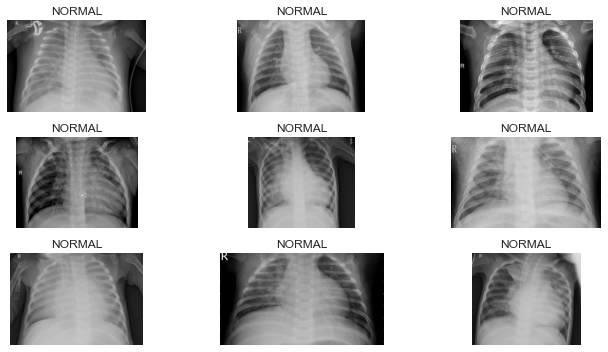

In [5]:
normal = os.listdir("data/chest_xray/train/NORMAL")
normal_dir = "data/chest_xray/train/NORMAL"

plt.figure(figsize=(10, 5))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.title("NORMAL")
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

In [6]:
import glob

pneumonia_train = glob.glob(train_dir+"/PNEUMONIA/*.jpeg")
normal_train = glob.glob(train_dir+"/NORMAL/*.jpeg")

### creating dataframe for counting classes

In [7]:
df = pd.DataFrame(np.concatenate([[0]*len(normal_train) , [1]*len(pneumonia_train)]),columns=["class"])

In [8]:
df.head()

,class
0,0
1,0
2,0
3,0
4,0


In [9]:
img_Datagen = ImageDataGenerator(
        rescale = 1/255,
        shear_range=10,
        zoom_range=0.3,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.5,2.0],
        width_shift_range = 0.2,
        rotation_range=20,
        fill_mode = 'nearest'
)
val_Datagen = ImageDataGenerator(
        rescale = 1/255
)

In [10]:
train = img_Datagen.flow_from_directory(train_dir,
                                       batch_size=32,
                                       class_mode='binary',
#                                        target_size=(224,224,3))
                                       )

validation = val_Datagen.flow_from_directory(val_dir,
                                              batch_size=2,
                                              class_mode='binary',
#                                               target_size=(224,224,3))
                                            )

test = val_Datagen.flow_from_directory(test_dir,
                                       batch_size=2,
                                       class_mode='binary',
#                                        target_size=(224/,224,3))
                                      )

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [11]:
img, label = next(train)


## VGG model

In [12]:
vgg_model = tf.keras.applications.VGG19(
    weights='imagenet',
    include_top = False,
#     input_shape = (224,224,3)
)

for layer in vgg_model.layers:
    layer.trainable=False
    
x = vgg_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128,activation='relu')(x)
# output layer
predictions = tf.keras.layers.Dense(1,activation='sigmoid')(x)

model = tf.keras.Model(inputs=vgg_model.input, outputs=predictions)

# to avoid overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=8)

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [14]:
history = model.fit(train,epochs=30, 
                    validation_data=validation,
                     steps_per_epoch=100,
                    callbacks=[early_stopping,lr],
                    batch_size=32)

Epoch 1/30
100/100 [==============================] - 821s 8s/step - loss: 0.5003 - accuracy: 0.7647 - val_loss: 0.5091 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 2/30
100/100 [==============================] - 792s 8s/step - loss: 0.4317 - accuracy: 0.7953 - val_loss: 0.4728 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 3/30
100/100 [==============================] - 922s 9s/step - loss: 0.3869 - accuracy: 0.8266 - val_loss: 0.4956 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 4/30
100/100 [==============================] - 1083s 11s/step - loss: 0.3779 - accuracy: 0.8253 - val_loss: 0.4871 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 5/30
100/100 [==============================] - 1039s 10s/step - loss: 0.3611 - accuracy: 0.8316 - val_loss: 0.6539 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 6/30
100/100 [==============================] - 1018s 10s/step - loss: 0.3451 - accuracy: 0.8438 - val_loss: 0.4671 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 7/30
100/100 [==============================] - 1016

In [15]:
score = model.evaluate(train)

print("Train Loss: ", score[0])
print("Train Accuracy: ", score[1])

163/163 [==============================] - 1659s 10s/step - loss: 0.2366 - accuracy: 0.8992
Train Loss:  0.23657703399658203
Train Accuracy:  0.8991564512252808


In [16]:
# Test data
score = model.evaluate(test)

print("Test Loss: ", score[0])
print("Test Accuracy: ", score[1])

312/312 [==============================] - 207s 664ms/step - loss: 0.3327 - accuracy: 0.8574
Test Loss:  0.3326871693134308
Test Accuracy:  0.8573718070983887


Text(0.5, 1.0, 'Accuracy Evolution')

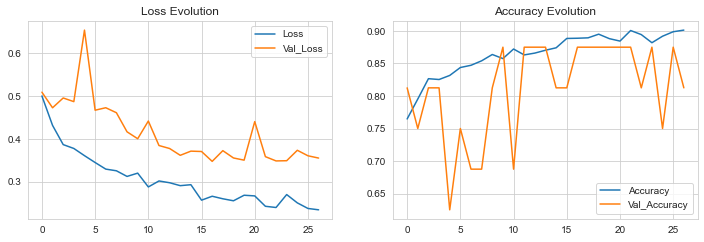

In [17]:
plt.figure(figsize=(12, 8))
plt.title('EVALUATION OF VGG19')

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evalaution')

## ResNet50V2

In [18]:
resnet_model = tf.keras.applications.ResNet50V2(
    weights='imagenet',
    include_top = False,
    input_shape = (224,224,3)
)

for layer in resnet_model.layers:
    layer.trainable=False
    
x = resnet_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128,activation='relu')(x)
# output layer
predictions = tf.keras.layers.Dense(1,activation='sigmoid')(x)

model2 = tf.keras.Model(inputs=resnet_model.input, outputs=predictions)

# to avoid overfitting
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=6)

# Compiling the model
model2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [19]:
history = model2.fit(train,epochs=30, 
                    validation_data=validation,
                     steps_per_epoch=100,
                    callbacks=[early_stopping,lr],
                    batch_size=32)

Epoch 1/30
100/100 [==============================] - 297s 3s/step - loss: 0.3171 - accuracy: 0.8606 - val_loss: 0.1996 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 2/30
100/100 [==============================] - 353s 4s/step - loss: 0.2405 - accuracy: 0.9016 - val_loss: 0.2307 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 3/30
100/100 [==============================] - 325s 3s/step - loss: 0.1935 - accuracy: 0.9216 - val_loss: 0.2049 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 4/30
100/100 [==============================] - 313s 3s/step - loss: 0.1745 - accuracy: 0.9291 - val_loss: 0.2061 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 5/30
100/100 [==============================] - 323s 3s/step - loss: 0.1957 - accuracy: 0.9159 - val_loss: 0.1696 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 6/30
100/100 [==============================] - 319s 3s/step - loss: 0.1778 - accuracy: 0.9253 - val_loss: 0.4358 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 7/30
100/100 [==============================] - 309s 3s/st

In [20]:
# Evaluating the model on train and test
score = model2.evaluate(train)

print("Train Loss: ", score[0])
print("Train Accuracy: ", score[1])

score = model2.evaluate(test)
print("\nTest loss: ", score[0])
print("Test Accuracy: ", score[1])

163/163 [==============================] - 553s 3s/step - loss: 0.1216 - accuracy: 0.9498
Train Loss:  0.1215800791978836
Train Accuracy:  0.949769914150238
312/312 [==============================] - 78s 248ms/step - loss: 0.2031 - accuracy: 0.9343

Test loss:  0.20314253866672516
Test Accuracy:  0.9342948794364929


Text(0.5, 1.0, 'Accuracy Evolution')

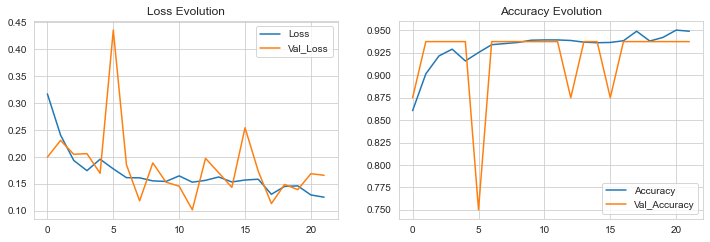

In [21]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [22]:
mobilenet_model = tf.keras.applications.MobileNetV2(
    weights='imagenet',
    include_top = False,
#     input_shape = (224,224,3)
)

for layer in mobilenet_model.layers:
    layer.trainable=False
    
x = mobilenet_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128,activation='relu')(x)
# output layer
predictions = tf.keras.layers.Dense(1,activation='sigmoid')(x)

model3 = tf.keras.Model(inputs=mobilenet_model.input, outputs=predictions)

# to avoid overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=8)

# Compiling the model
model3.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

9406464/9406464 [==============================] - 1s 0us/step


In [23]:
history = model3.fit(train,epochs=30, 
                    validation_data=validation,
                     steps_per_epoch=100,
                    callbacks=[early_stopping,lr],
                    batch_size=32)

Epoch 1/30
100/100 [==============================] - 162s 2s/step - loss: 0.3116 - accuracy: 0.8650 - val_loss: 0.3210 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 2/30
100/100 [==============================] - 161s 2s/step - loss: 0.2353 - accuracy: 0.9050 - val_loss: 0.2296 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 3/30
100/100 [==============================] - 175s 2s/step - loss: 0.2280 - accuracy: 0.8994 - val_loss: 0.2616 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 4/30
100/100 [==============================] - 189s 2s/step - loss: 0.2013 - accuracy: 0.9175 - val_loss: 0.6772 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 5/30
100/100 [==============================] - 194s 2s/step - loss: 0.1992 - accuracy: 0.9194 - val_loss: 0.3320 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 6/30
100/100 [==============================] - 184s 2s/step - loss: 0.1944 - accuracy: 0.9187 - val_loss: 0.2508 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 7/30
100/100 [==============================] - 171s 2s/st

In [24]:
# Evaluating the model on train and test
score = model3.evaluate(train)

print("Train Loss: ", score[0])
print("Train Accuracy: ", score[1])

score = model3.evaluate(test)
print("\nTest loss: ", score[0])
print("Test Accuracy: ", score[1])

163/163 [==============================] - 194s 1s/step - loss: 0.1550 - accuracy: 0.9392
Train Loss:  0.1549997329711914
Train Accuracy:  0.939225435256958
312/312 [==============================] - 21s 68ms/step - loss: 0.2562 - accuracy: 0.8926

Test loss:  0.2562347948551178
Test Accuracy:  0.8926281929016113


Text(0.5, 1.0, 'Accuracy Evolution')

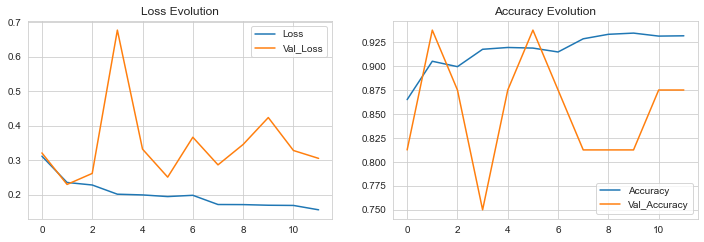

In [25]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [26]:
# Saving these 3 models
model.save('vgg19.h5')

In [27]:
model2.save('resnet50v2.h5')
model3.save('mobilenetv2.h5')

In [28]:
resnet_model.trainable = True
vgg_model.trainable = True
mobilenet_model.trainable = True

In [29]:
print("Number of layers in the base model: ", len(vgg_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in vgg_model.layers[:fine_tune_at]:
    layer.trainable = False

Number of layers in the base model:  22


In [30]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [31]:
# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [32]:
len(model.trainable_variables)

4

In [33]:
fine_tune_epochs = 10
epochs_on_raw_model = 30

total_epochs =  epochs_on_raw_model + fine_tune_epochs

history_fine =model.fit(train,epochs=total_epochs, 
                    validation_data=validation,
                    steps_per_epoch=100,
                    callbacks=[early_stopping,lr],
                    batch_size=32)

Epoch 1/40
100/100 [==============================] - 1084s 11s/step - loss: 0.2453 - accuracy: 0.8981 - val_loss: 0.3434 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 2/40
100/100 [==============================] - 1189s 12s/step - loss: 0.2437 - accuracy: 0.8938 - val_loss: 0.3409 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 3/40
100/100 [==============================] - 1237s 12s/step - loss: 0.2710 - accuracy: 0.8841 - val_loss: 0.3457 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 4/40
100/100 [==============================] - 1230s 12s/step - loss: 0.2389 - accuracy: 0.8984 - val_loss: 0.3441 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 5/40
100/100 [==============================] - 1281s 13s/step - loss: 0.2530 - accuracy: 0.8863 - val_loss: 0.3480 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 6/40
100/100 [==============================] - 1249s 12s/step - loss: 0.2325 - accuracy: 0.8975 - val_loss: 0.3608 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 7/40
100/100 [==============================] 

In [34]:
# Evaluating the model on train and test
score = model.evaluate(train)

print("Train Loss: ", score[0])
print("Train Accuracy: ", score[1])

score = model.evaluate(test)
print("\nTest loss: ", score[0])
print("Test Accuracy: ", score[1])

163/163 [==============================] - 1892s 12s/step - loss: 0.2226 - accuracy: 0.9078
Train Loss:  0.2225867360830307
Train Accuracy:  0.9077837467193604
312/312 [==============================] - 250s 801ms/step - loss: 0.3022 - accuracy: 0.8798

Test loss:  0.302187979221344
Test Accuracy:  0.879807710647583


Text(0.5, 1.0, 'Accuracy Evolution')

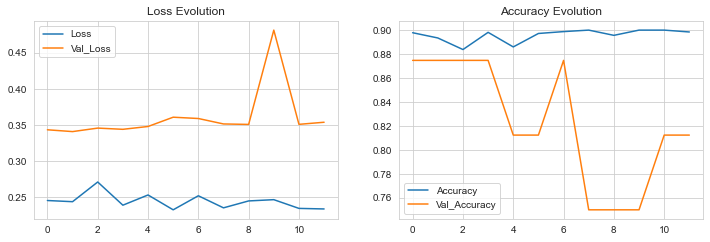

In [35]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history_fine.history['loss'], label='Loss')
plt.plot(history_fine.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history_fine.history['accuracy'], label='Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [36]:
# Fine tuning the resnet model


# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(resnet_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in resnet_model.layers[:fine_tune_at]:
    
    layer.trainable = False

Number of layers in the base model:  190


In [37]:
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_preact_relu (Acti  (None, 56, 56, 256)  0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 56, 56, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

 conv3_block2_2_conv (Conv2D)   (None, 28, 28, 128)  147456      ['conv3_block2_2_pad[0][0]']     
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 28, 28, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block1_1_conv (Conv2D)   (None, 14, 14, 256)  131072      ['conv4_block1_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv4_block1_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block1_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block1_1_relu[0][0]']    
 g2D)     

                                                                                                  
 conv4_block3_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block3_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block3_out (Add)         (None, 14, 14, 1024  0           ['conv4_block2_out[0][0]',       
                                )                                 'conv4_block3_3_conv[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block6_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block6_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block6_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block6_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block6_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_block6_2_conv (Conv2D)   (None, 7, 7, 256)    589824      ['conv4_block6_2_pad[0][0]']     
          

                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 7, 7, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_out (Add)         (None, 7, 7, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_conv[0][0]']    
                                                                                                  
 conv5_block3_preact_bn (BatchN  (None, 7, 7, 2048)  8192        ['conv5_block2_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv5_block3_preact_relu (Acti  (None, 7, 7, 2048)  0           ['conv5_block3_preact_bn[0][0]'] 
 vation)  

In [38]:
# Compiling the model
model2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [39]:
len(model2.trainable_variables)

86

In [40]:
fine_tune_epochs = 10
epochs_on_raw_model = 30

total_epochs =  epochs_on_raw_model + fine_tune_epochs

history_fine =model2.fit(train,epochs=total_epochs, 
                    validation_data=validation,
                    steps_per_epoch=100,
                    callbacks=[early_stopping,lr],
                    batch_size=32)

Epoch 1/40
100/100 [==============================] - 611s 6s/step - loss: 0.2871 - accuracy: 0.8941 - val_loss: 52.9648 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/40
100/100 [==============================] - 634s 6s/step - loss: 0.2010 - accuracy: 0.9219 - val_loss: 0.7457 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 3/40
100/100 [==============================] - 636s 6s/step - loss: 0.1595 - accuracy: 0.9366 - val_loss: 0.1225 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 4/40
100/100 [==============================] - 643s 6s/step - loss: 0.1443 - accuracy: 0.9444 - val_loss: 0.7763 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 5/40
100/100 [==============================] - 560s 6s/step - loss: 0.1426 - accuracy: 0.9447 - val_loss: 0.3327 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 6/40
100/100 [==============================] - 583s 6s/step - loss: 0.1248 - accuracy: 0.9519 - val_loss: 0.0174 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 7/40
100/100 [==============================] - 603s 6s/s

In [41]:
# Evaluating the model on train and test
score = model2.evaluate(train)

print("Train Loss: ", score[0])
print("Train Accuracy: ", score[1])

score = model2.evaluate(test)
print("\nTest loss: ", score[0])
print("Test Accuracy: ", score[1])


163/163 [==============================] - 570s 4s/step - loss: 0.0624 - accuracy: 0.9755
Train Loss:  0.062361180782318115
Train Accuracy:  0.9754601120948792
312/312 [==============================] - 85s 273ms/step - loss: 0.2114 - accuracy: 0.9439

Test loss:  0.2114294469356537
Test Accuracy:  0.9439102411270142


In [42]:
# Saving the fine tuned model
model.save('tuned_vgg19.h5')
model2.save('tuned_resnet.h5')

In [43]:
# Loading the saved version of Tuned-ResNet50V2
final_model = tf.keras.models.load_model('tuned_resnet.h5')

In [44]:
y_pred = final_model.predict(test)

312/312 [==============================] - 54s 168ms/step


In [45]:
final_model.evaluate(test)

312/312 [==============================] - 54s 168ms/step - loss: 0.2114 - accuracy: 0.9439


[0.21142937242984772, 0.9439102411270142]